## **Data Preprocessing**

In [ ]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error, r2_score, ConfusionMatrixDisplay, confusion_matrix
import joblib
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVR


In [ ]:
# reading the csv file
df20 = pd.read_csv("collegereview2020.csv")
df21 = pd.read_csv("collegereview2021.csv")
df22 = pd.read_csv("collegereview2022.csv")
df23 = pd.read_csv("collegereview2023.csv")

In [ ]:
df20.head()

Name                                    college  \
0               A Geethika          Cambridge Institute of Technology   
1             .VJjohn babu      JNTUH College of Engineering Manthani   
2                  A AKHIL                                        NaN   
3       A DHEEKSHITH KUMAR  TKR College of Engineering and Technology   
4  A Hanuman Kowshik Reddy                 R V College of Engineering   

                                              review  rating  
0  And now by talking about the infrastructure.  ...     NaN  
1  I wrote TS EMCET, as per the rank I got ,I cho...     6.2  
2  In the final year, we are eligible for campus ...     6.6  
3  Feasible for counselling students.expensive fo...     8.3  
4  Extravaganza concrete fair is the name of the ...     8.8

In [ ]:
df21.head()

Name                                            college  \
0  A Hanuman Kowshik Reddy                         R V College of Engineering   
1              A Hari Teja                                                NaN   
2              A K Karthik  Sri Venkateswara College of Engineering and Te...   
3          A karthik reddy                                      SR University   
4           A Madhan Mohan            Sri Venkateswara College of Engineering   

                                              review  rating  
0  Extravaganza concrete fair is the name of the ...     8.8  
1  my college fees are quite good and the hikes a...    10.0  
2  From 3rd year, we are eligible for college pla...     9.0  
3  There will be two to three fests in our colleg...    10.0  
4  I am a CSM student. I choose this course to my...     9.8

In [ ]:
df22.head()

Name                                          college  \
0        .VJjohn babu            JNTUH College of Engineering Manthani   
1             A AKHIL                  Vaagdevi College of Engineering   
2  A DHEEKSHITH KUMAR        TKR College of Engineering and Technology   
3    A Jagadeesh goud  Siddhartha Institute of Technology and Sciences   
4     A Krishna Vamsi                   Vemana Institute of Technology   

                                              review  rating  
0  I wrote TS EMCET, as per the rank I got ,I cho...     6.2  
1  In the final year, we are eligible for campus ...     6.6  
2  Feasible for counselling students.expensive fo...     8.3  
3  Loan/ Scholarship Provisions: There is a nomin...     8.0  
4  K-cet Entrance exam,they saw the marks of my 2...     7.8

In [ ]:
df23.head()

Name                                  college  \
0       A Geethika        Cambridge Institute of Technology   
1  A Mohamad Yunus  Nitte Meenakshi Institute of Technology   
2     A prem kumar               CVR College of Engineering   
3        A R Keven  Nitte Meenakshi Institute of Technology   
4        A R Keven  Nitte Meenakshi Institute of Technology   

                                              review  rating  
0  And now by talking about the infrastructure.  ...     NaN  
1  No two students are exactly alike, and no two ...     8.3  
2  The campus has a very good sports and games fa...     7.6  
3  I chose this course because I have immense int...     3.5  
4  I chose this course because I have immense int...     3.5

1. Data Deduplication

In [ ]:
# No of entries before deduplication
print("Total no of entries: ", len(df20))
print("Total no of entries: ", len(df21))
print("Total no of entries: ", len(df22))
print("Total no of entries: ", len(df23))

Total no of entries:  12321
Total no of entries:  18349
Total no of entries:  9762
Total no of entries:  9506


In [ ]:
# Deduplication Process
df20 = df20.drop_duplicates()
df21 = df21.drop_duplicates()
df22 = df22.drop_duplicates()
df23 = df23.drop_duplicates()

In [ ]:
# No of entries after deduplication
print("Total no of distinct entries: ", len(df20))
print("Total no of distinct entries: ", len(df21))
print("Total no of distinct entries: ", len(df22))
print("Total no of distinct entries: ", len(df23))

Total no of distinct entries:  10970
Total no of distinct entries:  14547
Total no of distinct entries:  9708
Total no of distinct entries:  8165


2. Data Reduction

In [ ]:
# Since name is not required futher we go for data reduction
df20  = df20.drop('Name', axis= 1)
df21  = df21.drop('Name', axis= 1)
df22  = df22.drop('Name', axis= 1)
df23  = df23.drop('Name', axis= 1)

In [ ]:
df20.head()

college  \
0          Cambridge Institute of Technology   
1      JNTUH College of Engineering Manthani   
2                                        NaN   
3  TKR College of Engineering and Technology   
4                 R V College of Engineering   

                                              review  rating  
0  And now by talking about the infrastructure.  ...     NaN  
1  I wrote TS EMCET, as per the rank I got ,I cho...     6.2  
2  In the final year, we are eligible for campus ...     6.6  
3  Feasible for counselling students.expensive fo...     8.3  
4  Extravaganza concrete fair is the name of the ...     8.8

In [ ]:
df21.head()

college  \
0                         R V College of Engineering   
1                                                NaN   
2  Sri Venkateswara College of Engineering and Te...   
3                                      SR University   
4            Sri Venkateswara College of Engineering   

                                              review  rating  
0  Extravaganza concrete fair is the name of the ...     8.8  
1  my college fees are quite good and the hikes a...    10.0  
2  From 3rd year, we are eligible for college pla...     9.0  
3  There will be two to three fests in our colleg...    10.0  
4  I am a CSM student. I choose this course to my...     9.8

In [ ]:
df22.head()

college  \
0            JNTUH College of Engineering Manthani   
1                  Vaagdevi College of Engineering   
2        TKR College of Engineering and Technology   
3  Siddhartha Institute of Technology and Sciences   
4                   Vemana Institute of Technology   

                                              review  rating  
0  I wrote TS EMCET, as per the rank I got ,I cho...     6.2  
1  In the final year, we are eligible for campus ...     6.6  
2  Feasible for counselling students.expensive fo...     8.3  
3  Loan/ Scholarship Provisions: There is a nomin...     8.0  
4  K-cet Entrance exam,they saw the marks of my 2...     7.8

In [ ]:
df23.head()

college  \
0        Cambridge Institute of Technology   
1  Nitte Meenakshi Institute of Technology   
2               CVR College of Engineering   
3  Nitte Meenakshi Institute of Technology   
5        Cambridge Institute of Technology   

                                              review  rating  
0  And now by talking about the infrastructure.  ...     NaN  
1  No two students are exactly alike, and no two ...     8.3  
2  The campus has a very good sports and games fa...     7.6  
3  I chose this course because I have immense int...     3.5  
5  Our college timings are from 8:30 am to 4:30 p...     9.7

3. Data Cleaning - Removal of NULL values

In [ ]:
# Remove the entry is college name is NULL
df20 = df20.dropna(subset = ["college"])
df21 = df21.dropna(subset = ["college"])
df22 = df22.dropna(subset = ["college"])
df23 = df23.dropna(subset = ["college"])

In [ ]:
# The no. of entries after removal of NULL values
print(len(df20))
print(len(df21))
print(len(df22))
print(len(df23))

10952
14537
9699
8149


4. Removal of abnormal values

In [ ]:
df20 = df20[((df20["rating"] <=10) & (df20["rating"] >= 0)) | (df20["rating"].isnull())]
df21 = df21[((df21["rating"] <=10) & (df21["rating"] >= 0)) | (df21["rating"].isnull())]
df22 = df22[((df22["rating"] <=10) & (df22["rating"] >= 0)) | (df22["rating"].isnull())]
df23 = df23[((df23["rating"] <=10) & (df23["rating"] >= 0)) | (df23["rating"].isnull())]

In [ ]:
print(len(df20))
print(len(df21))
print(len(df22))
print(len(df23))

10947
14533
9693
8142


In [ ]:
value_counts20 = df20['college'].value_counts()
value_counts20.head()

Lovely Professional University     176
Chandigarh University              172
Delhi Technological University     148
Vellore Institute of Technology    145
Bharath University                 130
Name: college, dtype: int64

In [ ]:
value_counts21 = df21['college'].value_counts()
value_counts21.head()

Chandigarh University                            291
Delhi Technological University                   218
Netaji Subhas University of Technology           206
Noida Institute of Engineering and Technology    149
Vellore Institute of Technology                  146
Name: college, dtype: int64

In [ ]:
value_counts22 = df22['college'].value_counts()
value_counts22.head()

Lovely Professional University            207
Delhi Technological University            156
Chandigarh University                     154
Netaji Subhas University of Technology    144
Vellore Institute of Technology           137
Name: college, dtype: int64

In [ ]:
value_counts23 = df23['college'].value_counts()
value_counts23.head()

Chandigarh University              127
Bharath University                 125
Delhi Technological University     105
Vellore Institute of Technology    102
Lovely Professional University      95
Name: college, dtype: int64

In [ ]:
# No. of colleges in each year data of rating
print(len(value_counts20))
print(len(value_counts21))
print(len(value_counts22))
print(len(value_counts23))

1867
2092
1592
1631


5. Considering the college if only number of reviews are more than or equal to 10

In [ ]:
df20 = df20[df20['college'].map(value_counts20) >= 10]
df20

college  \
0                      Cambridge Institute of Technology   
3              TKR College of Engineering and Technology   
4                             R V College of Engineering   
8                                          SR University   
11               Nitte Meenakshi Institute of Technology   
...                                                  ...   
12311             National Institute of Technology Patna   
12313  Guru Jambheshwar University of Science and Tec...   
12314             National Institute of Technology Patna   
12316                Birla Institute of Technology Mesra   
12318                         Dharmsinh Desai University   

                                                  review  rating  
0      And now by talking about the infrastructure.  ...     NaN  
3      Feasible for counselling students.expensive fo...     8.3  
4      Extravaganza concrete fair is the name of the ...     8.8  
8      There will be two to three fests in our colleg...    10.0  
11     No two students are exactly alike, and no two ...     8.3  
...                                                  ...     ...  
12311  The gender ratio is not proper not even in my ...     7.7  
12313  Amazing campus life. The university is equippe...    10.0  
12314  I am a student in the Electrical department. W...     9.0  
12316  The fees Are pretty high like it is almost 160...     9.4  
12318  There is no extra curricular activities conduc...     7.8  

[7102 rows x 3 columns]

In [ ]:
df21 = df21[df21['college'].map(value_counts21) >= 10]
df21

college  \
0                            R V College of Engineering   
3                                         SR University   
4               Sri Venkateswara College of Engineering   
6                          Army Institute of Technology   
8               Nitte Meenakshi Institute of Technology   
...                                                 ...   
18338                      Chandigarh Group of Colleges   
18341  Silver Oak College of Engineering and Technology   
18343                                  Parul University   
18346                   Vellore Institute of Technology   
18347                Netaji Subhash Engineering College   

                                                  review  rating  
0      Extravaganza concrete fair is the name of the ...     8.8  
3      There will be two to three fests in our colleg...    10.0  
4      I am a CSM student. I choose this course to my...     9.8  
6      Overall fees for the four years of engineering...     9.7  
8      I chose this course because I have immense int...     3.5  
...                                                  ...     ...  
18338  Semester fees are to be paid before the regist...     7.7  
18341  There are lots of annual and tech fests in col...    10.0  
18343  I choose this course to pursue my career in th...     6.2  
18346  Campus life at VIT Chennai is very good there ...     8.8  
18347  At the time of admission i paid around 70k whi...     7.8  

[10187 rows x 3 columns]

In [ ]:
df22 = df22[df22['college'].map(value_counts22) >= 10]
df22

college  \
1                     Vaagdevi College of Engineering   
6                      United Institute of Technology   
9       Vivekanandha College of Engineering for Women   
10      Maulana Azad National Institute of Technology   
12                    Malla Reddy Engineering College   
...                                               ...   
9753  Galgotias College of Engineering and Technology   
9754                       Jaipur Engineering College   
9755                              Integral University   
9758                                 Parul University   
9761         National Institute of Technology Manipur   

                                                 review  rating  
1     In the final year, we are eligible for campus ...     6.6  
6     I join in this college through counseling. I s...     9.7  
9     Our faculties are very kind and caring to us. ...     9.2  
10    I got admission through my IIT-Jee Mains rank....     7.8  
12    I am from electronics and communication engine...     7.0  
...                                                 ...     ...  
9753  campus life is really good. it has been fun ti...     7.3  
9754  I am pursuing this degree because I'm good wit...     8.8  
9755  This course is nowadays in demand in society.\...    10.0  
9758  I choose this course to pursue my career in th...     6.2  
9761  Their are around 20 clubs/societies in our col...     8.5  

[6134 rows x 3 columns]

In [ ]:
df23 = df23[df23['college'].map(value_counts22) >= 10]
df23

college  \
9     Vignan's Foundation for Science, Technology, a...   
12                     Vardhaman College of Engineering   
15                       Lovely Professional University   
17                   New Horizon College of Engineering   
19                                       K L University   
...                                                 ...   
9498             National Institute of Technology Patna   
9500                Birla Institute of Technology Mesra   
9502                         Dharmsinh Desai University   
9503                                 Bennett University   
9505           National Institute of Technology Manipur   

                                                 review  rating  
9     the life on the campus should be enjoyable and...     8.8  
12    I am interested in computer science and engine...     7.0  
15    Campus Life was too good there is no force fro...     9.3  
17    College provides information about most of the...     8.7  
19    There is a fibre speed wifi which is useful fo...     9.8  
...                                                 ...     ...  
9498  I am a student in the Electrical department. W...     9.0  
9500  The fees Are pretty high like it is almost 160...     9.4  
9502  There is no extra curricular activities conduc...     7.8  
9503  Uphoria: It's our fest, cultural and technical...     9.7  
9505  Their are around 20 clubs/societies in our col...     8.5  

[4364 rows x 3 columns]

6. Data Visualization -  An idea for getting the number of reviews available for each college

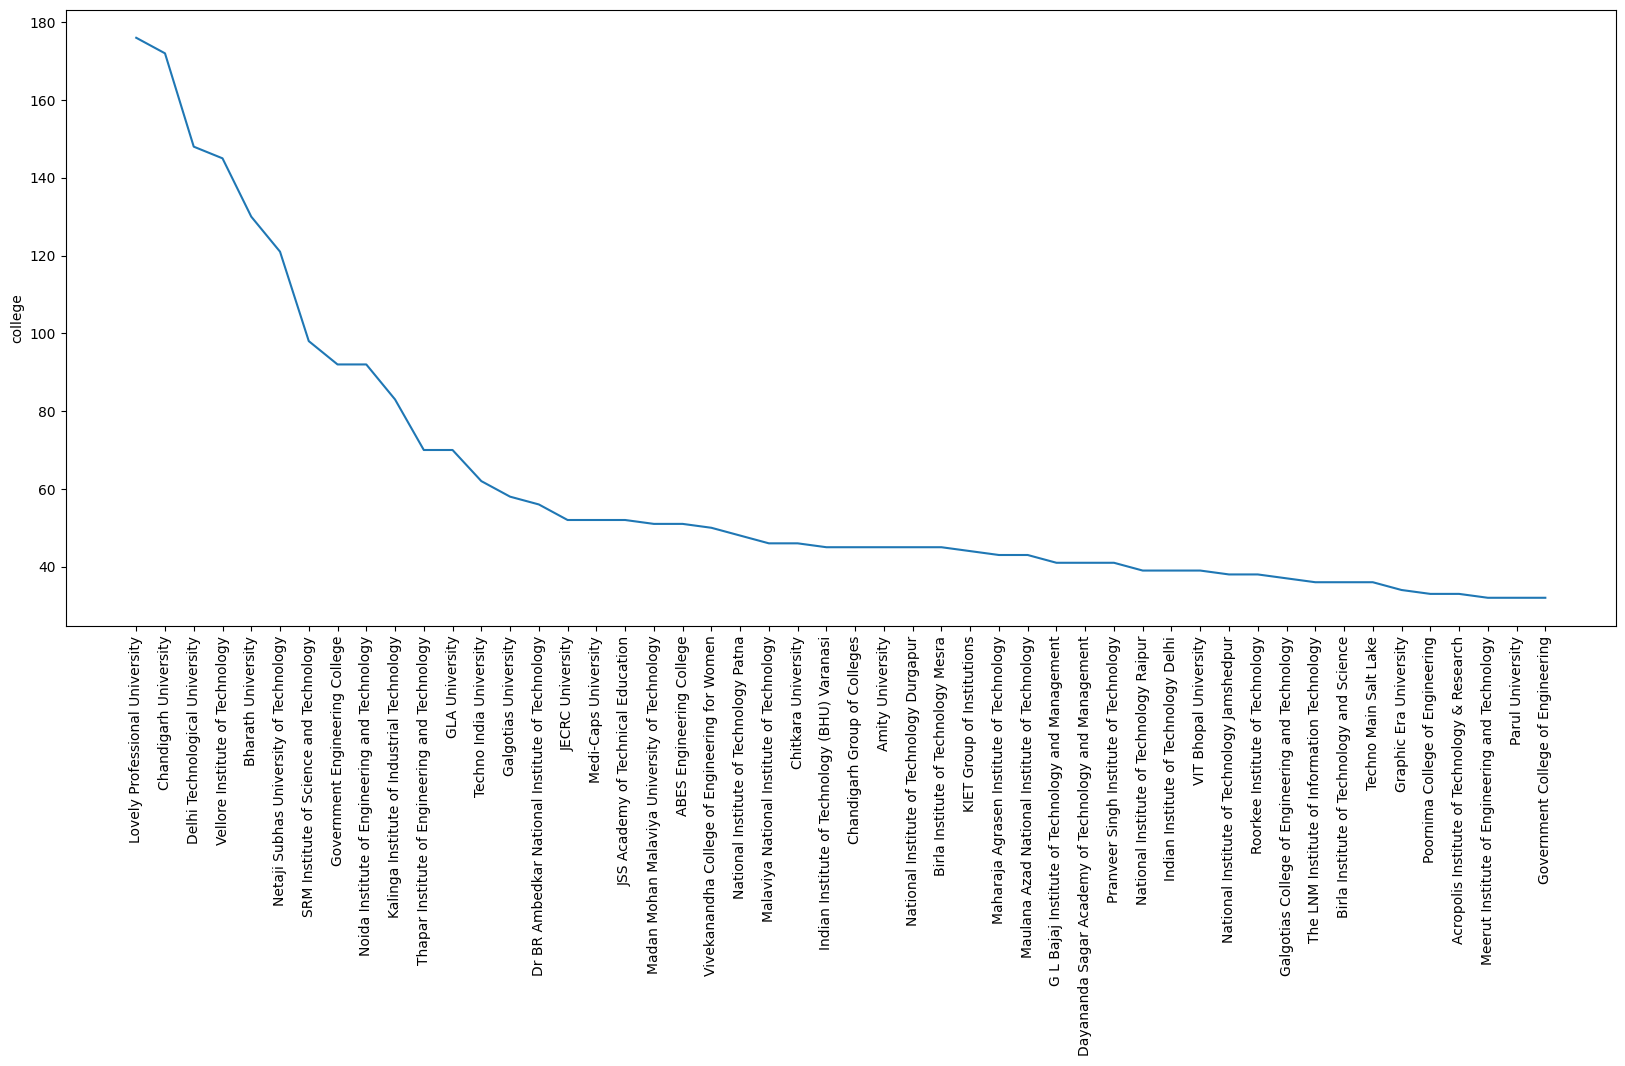

In [ ]:
value_counts20 = df20['college'].value_counts()
plt.figure(figsize = (20,8))
sns.lineplot(data = value_counts20.head(50))
plt.xticks(rotation = 90)
plt.show()

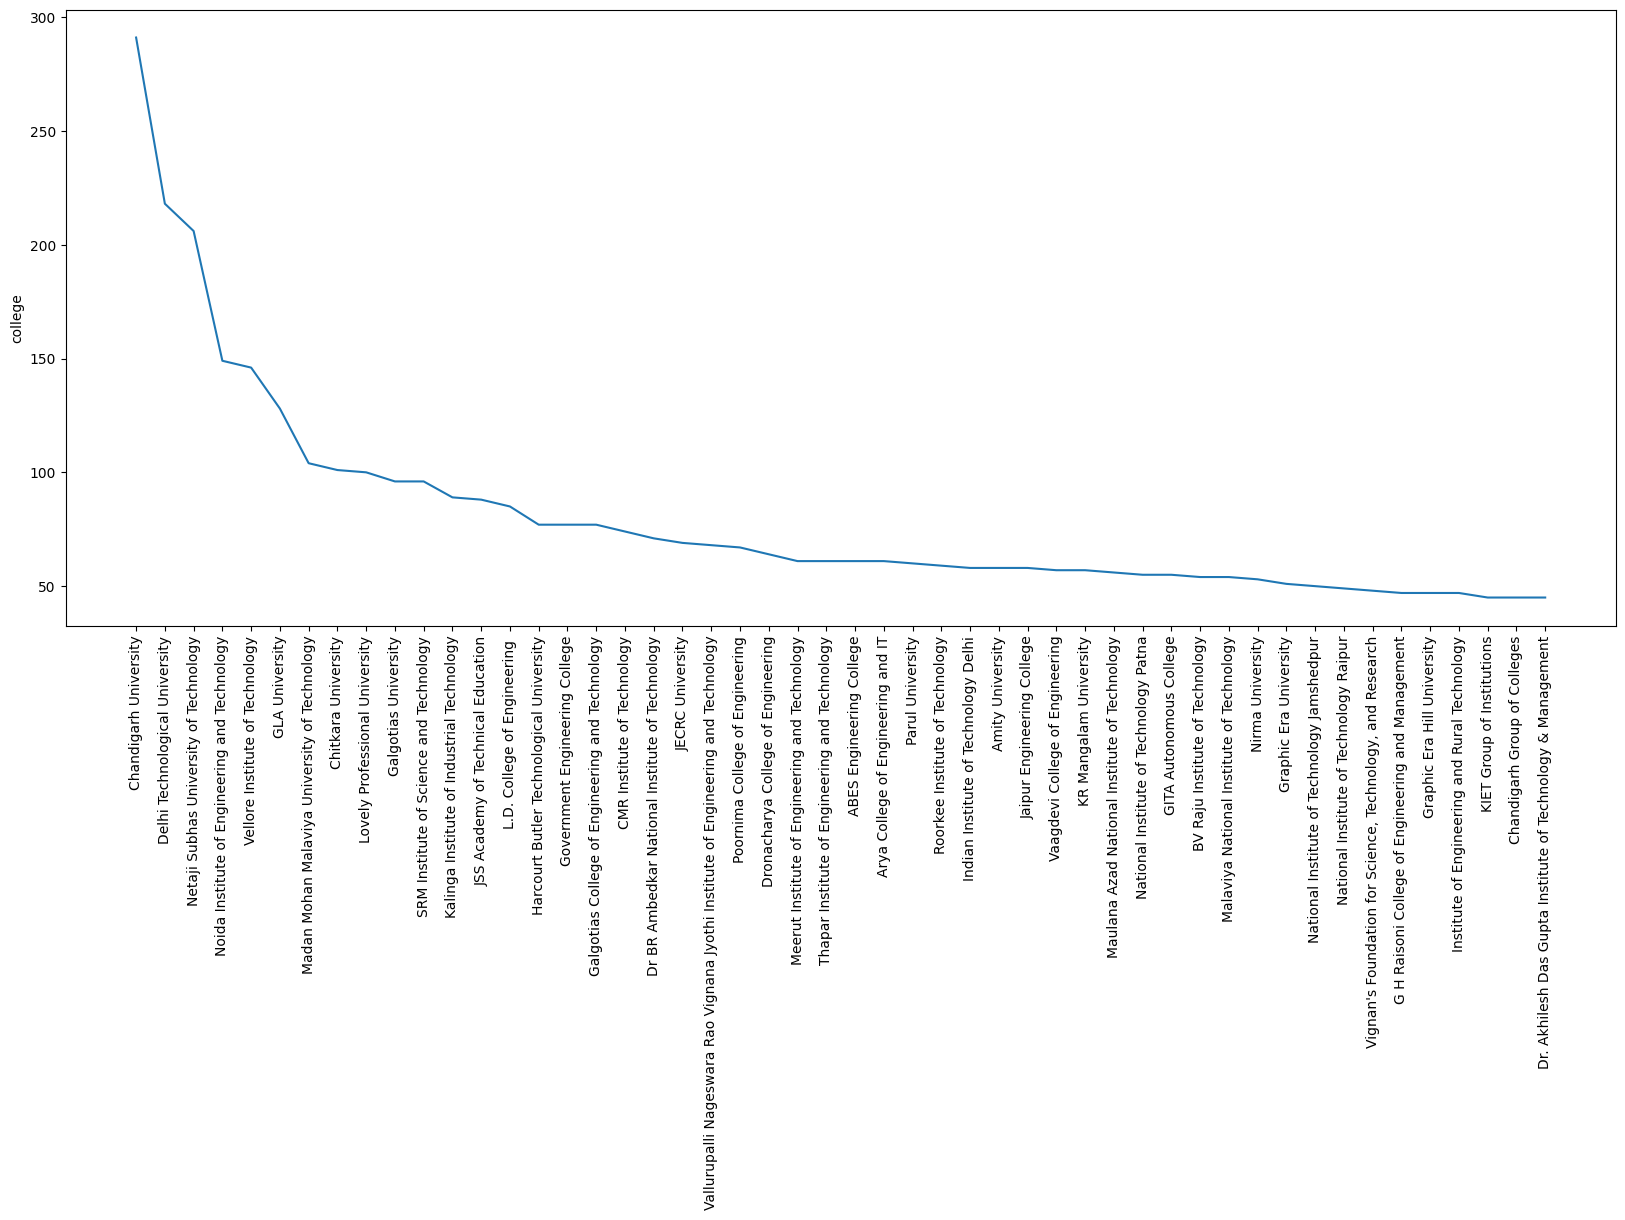

In [ ]:
value_counts21 = df21['college'].value_counts()
plt.figure(figsize = (20,8))
sns.lineplot(data = value_counts21.head(50))
plt.xticks(rotation = 90)
plt.show()

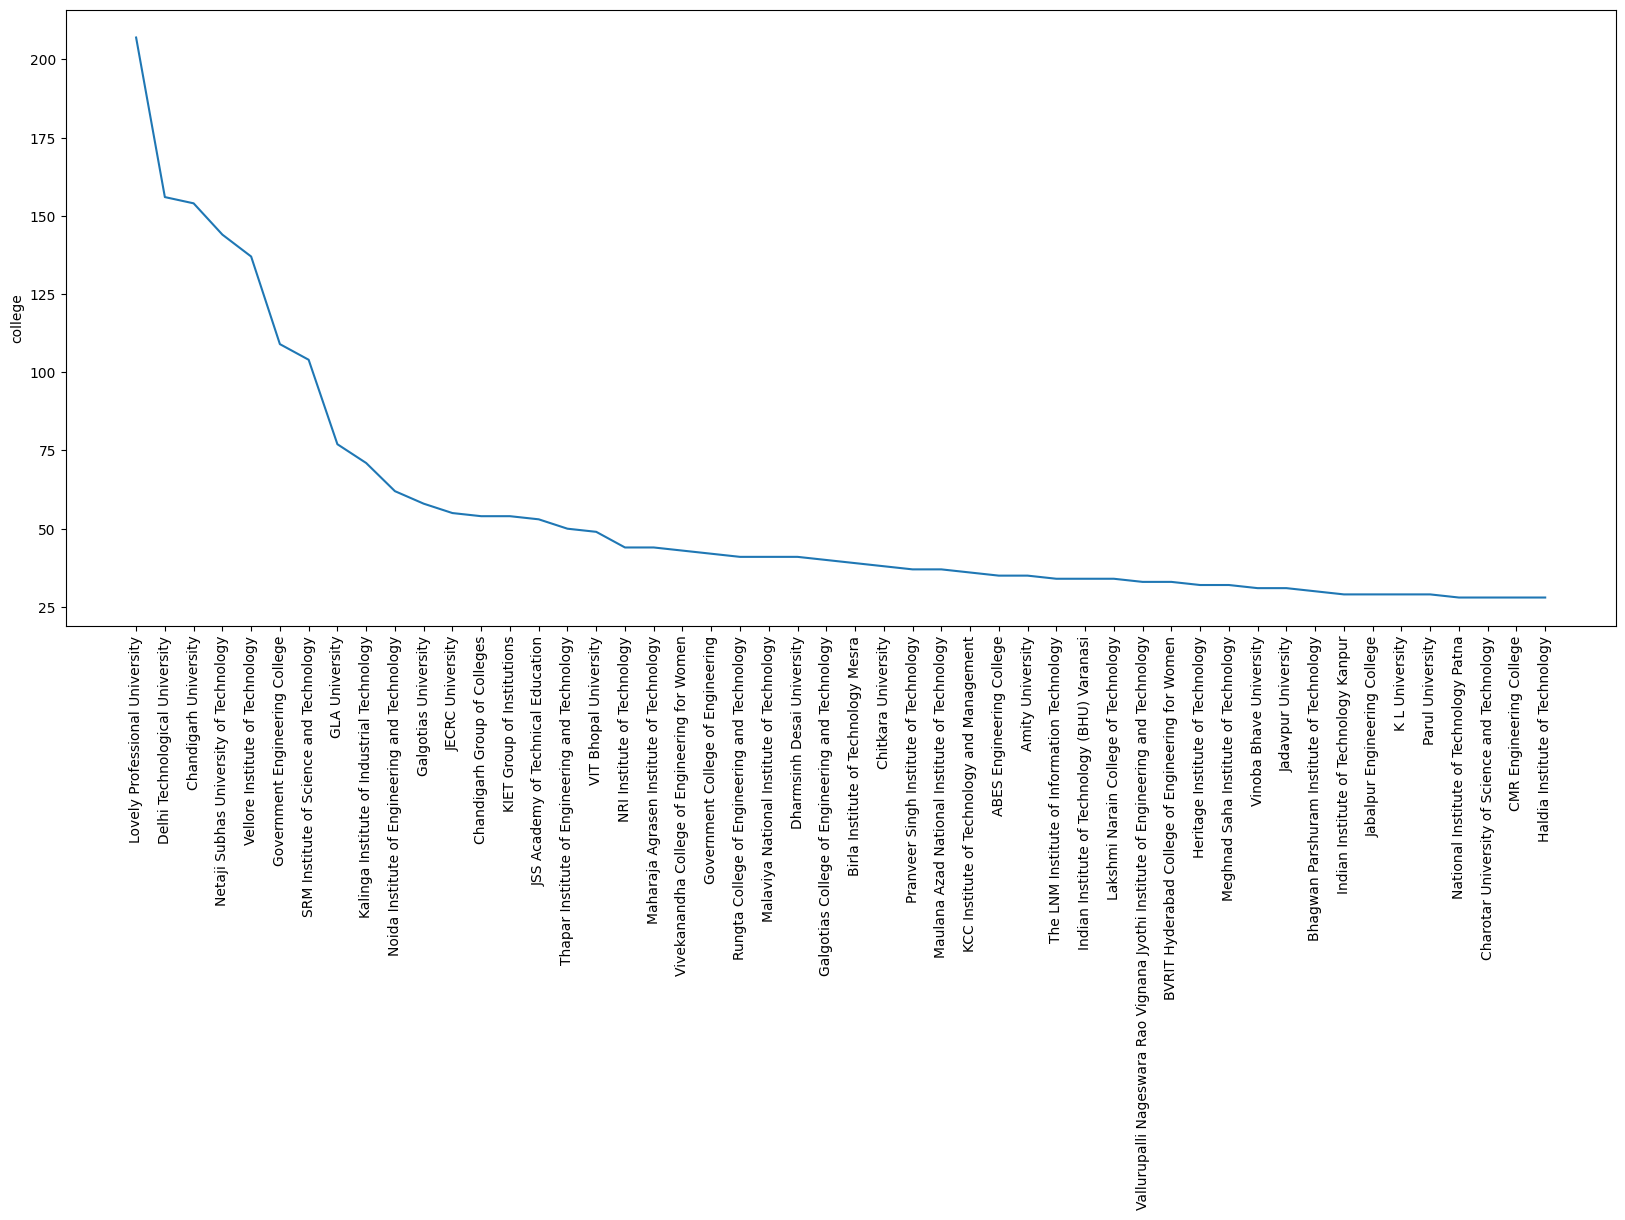

In [ ]:
value_counts22 = df22['college'].value_counts()
plt.figure(figsize = (20,8))
sns.lineplot(data = value_counts22.head(50))
plt.xticks(rotation = 90)
plt.show()

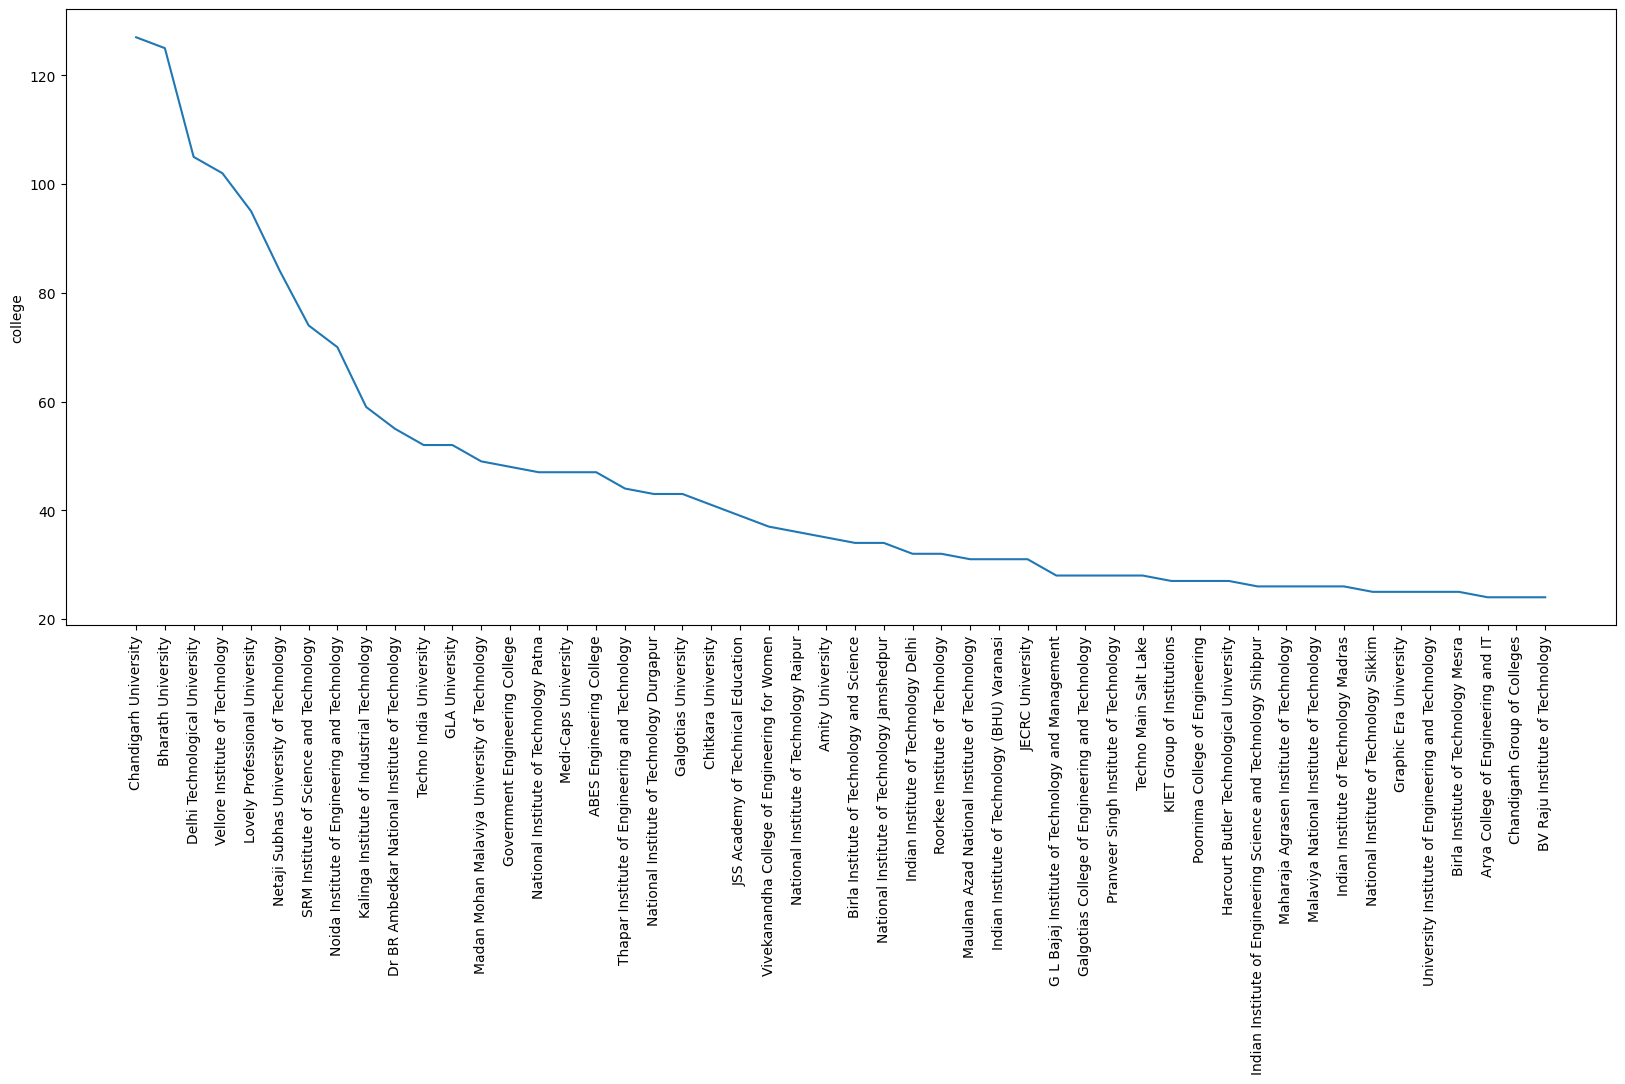

In [ ]:
value_counts23 = df23['college'].value_counts()
plt.figure(figsize = (20,8))
sns.lineplot(data = value_counts23.head(50))
plt.xticks(rotation = 90)
plt.show()

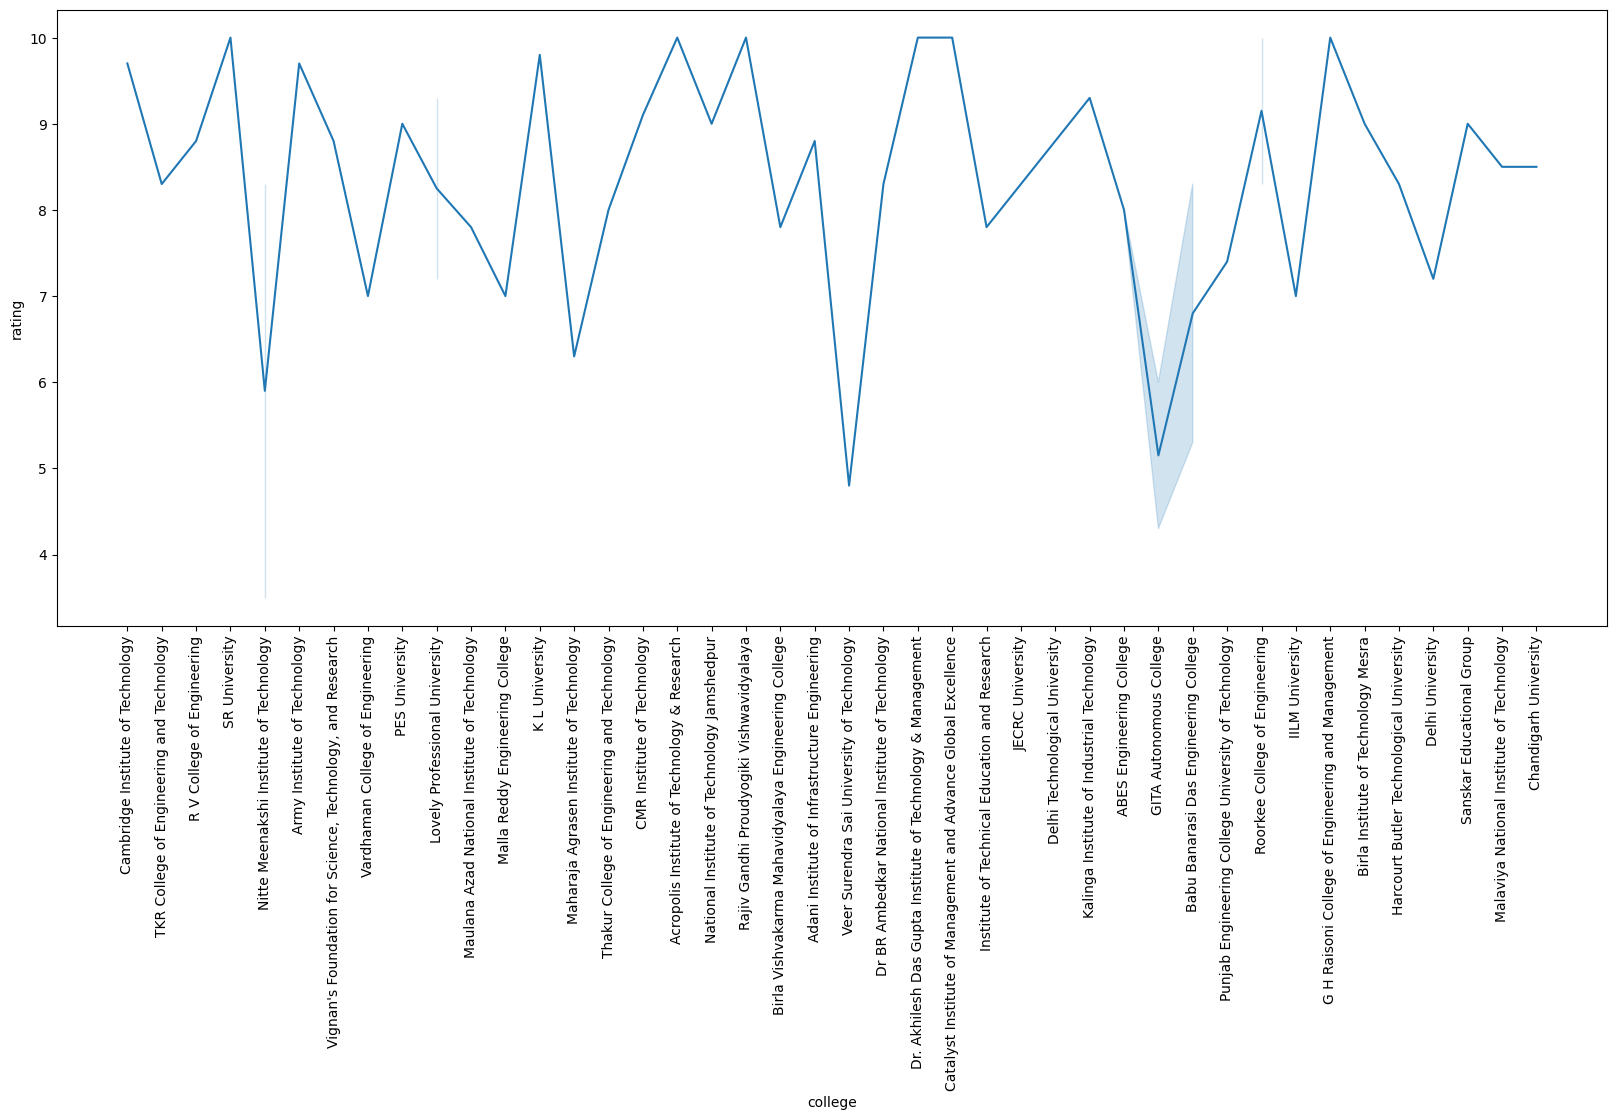

In [ ]:
plt.figure(figsize = (20,8))
sns.lineplot(data = df20.head(50), x = 'college', y = 'rating')
plt.xticks(rotation = 90)
plt.show()

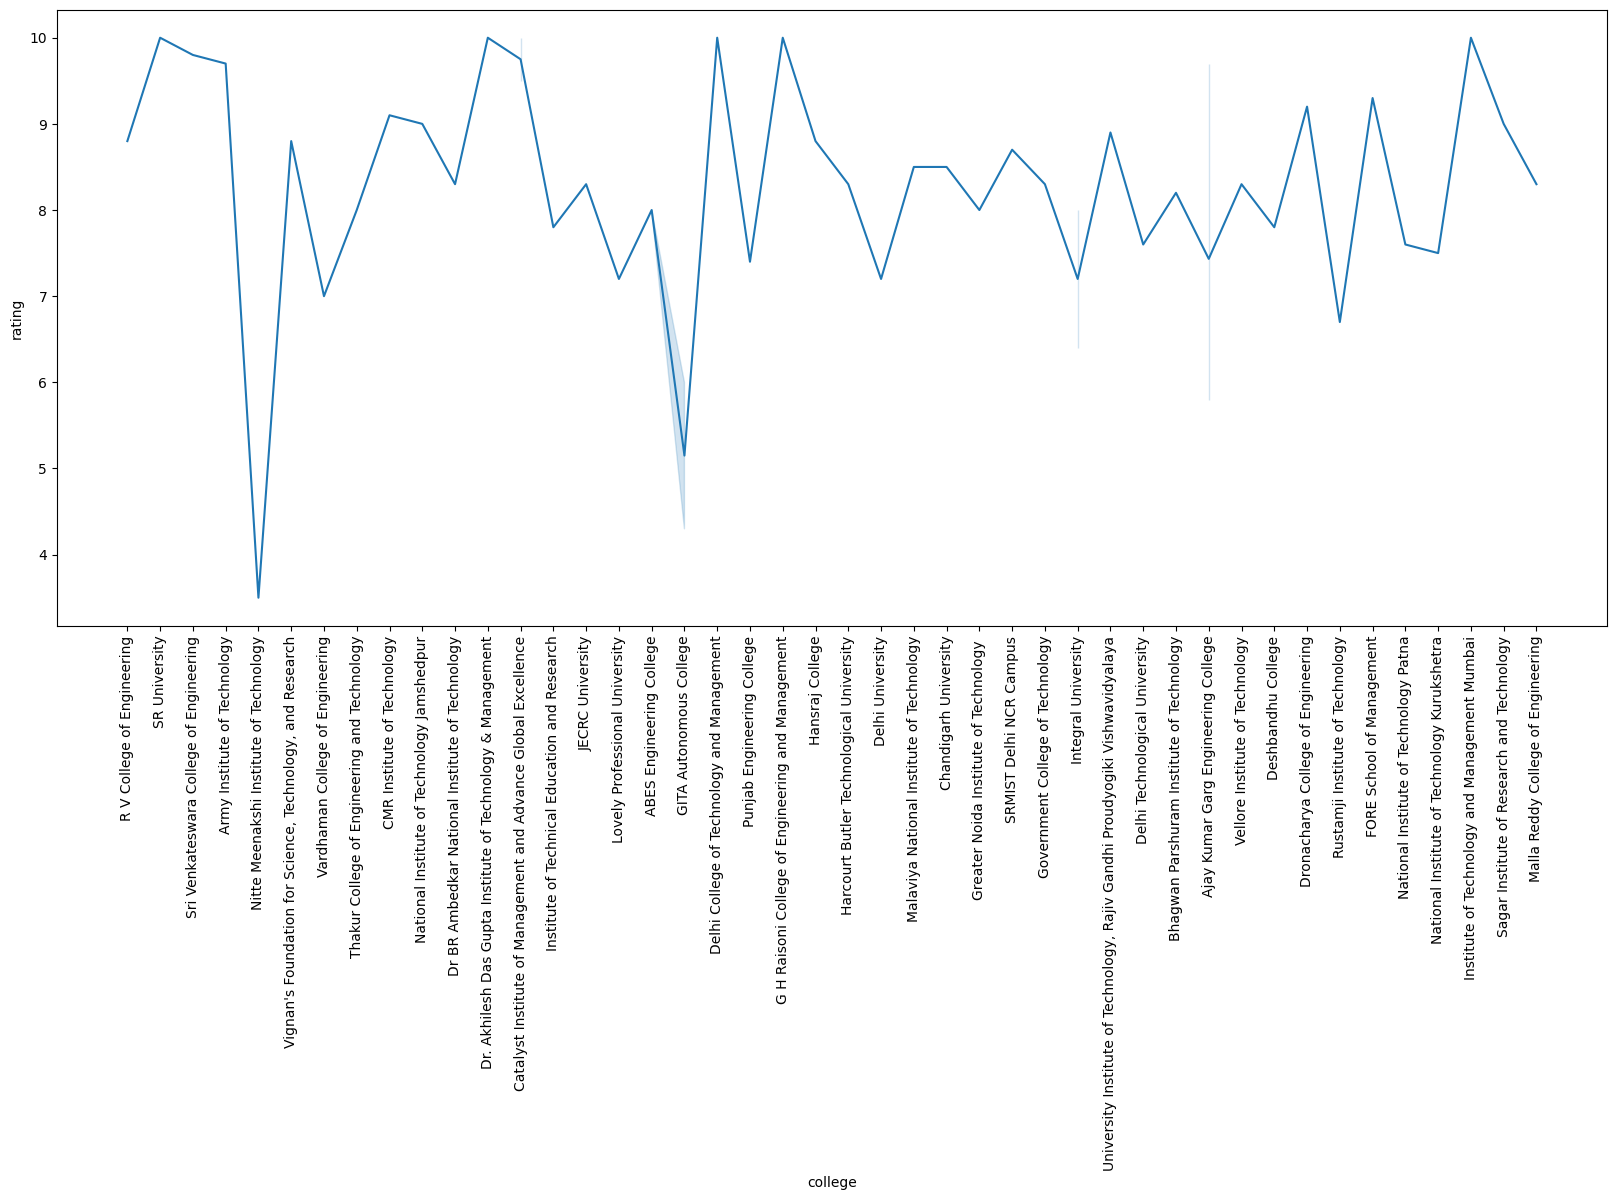

In [ ]:
plt.figure(figsize = (20,8))
sns.lineplot(data = df21.head(50), x = 'college', y = 'rating')
plt.xticks(rotation = 90)
plt.show()

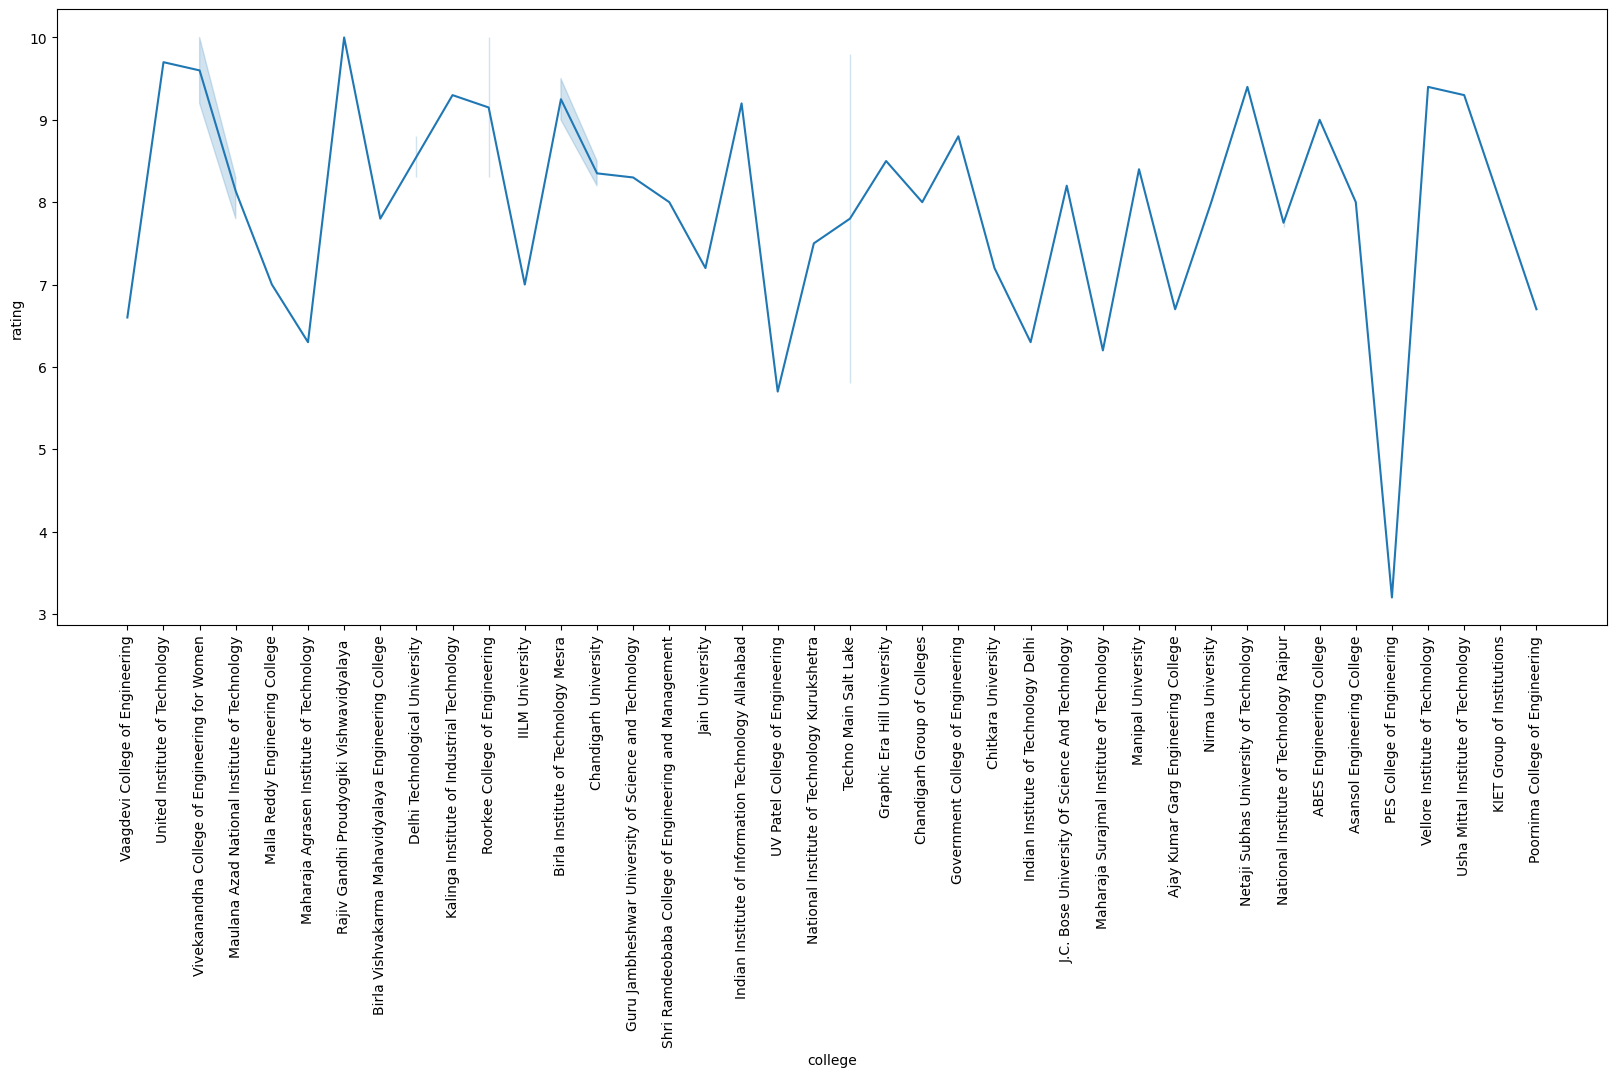

In [ ]:
plt.figure(figsize = (20,8))
sns.lineplot(data = df22.head(50), x = 'college', y = 'rating')
plt.xticks(rotation = 90)
plt.show()

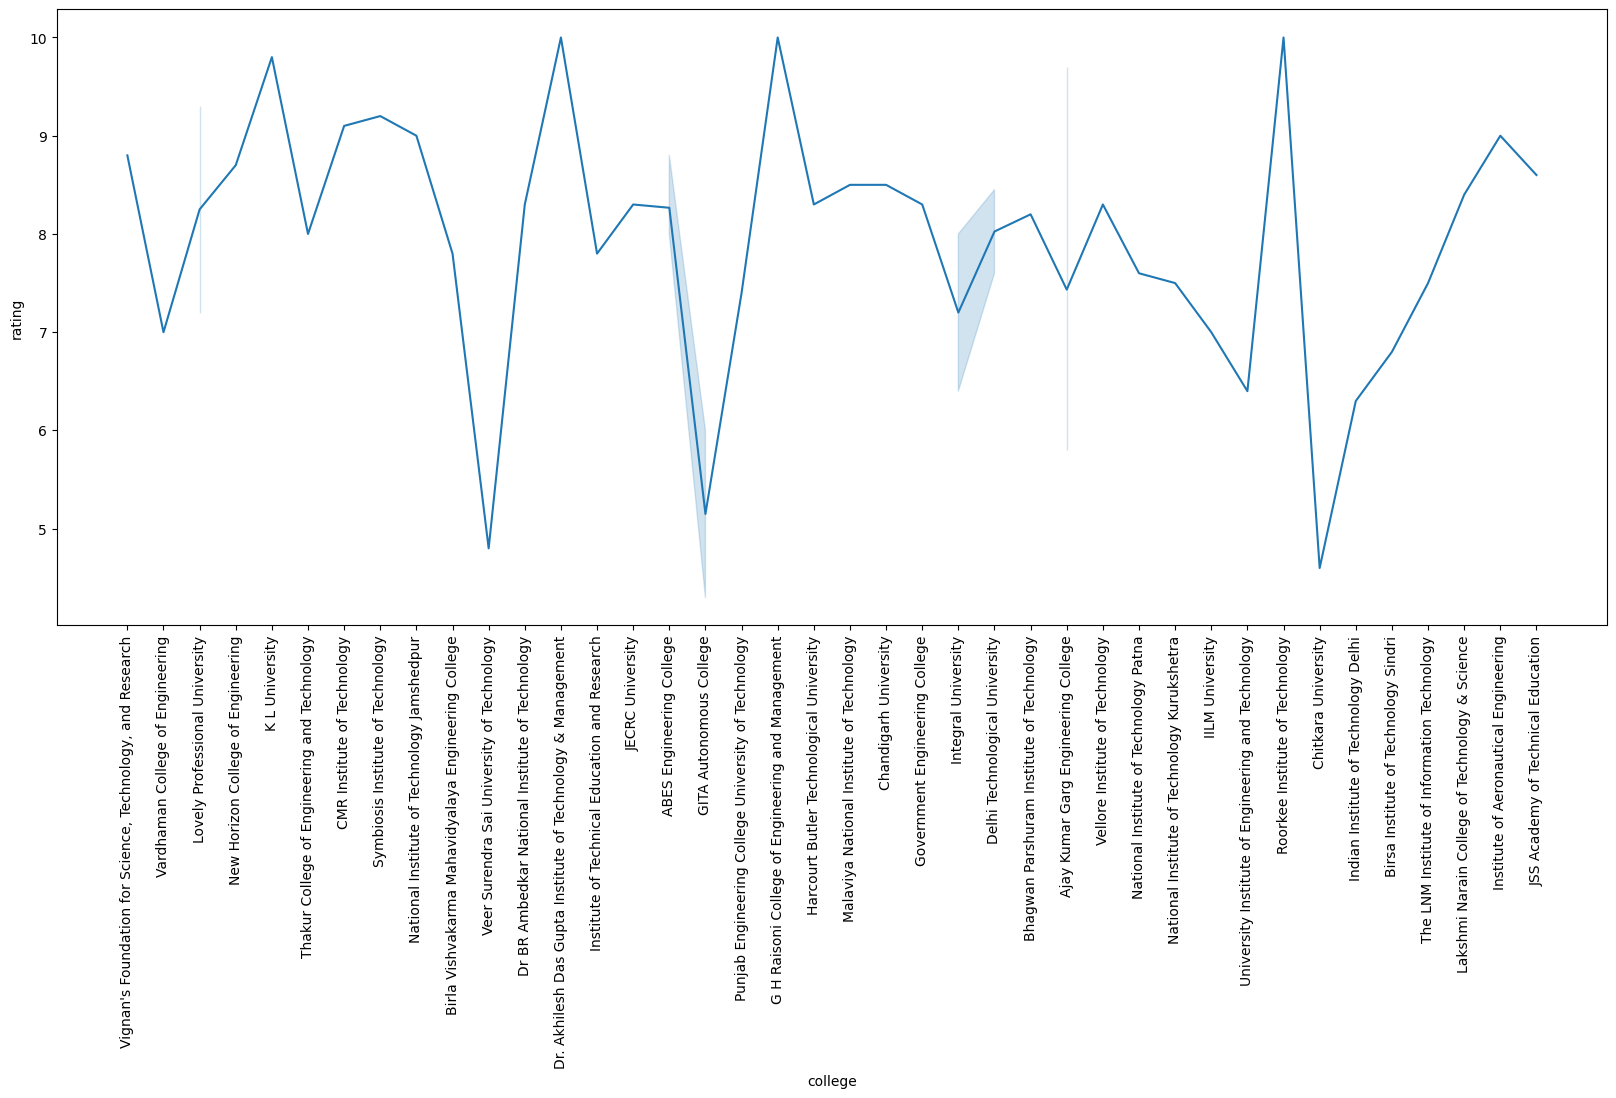

In [ ]:
plt.figure(figsize = (20,8))
sns.lineplot(data = df23.head(50), x = 'college', y = 'rating')
plt.xticks(rotation = 90)
plt.show()

### ***Sentimental Analysis*** - Random Forest Classifier

To convert textual review data into a sentiment value

In [ ]:
# No. of Trees : 50
# Sample dataset with 'review' and 'review_rating' columns
data = pd.read_csv('reviewed_rating.csv')

# Separate features (X) and sentiment labels (y)
X = data['review']
y = data['analysis']

# Convert text data into features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)


Accuracy: 0.8340829585207397


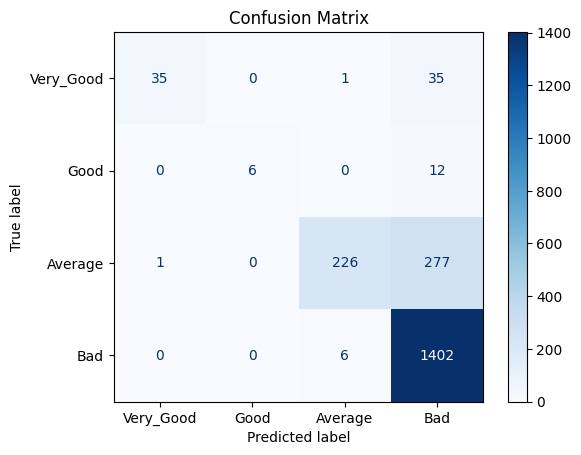

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Very_Good', "Good", "Average", 'Bad'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
joblib.dump(random_forest_classifier, 'rating_model')
joblib.dump(vectorizer, 'tfidf')

['tfidf']

In [ ]:
rating_model = joblib.load('rating_model')
tfidf = joblib.load('tfidf')

In [ ]:
X20 = df20['review']
X21 = df21['review']
X22 = df22['review']
X23 = df23['review']

In [ ]:
# Setting new data into already trained features
X20 = X20.fillna('NIL')
X_20 = tfidf.transform(X20)

In [ ]:
X_20.shape

(7102, 21068)

In [ ]:
X21 = X21.fillna('NIL')
X_21 = tfidf.transform(X21)

In [ ]:
X_21.shape

(10187, 21068)

In [ ]:
X22 = X22.fillna('NIL')
X_22 = tfidf.transform(X22)

In [ ]:
X_22.shape

(6134, 21068)

In [ ]:
X23 = X23.fillna('NIL')
X_23 = tfidf.transform(X23)

In [ ]:
X_23.shape

(4364, 21068)

Predicting the sentiment value

In [ ]:
reviewed_rating = rating_model.predict(X_20)
df20['sentiment_rating'] = reviewed_rating

In [ ]:
reviewed_rating = rating_model.predict(X_21)
df21['sentiment_rating'] = reviewed_rating

In [ ]:
reviewed_rating = rating_model.predict(X_22)
df22['sentiment_rating'] = reviewed_rating

In [ ]:
reviewed_rating = rating_model.predict(X_23)
df23['sentiment_rating'] = reviewed_rating

In [ ]:
df20.to_csv("collegereview_2020.csv", index = False)
df21.to_csv("collegereview_2021.csv", index = False)
df22.to_csv("collegereview_2022.csv", index = False)
df23.to_csv("collegereview_2023.csv", index = False)

In [ ]:
df20.head()

college  \
0           Cambridge Institute of Technology   
3   TKR College of Engineering and Technology   
4                  R V College of Engineering   
8                               SR University   
11    Nitte Meenakshi Institute of Technology   

                                               review  rating sentiment_rating  
0   And now by talking about the infrastructure.  ...     NaN        Very_Good  
3   Feasible for counselling students.expensive fo...     8.3        Very_Good  
4   Extravaganza concrete fair is the name of the ...     8.8        Very_Good  
8   There will be two to three fests in our colleg...    10.0        Very_Good  
11  No two students are exactly alike, and no two ...     8.3        Very_Good

In [ ]:
df21.head()

college  \
0               R V College of Engineering   
3                            SR University   
4  Sri Venkateswara College of Engineering   
6             Army Institute of Technology   
8  Nitte Meenakshi Institute of Technology   

                                              review  rating sentiment_rating  
0  Extravaganza concrete fair is the name of the ...     8.8        Very_Good  
3  There will be two to three fests in our colleg...    10.0        Very_Good  
4  I am a CSM student. I choose this course to my...     9.8        Very_Good  
6  Overall fees for the four years of engineering...     9.7        Very_Good  
8  I chose this course because I have immense int...     3.5        Very_Good

In [ ]:
df22.head()

college  \
1                 Vaagdevi College of Engineering   
6                  United Institute of Technology   
9   Vivekanandha College of Engineering for Women   
10  Maulana Azad National Institute of Technology   
12                Malla Reddy Engineering College   

                                               review  rating sentiment_rating  
1   In the final year, we are eligible for campus ...     6.6        Very_Good  
6   I join in this college through counseling. I s...     9.7        Very_Good  
9   Our faculties are very kind and caring to us. ...     9.2        Very_Good  
10  I got admission through my IIT-Jee Mains rank....     7.8        Very_Good  
12  I am from electronics and communication engine...     7.0        Very_Good

In [ ]:
df23.head()

college  \
9   Vignan's Foundation for Science, Technology, a...   
12                   Vardhaman College of Engineering   
15                     Lovely Professional University   
17                 New Horizon College of Engineering   
19                                     K L University   

                                               review  rating sentiment_rating  
9   the life on the campus should be enjoyable and...     8.8        Very_Good  
12  I am interested in computer science and engine...     7.0             Good  
15  Campus Life was too good there is no force fro...     9.3        Very_Good  
17  College provides information about most of the...     8.7        Very_Good  
19  There is a fibre speed wifi which is useful fo...     9.8        Very_Good

In [ ]:
# Converting Sentiment Value into Sentiment Score
def condition(row):
  if row['sentiment_rating'] == 'Very_Good':
    return 8
  elif row['sentiment_rating'] == 'Good':
    return 6
  elif row['sentiment_rating'] == 'Average':
    return 5
  else:
    return 3

In [ ]:
df20['sentiment_score'] = df20.apply(condition, axis = 1)
df21['sentiment_score'] = df21.apply(condition, axis = 1)
df22['sentiment_score'] = df22.apply(condition, axis = 1)
df23['sentiment_score'] = df23.apply(condition, axis = 1)

In [ ]:
# Calculate Final Score by taking average of rating and sentiment score
df20['final_Score'] = (df20['rating'] + df20['sentiment_score'])/2
df21['final_Score'] = (df21['rating'] + df21['sentiment_score'])/2
df22['final_Score'] = (df22['rating'] + df22['sentiment_score'])/2
df23['final_Score'] = (df23['rating'] + df23['sentiment_score'])/2

In [ ]:
df20.to_csv('collegereview_2020.csv', index = False)
df21.to_csv('collegereview_2021.csv', index = False)
df22.to_csv('collegereview_2022.csv', index = False)
df23.to_csv('collegereview_2023.csv', index = False)

In [ ]:
df20.head()

college  \
0           Cambridge Institute of Technology   
3   TKR College of Engineering and Technology   
4                  R V College of Engineering   
8                               SR University   
11    Nitte Meenakshi Institute of Technology   

                                               review  rating  \
0   And now by talking about the infrastructure.  ...     NaN   
3   Feasible for counselling students.expensive fo...     8.3   
4   Extravaganza concrete fair is the name of the ...     8.8   
8   There will be two to three fests in our colleg...    10.0   
11  No two students are exactly alike, and no two ...     8.3   

   sentiment_rating  sentiment_score  final_Score  
0         Very_Good                8          NaN  
3         Very_Good                8         8.15  
4         Very_Good                8         8.40  
8         Very_Good                8         9.00  
11        Very_Good                8         8.15

In [ ]:
df21.head()

college  \
0               R V College of Engineering   
3                            SR University   
4  Sri Venkateswara College of Engineering   
6             Army Institute of Technology   
8  Nitte Meenakshi Institute of Technology   

                                              review  rating sentiment_rating  \
0  Extravaganza concrete fair is the name of the ...     8.8        Very_Good   
3  There will be two to three fests in our colleg...    10.0        Very_Good   
4  I am a CSM student. I choose this course to my...     9.8        Very_Good   
6  Overall fees for the four years of engineering...     9.7        Very_Good   
8  I chose this course because I have immense int...     3.5        Very_Good   

   sentiment_score  final_Score  
0                8         8.40  
3                8         9.00  
4                8         8.90  
6                8         8.85  
8                8         5.75

In [ ]:
df22.head()

college  \
1                 Vaagdevi College of Engineering   
6                  United Institute of Technology   
9   Vivekanandha College of Engineering for Women   
10  Maulana Azad National Institute of Technology   
12                Malla Reddy Engineering College   

                                               review  rating  \
1   In the final year, we are eligible for campus ...     6.6   
6   I join in this college through counseling. I s...     9.7   
9   Our faculties are very kind and caring to us. ...     9.2   
10  I got admission through my IIT-Jee Mains rank....     7.8   
12  I am from electronics and communication engine...     7.0   

   sentiment_rating  sentiment_score  final_Score  
1         Very_Good                8         7.30  
6         Very_Good                8         8.85  
9         Very_Good                8         8.60  
10        Very_Good                8         7.90  
12        Very_Good                8         7.50

In [ ]:
df23.head()

college  \
9   Vignan's Foundation for Science, Technology, a...   
12                   Vardhaman College of Engineering   
15                     Lovely Professional University   
17                 New Horizon College of Engineering   
19                                     K L University   

                                               review  rating  \
9   the life on the campus should be enjoyable and...     8.8   
12  I am interested in computer science and engine...     7.0   
15  Campus Life was too good there is no force fro...     9.3   
17  College provides information about most of the...     8.7   
19  There is a fibre speed wifi which is useful fo...     9.8   

   sentiment_rating  sentiment_score  final_Score  
9         Very_Good                8         8.40  
12             Good                6         6.50  
15        Very_Good                8         8.65  
17        Very_Good                8         8.35  
19        Very_Good                8         8.90

In [ ]:
# If Sentiment Score is NULL then consider rating
df20['final_Score'].fillna(df20['rating'], inplace = True)
df21['final_Score'].fillna(df21['rating'], inplace = True)
df22['final_Score'].fillna(df22['rating'], inplace = True)
df23['final_Score'].fillna(df23['rating'], inplace = True)

In [ ]:
# If Rating is NULL then consider Sentiment Score
df20['final_Score'].fillna(df20['sentiment_score'], inplace = True)
df21['final_Score'].fillna(df21['sentiment_score'], inplace = True)
df22['final_Score'].fillna(df22['sentiment_score'], inplace = True)
df23['final_Score'].fillna(df23['sentiment_score'], inplace = True)

In [ ]:
df20

college  \
0                      Cambridge Institute of Technology   
3              TKR College of Engineering and Technology   
4                             R V College of Engineering   
8                                          SR University   
11               Nitte Meenakshi Institute of Technology   
...                                                  ...   
12311             National Institute of Technology Patna   
12313  Guru Jambheshwar University of Science and Tec...   
12314             National Institute of Technology Patna   
12316                Birla Institute of Technology Mesra   
12318                         Dharmsinh Desai University   

                                                  review  rating  \
0      And now by talking about the infrastructure.  ...     NaN   
3      Feasible for counselling students.expensive fo...     8.3   
4      Extravaganza concrete fair is the name of the ...     8.8   
8      There will be two to three fests in our colleg...    10.0   
11     No two students are exactly alike, and no two ...     8.3   
...                                                  ...     ...   
12311  The gender ratio is not proper not even in my ...     7.7   
12313  Amazing campus life. The university is equippe...    10.0   
12314  I am a student in the Electrical department. W...     9.0   
12316  The fees Are pretty high like it is almost 160...     9.4   
12318  There is no extra curricular activities conduc...     7.8   

      sentiment_rating  sentiment_score  final_Score  
0            Very_Good                8         8.00  
3            Very_Good                8         8.15  
4            Very_Good                8         8.40  
8            Very_Good                8         9.00  
11           Very_Good                8         8.15  
...                ...              ...          ...  
12311        Very_Good                8         7.85  
12313        Very_Good                8         9.00  
12314        Very_Good                8         8.50  
12316        Very_Good                8         8.70  
12318        Very_Good                8         7.90  

[7102 rows x 6 columns]

Group the ratings of each college and take the average

In [ ]:
clg_rating20 = df20.groupby('college')['final_Score'].mean().reset_index()
clg_rating20.rename(columns = {'final_Score' : "2020"}, inplace = True)
clg_rating20

college      2020
0                           ABES Engineering College  7.991176
1       Acropolis Institute of Technology & Research  8.086364
2      Adani Institute of Infrastructure Engineering  7.700000
3                Ajay Kumar Garg Engineering College  7.828333
4                                Alliance University  7.990000
..                                               ...       ...
289  Vishwakarma Institute of Information Technology  7.790000
290              Vishwakarma Institute of Technology  7.925000
291    Visvesvaraya National Institute of Technology  7.571053
292    Vivekanandha College of Engineering for Women  7.963000
293        Yeshwantrao Chavan College of Engineering  7.445455

[294 rows x 2 columns]

In [ ]:
clg_rating21 = df21.groupby('college')['final_Score'].mean().reset_index()
clg_rating21.rename(columns = {'final_Score' : "2021"}, inplace = True)
clg_rating21

college      2021
0                         ABES Engineering College  7.995902
1                     ABES Institute of Technology  7.263333
2                          AMC Engineering College  7.380769
3                            Academy of Technology  7.979167
4     Acropolis Institute of Technology & Research  7.590385
..                                             ...       ...
370            Vishwakarma Institute of Technology  8.189583
371  Visvesvaraya National Institute of Technology  7.850000
372                  Vivekananda Global University  8.370000
373               Walchand Institute of Technology  8.050000
374      Yeshwantrao Chavan College of Engineering  8.120588

[375 rows x 2 columns]

In [ ]:
clg_rating22 = df22.groupby('college')['final_Score'].mean().reset_index()
clg_rating22.rename(columns = {'final_Score' : "2022"}, inplace = True)
clg_rating22

college      2022
0                           ABES Engineering College  8.011429
1                       ABES Institute of Technology  7.377273
2                                     AKS University  6.890000
3     Abacus Institute of Engineering and Management  7.954545
4                              Academy of Technology  7.945000
..                                               ...       ...
268  Vishwakarma Institute of Information Technology  8.116667
269              Vishwakarma Institute of Technology  7.731818
270    Visvesvaraya National Institute of Technology  7.254167
271    Vivekanandha College of Engineering for Women  7.873256
272        Yeshwantrao Chavan College of Engineering  7.575000

[273 rows x 2 columns]

In [ ]:
clg_rating23 = df23.groupby('college')['final_Score'].mean().reset_index()
clg_rating23.rename(columns = {'final_Score' : "2023"}, inplace = True)
clg_rating23

college      2023
0                           ABES Engineering College  8.043617
1                       ABES Institute of Technology  6.958333
2                                     AKS University  6.500000
3     Abacus Institute of Engineering and Management  6.650000
4                              Academy of Technology  8.437500
..                                               ...       ...
255  Vishwakarma Institute of Information Technology  7.777273
256              Vishwakarma Institute of Technology  8.153846
257    Visvesvaraya National Institute of Technology  7.547222
258    Vivekanandha College of Engineering for Women  8.106757
259        Yeshwantrao Chavan College of Engineering  7.933333

[260 rows x 2 columns]

In [ ]:
# Merging all the years rating data
final_rating = pd.merge(clg_rating20, clg_rating21, on='college', how='outer')
final_rating = pd.merge(final_rating, clg_rating22, on='college', how='outer')
final_rating = pd.merge(final_rating, clg_rating23, on='college', how='outer')

In [ ]:
final_rating

college      2020      2021  \
0                         ABES Engineering College  7.991176  7.995902   
1     Acropolis Institute of Technology & Research  8.086364  7.590385   
2    Adani Institute of Infrastructure Engineering  7.700000       NaN   
3              Ajay Kumar Garg Engineering College  7.828333  7.903488   
4                              Alliance University  7.990000       NaN   
..                                             ...       ...       ...   
466              Symbiosis Institute of Technology       NaN       NaN   
467                  Techno International New Town       NaN       NaN   
468                UV Patel College of Engineering       NaN       NaN   
469   Vasireddy Venkatadri Institute of Technology       NaN       NaN   
470                        Vinoba Bhave University       NaN       NaN   

         2022      2023  
0    8.011429  8.043617  
1         NaN       NaN  
2         NaN       NaN  
3    8.070833  7.720833  
4         NaN       NaN  
..        ...       ...  
466  8.347059  7.830000  
467  7.695455  7.430000  
468  8.010000  7.750000  
469  8.593333  8.525000  
470  7.517742       NaN  

[471 rows x 5 columns]

Data Imputation

In [ ]:
final_rating['avg_rating'] = final_rating[['2020','2021','2022','2023']].mean(axis = 1)
final_rating

college      2020      2021  \
0                         ABES Engineering College  7.991176  7.995902   
1     Acropolis Institute of Technology & Research  8.086364  7.590385   
2    Adani Institute of Infrastructure Engineering  7.700000       NaN   
3              Ajay Kumar Garg Engineering College  7.828333  7.903488   
4                              Alliance University  7.990000       NaN   
..                                             ...       ...       ...   
466              Symbiosis Institute of Technology       NaN       NaN   
467                  Techno International New Town       NaN       NaN   
468                UV Patel College of Engineering       NaN       NaN   
469   Vasireddy Venkatadri Institute of Technology       NaN       NaN   
470                        Vinoba Bhave University       NaN       NaN   

         2022      2023  avg_rating  
0    8.011429  8.043617    8.010531  
1         NaN       NaN    7.838374  
2         NaN       NaN    7.700000  
3    8.070833  7.720833    7.880872  
4         NaN       NaN    7.990000  
..        ...       ...         ...  
466  8.347059  7.830000    8.088529  
467  7.695455  7.430000    7.562727  
468  8.010000  7.750000    7.880000  
469  8.593333  8.525000    8.559167  
470  7.517742       NaN    7.517742  

[471 rows x 6 columns]

In [ ]:
final_rating['2020'].fillna(final_rating['avg_rating'], inplace = True)
final_rating['2021'].fillna(final_rating['avg_rating'], inplace = True)
final_rating['2022'].fillna(final_rating['avg_rating'], inplace = True)
final_rating['2023'].fillna(final_rating['avg_rating'], inplace = True)
final_rating.drop(columns = ['avg_rating'], axis = 1, inplace = True)
final_rating

college      2020      2021  \
0                         ABES Engineering College  7.991176  7.995902   
1     Acropolis Institute of Technology & Research  8.086364  7.590385   
2    Adani Institute of Infrastructure Engineering  7.700000  7.700000   
3              Ajay Kumar Garg Engineering College  7.828333  7.903488   
4                              Alliance University  7.990000  7.990000   
..                                             ...       ...       ...   
466              Symbiosis Institute of Technology  8.088529  8.088529   
467                  Techno International New Town  7.562727  7.562727   
468                UV Patel College of Engineering  7.880000  7.880000   
469   Vasireddy Venkatadri Institute of Technology  8.559167  8.559167   
470                        Vinoba Bhave University  7.517742  7.517742   

         2022      2023  
0    8.011429  8.043617  
1    7.838374  7.838374  
2    7.700000  7.700000  
3    8.070833  7.720833  
4    7.990000  7.990000  
..        ...       ...  
466  8.347059  7.830000  
467  7.695455  7.430000  
468  8.010000  7.750000  
469  8.593333  8.525000  
470  7.517742  7.517742  

[471 rows x 5 columns]

In [ ]:
final_rating.to_csv('final_rating.csv')

NIRF Factors

In [ ]:
# Load NIRF Ranking Data
nirf = pd.read_csv("nirf_factors.csv")
nirf

Institute Name  Institute ID  \
0                Indian Institute of Technology Madras   IR-E-U-0456   
1                 Indian Institute of Technology Delhi   IR-E-I-1074   
2                Indian Institute of Technology Bombay   IR-E-U-0306   
3                Indian Institute of Technology Kanpur   IR-E-I-1075   
4               Indian Institute of Technology Roorkee   IR-E-U-0560   
..                                                 ...           ...   
241       Shri G. S. Institute of Technology & Science  IR-E-C-36143   
242               Lakshmi Narain College of Technology  IR-E-C-36022   
243  Centurion  University  of Technology and Manag...   IR-E-U-0353   
244  International Institute of Information Technol...   IR-E-I-1033   
245         Kakatiya Institute of Technology & Science  IR-E-C-27400   

     Score_2023  Rank_2023  TLR (100)_2023  RPC (100)_2023  GO (100)_2023  \
0         89.79        1.0           95.19           96.41          79.89   
1         87.09        2.0           84.89           94.74          85.00   
2         80.74        3.0           79.12           87.94          81.93   
3         80.65        4.0           84.35           80.16          88.99   
4         75.64        5.0           74.55           78.36          88.91   
..          ...        ...             ...             ...            ...   
241         NaN        NaN             NaN             NaN            NaN   
242         NaN        NaN             NaN             NaN            NaN   
243         NaN        NaN             NaN             NaN            NaN   
244         NaN        NaN             NaN             NaN            NaN   
245         NaN        NaN             NaN             NaN            NaN   

     OI (100)_2023  PERCEPTION (100)_2023  Score_2022  ...  GO (100)_2021  \
0            63.26                 100.00       90.04  ...          81.92   
1            67.92                  94.07       88.12  ...          80.97   
2            56.89                  85.36       83.96  ...          79.71   
3            58.82                  76.15       82.56  ...          89.79   
4            60.42                  59.37       76.70  ...          90.74   
..             ...                    ...         ...  ...            ...   
241            NaN                    NaN         NaN  ...          55.10   
242            NaN                    NaN         NaN  ...          57.61   
243            NaN                    NaN         NaN  ...          54.32   
244            NaN                    NaN         NaN  ...          54.47   
245            NaN                    NaN         NaN  ...          49.13   

     OI (100)_2021  PERCEPTION (100)_2021  Score_2020  Rank_2020  \
0            62.44                 100.00       89.93        1.0   
1            66.39                  98.63       88.08        2.0   
2            53.68                  92.88       85.08        3.0   
3            55.96                  87.05       82.18        4.0   
4            63.36                  63.59       76.29        6.0   
..             ...                    ...         ...        ...   
241          48.30                   6.19         NaN        NaN   
242          55.45                   0.74         NaN        NaN   
243          53.05                   0.74         NaN        NaN   
244          49.64                   4.23         NaN        NaN   
245          49.25                   4.90         NaN        NaN   

     TLR (100)_2020  RPC (100)_2020  GO (100)_2020  OI (100)_2020  \
0             95.42           94.64          83.90          61.31   
1             90.79           96.15          80.36          64.81   
2             91.00           93.37          77.60          49.99   
3             86.22           82.08          88.44          54.21   
4             77.21           76.57          89.65          61.71   
..              ...             ...            ...            ...   
241             NaN      

In [ ]:
nirf.rename(columns = {'Institute Name' : "Institute"}, inplace = True)

In [ ]:
josaa20 = pd.read_csv("josaa_2020.csv")
josaa21 = pd.read_csv("josaa_2021.csv")
josaa22 = pd.read_csv("josaa_2022.csv")
josaa23 = pd.read_csv("josaa_2023.csv")

In [ ]:
josaa20

Institute  \
0             Indian Institute of Technology Bhubaneswar   
1             Indian Institute of Technology Bhubaneswar   
2             Indian Institute of Technology Bhubaneswar   
3             Indian Institute of Technology Bhubaneswar   
4             Indian Institute of Technology Bhubaneswar   
...                                                  ...   
54603  North Eastern Regional Institute of Science an...   
54604  North Eastern Regional Institute of Science an...   
54605  North Eastern Regional Institute of Science an...   
54606  North Eastern Regional Institute of Science an...   
54607  North Eastern Regional Institute of Science an...   

                                   Academic Program Name   Seat Type  \
0      Civil Engineering (4 Years, Bachelor of Techno...        OPEN   
1      Civil Engineering (4 Years, Bachelor of Techno...        OPEN   
2      Civil Engineering (4 Years, Bachelor of Techno...  OPEN (PwD)   
3      Civil Engineering (4 Years, Bachelor of Techno...         EWS   
4      Civil Engineering (4 Years, Bachelor of Techno...         EWS   
...                                                  ...         ...   
54603  Electrical Engineering (4 Years, Bachelor of T...         EWS   
54604  Electronics and Communication Engineering (4 Y...        OPEN   
54605  Electronics and Communication Engineering (4 Y...         EWS   
54606  Mechanical Engineering (4 Years, Bachelor of T...         EWS   
54607  Mechanical Engineering (4 Years, Bachelor of T...     OBC-NCL   

                                      Gender  Opening Rank  Closing Rank  
0                             Gender-Neutral          6836          8816  
1      Female-only (including Supernumerary)         13184         14366  
2                             Gender-Neutral            56            56  
3                             Gender-Neutral          1297          1532  
4      Female-only (including Supernumerary)          2410          2655  
...                                      ...           ...           ...  
54603                         Gender-Neutral          9515          9515  
54604                         Gender-Neutral         23734         23734  
54605                         Gender-Neutral         10153         10153  
54606                         Gender-Neutral          9547          9547  
54607                         Gender-Neutral         19386         19386  

[54608 rows x 6 columns]

In [ ]:
josaa21

Institute  \
0      Indian Institute of Technology Bhubaneswar   
1      Indian Institute of Technology Bhubaneswar   
2      Indian Institute of Technology Bhubaneswar   
3      Indian Institute of Technology Bhubaneswar   
4      Indian Institute of Technology Bhubaneswar   
...                                           ...   
31885     North-Eastern Hill University, Shillong   
31886     North-Eastern Hill University, Shillong   
31887     North-Eastern Hill University, Shillong   
31888     North-Eastern Hill University, Shillong   
31889     North-Eastern Hill University, Shillong   

                                   Academic Program Name Seat Type  \
0      Civil Engineering (4 Years, Bachelor of Techno...      OPEN   
1      Civil Engineering (4 Years, Bachelor of Techno...      OPEN   
2      Civil Engineering (4 Years, Bachelor of Techno...       EWS   
3      Civil Engineering (4 Years, Bachelor of Techno...       EWS   
4      Civil Engineering (4 Years, Bachelor of Techno...   OBC-NCL   
...                                                  ...       ...   
31885  Information Technology (4 Years, Bachelor of T...      OPEN   
31886  Information Technology (4 Years, Bachelor of T...       EWS   
31887  Information Technology (4 Years, Bachelor of T...   OBC-NCL   
31888  Information Technology (4 Years, Bachelor of T...        SC   
31889  Information Technology (4 Years, Bachelor of T...        ST   

                                      Gender  Opening Rank  Closing Rank  
0                             Gender-Neutral        8471.0       10302.0  
1      Female-only (including Supernumerary)       16750.0       17412.0  
2                             Gender-Neutral        1420.0        1603.0  
3      Female-only (including Supernumerary)        3536.0        3536.0  
4                             Gender-Neutral        3044.0        3846.0  
...                                      ...           ...           ...  
31885                         Gender-Neutral       59431.0       68295.0  
31886                         Gender-Neutral       10427.0       11089.0  
31887                         Gender-Neutral       21224.0       21577.0  
31888                         Gender-Neutral        8907.0       11617.0  
31889                         Gender-Neutral        5484.0        6017.0  

[31890 rows x 6 columns]

In [ ]:
josaa22

Institute  \
0      Indian Institute of Technology Bhubaneswar   
1      Indian Institute of Technology Bhubaneswar   
2      Indian Institute of Technology Bhubaneswar   
3      Indian Institute of Technology Bhubaneswar   
4      Indian Institute of Technology Bhubaneswar   
...                                           ...   
58869                 Central University of Jammu   
58870                 Central University of Jammu   
58871                 Central University of Jammu   
58872                 Central University of Jammu   
58873                 Central University of Jammu   

                                   Academic Program Name Seat Type  \
0      Civil Engineering (4 Years, Bachelor of Techno...      OPEN   
1      Civil Engineering (4 Years, Bachelor of Techno...      OPEN   
2      Civil Engineering (4 Years, Bachelor of Techno...       EWS   
3      Civil Engineering (4 Years, Bachelor of Techno...       EWS   
4      Civil Engineering (4 Years, Bachelor of Techno...   OBC-NCL   
...                                                  ...       ...   
58869  Electronics and Communication Engineering (Avi...      OPEN   
58870  Electronics and Communication Engineering (Avi...       EWS   
58871  Electronics and Communication Engineering (Avi...   OBC-NCL   
58872  Electronics and Communication Engineering (Avi...        SC   
58873  Electronics and Communication Engineering (Avi...        ST   

                                      Gender  Opening Rank  Closing Rank  
0                             Gender-Neutral          9193         11771  
1      Female-only (including Supernumerary)         16138         20164  
2                             Gender-Neutral          1605          1744  
3      Female-only (including Supernumerary)          3159          3159  
4                             Gender-Neutral          3997          4297  
...                                      ...           ...           ...  
58869                         Gender-Neutral         56910         76463  
58870                         Gender-Neutral         11263         11413  
58871                         Gender-Neutral         22569         24055  
58872                         Gender-Neutral         12164         12435  
58873                         Gender-Neutral          4925          5409  

[58874 rows x 6 columns]

In [ ]:
josaa23

Institute  \
0         Indian Institute  of Technology Bhubaneswar   
1         Indian Institute  of Technology Bhubaneswar   
2         Indian Institute  of Technology Bhubaneswar   
3         Indian Institute  of Technology Bhubaneswar   
4         Indian Institute  of Technology Bhubaneswar   
...                                               ...   
62854  Indian Institute of Handloom Technology, Salem   
62855  Indian Institute of Handloom Technology, Salem   
62856  Indian Institute of Handloom Technology, Salem   
62857  Indian Institute of Handloom Technology, Salem   
62858  Indian Institute of Handloom Technology, Salem   

                                   Academic Program Name Seat Type  \
0      Civil Engineering (4 Years, Bachelor of Techno...      OPEN   
1      Civil Engineering (4 Years, Bachelor of Techno...      OPEN   
2      Civil Engineering (4 Years, Bachelor of Techno...       EWS   
3      Civil Engineering (4 Years, Bachelor of Techno...       EWS   
4      Civil Engineering (4 Years, Bachelor of Techno...   OBC-NCL   
...                                                  ...       ...   
62854  Handloom and Textile Technology (4 Years, Bach...      OPEN   
62855  Handloom and Textile Technology (4 Years, Bach...       EWS   
62856  Handloom and Textile Technology (4 Years, Bach...   OBC-NCL   
62857  Handloom and Textile Technology (4 Years, Bach...        SC   
62858  Handloom and Textile Technology (4 Years, Bach...        ST   

                                      Gender  Opening Rank  Closing Rank  
0                             Gender-Neutral          9462         12911  
1      Female-only (including Supernumerary)         16218         19272  
2                             Gender-Neutral          1852          1977  
3      Female-only (including Supernumerary)          3056          3056  
4                             Gender-Neutral          4014          4642  
...                                      ...           ...           ...  
62854                         Gender-Neutral         86070        101502  
62855                         Gender-Neutral         16842         17273  
62856                         Gender-Neutral         31415         33784  
62857                         Gender-Neutral         11685         15633  
62858                         Gender-Neutral          7884          8129  

[62859 rows x 6 columns]

In [ ]:
# Dropping the unecessary columns
josaa20.drop(columns = [ 'Academic Program Name', 'Gender', 'Opening Rank'],axis = 1, inplace = True)
josaa21.drop(columns = [ 'Academic Program Name', 'Gender', 'Opening Rank'],axis = 1, inplace = True)
josaa22.drop(columns = [ 'Academic Program Name', 'Gender', 'Opening Rank'],axis = 1, inplace = True)
josaa23.drop(columns = [ 'Academic Program Name', 'Gender', 'Opening Rank'],axis = 1, inplace = True)

In [ ]:
# Finding the maximum rank for an Institute along with the Seat Type
cutoff20 = josaa20.groupby(["Institute", "Seat Type"])['Closing Rank'].max().reset_index()
cutoff21 = josaa21.groupby(["Institute", "Seat Type"])['Closing Rank'].max().reset_index()
cutoff22 = josaa22.groupby(["Institute", "Seat Type"])['Closing Rank'].max().reset_index()
cutoff23 = josaa23.groupby(["Institute", "Seat Type"])['Closing Rank'].max().reset_index()

In [ ]:
cutoff20

Institute      Seat Type  \
0                            Assam University, Silchar            EWS   
1                            Assam University, Silchar        OBC-NCL   
2                            Assam University, Silchar           OPEN   
3                            Assam University, Silchar     OPEN (PwD)   
4                            Assam University, Silchar             SC   
..                                                 ...            ...   
842  lndian Institute of Food Processing Technology...  OBC-NCL (PwD)   
843  lndian Institute of Food Processing Technology...           OPEN   
844  lndian Institute of Food Processing Technology...     OPEN (PwD)   
845  lndian Institute of Food Processing Technology...             SC   
846  lndian Institute of Food Processing Technology...             ST   

     Closing Rank  
0           40919  
1          148142  
2          257783  
3            2479  
4           30569  
..            ...  
842          1189  
843         63112  
844          1432  
845         10593  
846          6355  

[847 rows x 3 columns]

In [ ]:
cutoff21

Institute   Seat Type  \
0                            Assam University, Silchar         EWS   
1                            Assam University, Silchar     OBC-NCL   
2                            Assam University, Silchar        OPEN   
3                            Assam University, Silchar  OPEN (PwD)   
4                            Assam University, Silchar          SC   
..                                                 ...         ...   
840  lndian Institute of Food Processing Technology...     OBC-NCL   
841  lndian Institute of Food Processing Technology...        OPEN   
842  lndian Institute of Food Processing Technology...  OPEN (PwD)   
843  lndian Institute of Food Processing Technology...          SC   
844  lndian Institute of Food Processing Technology...          ST   

     Closing Rank  
0         43141.0  
1        116838.0  
2        274792.0  
3          1933.0  
4         25151.0  
..            ...  
840       27698.0  
841       88001.0  
842        2598.0  
843       12669.0  
844        6116.0  

[845 rows x 3 columns]

In [ ]:
cutoff22

Institute   Seat Type  \
0                            Assam University, Silchar         EWS   
1                            Assam University, Silchar     OBC-NCL   
2                            Assam University, Silchar        OPEN   
3                            Assam University, Silchar  OPEN (PwD)   
4                            Assam University, Silchar          SC   
..                                                 ...         ...   
868  Visvesvaraya National Institute of Technology,...  OPEN (PwD)   
869  Visvesvaraya National Institute of Technology,...          SC   
870  Visvesvaraya National Institute of Technology,...    SC (PwD)   
871  Visvesvaraya National Institute of Technology,...          ST   
872  Visvesvaraya National Institute of Technology,...    ST (PwD)   

     Closing Rank  
0           31666  
1           91270  
2          186477  
3            1823  
4           28769  
..            ...  
868          1985  
869          9384  
870            86  
871          6795  
872            65  

[873 rows x 3 columns]

In [ ]:
cutoff23

Institute   Seat Type  \
0                            Assam University, Silchar         EWS   
1                            Assam University, Silchar     OBC-NCL   
2                            Assam University, Silchar        OPEN   
3                            Assam University, Silchar  OPEN (PwD)   
4                            Assam University, Silchar          SC   
..                                                 ...         ...   
925  Visvesvaraya National Institute of Technology,...        OPEN   
926  Visvesvaraya National Institute of Technology,...  OPEN (PwD)   
927  Visvesvaraya National Institute of Technology,...          SC   
928  Visvesvaraya National Institute of Technology,...    SC (PwD)   
929  Visvesvaraya National Institute of Technology,...          ST   

     Closing Rank  
0           35500  
1           94871  
2          187883  
3            2978  
4           25922  
..            ...  
925         60600  
926          1945  
927         10470  
928            72  
929          7900  

[930 rows x 3 columns]

In [ ]:
cutoff20.rename(columns = {'Closing Rank' : "CR_20"}, inplace = True)
cutoff21.rename(columns = {'Closing Rank' : "CR_21"}, inplace = True)
cutoff22.rename(columns = {'Closing Rank' : "CR_22"}, inplace = True)
cutoff23.rename(columns = {'Closing Rank' : "CR_23"}, inplace = True)

In [ ]:
# Merging all the year Cut-offs into a single Frame
final_cutoffs = pd.merge(cutoff20, cutoff21, on=['Institute', 'Seat Type'], how='outer')
final_cutoffs = pd.merge(final_cutoffs, cutoff22, on=['Institute', 'Seat Type'], how='outer')
final_cutoffs = pd.merge(final_cutoffs, cutoff23, on=['Institute', 'Seat Type'], how='outer')

In [ ]:
final_cutoffs

Institute   Seat Type     CR_20  \
0                             Assam University, Silchar         EWS   40919.0   
1                             Assam University, Silchar     OBC-NCL  148142.0   
2                             Assam University, Silchar        OPEN  257783.0   
3                             Assam University, Silchar  OPEN (PwD)    2479.0   
4                             Assam University, Silchar          SC   30569.0   
...                                                 ...         ...       ...   
1202  School of Engineering, Tezpur University, Napa...    SC (PwD)       NaN   
1203  Shri Mata Vaishno Devi University, Katra, Jamm...         EWS       NaN   
1204  Shri Mata Vaishno Devi University, Katra, Jamm...     OBC-NCL       NaN   
1205  Shri Mata Vaishno Devi University, Katra, Jamm...          SC       NaN   
1206  Shri Mata Vaishno Devi University, Katra, Jamm...          ST       NaN   

         CR_21     CR_22     CR_23  
0      43141.0   31666.0   35500.0  
1     116838.0   91270.0   94871.0  
2     274792.0  186477.0  187883.0  
3       1933.0    1823.0    2978.0  
4      25151.0   28769.0   25922.0  
...        ...       ...       ...  
1202       NaN       NaN     215.0  
1203       NaN       NaN   14943.0  
1204       NaN       NaN   30352.0  
1205       NaN       NaN   14958.0  
1206       NaN       NaN    7486.0  

[1207 rows x 6 columns]

In [ ]:
# Data Imputation
final_cutoffs['avg_cutoff'] = final_cutoffs[['CR_20', 'CR_21', 'CR_22', 'CR_23']].mean(axis=1).astype(int)
final_cutoffs

Institute   Seat Type     CR_20  \
0                             Assam University, Silchar         EWS   40919.0   
1                             Assam University, Silchar     OBC-NCL  148142.0   
2                             Assam University, Silchar        OPEN  257783.0   
3                             Assam University, Silchar  OPEN (PwD)    2479.0   
4                             Assam University, Silchar          SC   30569.0   
...                                                 ...         ...       ...   
1202  School of Engineering, Tezpur University, Napa...    SC (PwD)       NaN   
1203  Shri Mata Vaishno Devi University, Katra, Jamm...         EWS       NaN   
1204  Shri Mata Vaishno Devi University, Katra, Jamm...     OBC-NCL       NaN   
1205  Shri Mata Vaishno Devi University, Katra, Jamm...          SC       NaN   
1206  Shri Mata Vaishno Devi University, Katra, Jamm...          ST       NaN   

         CR_21     CR_22     CR_23  avg_cutoff  
0      43141.0   31666.0   35500.0       37806  
1     116838.0   91270.0   94871.0      112780  
2     274792.0  186477.0  187883.0      226733  
3       1933.0    1823.0    2978.0        2303  
4      25151.0   28769.0   25922.0       27602  
...        ...       ...       ...         ...  
1202       NaN       NaN     215.0         215  
1203       NaN       NaN   14943.0       14943  
1204       NaN       NaN   30352.0       30352  
1205       NaN       NaN   14958.0       14958  
1206       NaN       NaN    7486.0        7486  

[1207 rows x 7 columns]

In [ ]:
final_cutoffs['CR_20'].fillna(final_cutoffs['avg_cutoff'], inplace = True)
final_cutoffs['CR_21'].fillna(final_cutoffs['avg_cutoff'], inplace = True)
final_cutoffs['CR_22'].fillna(final_cutoffs['avg_cutoff'], inplace = True)
final_cutoffs['CR_23'].fillna(final_cutoffs['avg_cutoff'], inplace = True)
final_cutoffs

Institute   Seat Type     CR_20  \
0                             Assam University, Silchar         EWS   40919.0   
1                             Assam University, Silchar     OBC-NCL  148142.0   
2                             Assam University, Silchar        OPEN  257783.0   
3                             Assam University, Silchar  OPEN (PwD)    2479.0   
4                             Assam University, Silchar          SC   30569.0   
...                                                 ...         ...       ...   
1202  School of Engineering, Tezpur University, Napa...    SC (PwD)     215.0   
1203  Shri Mata Vaishno Devi University, Katra, Jamm...         EWS   14943.0   
1204  Shri Mata Vaishno Devi University, Katra, Jamm...     OBC-NCL   30352.0   
1205  Shri Mata Vaishno Devi University, Katra, Jamm...          SC   14958.0   
1206  Shri Mata Vaishno Devi University, Katra, Jamm...          ST    7486.0   

         CR_21     CR_22     CR_23  avg_cutoff  
0      43141.0   31666.0   35500.0       37806  
1     116838.0   91270.0   94871.0      112780  
2     274792.0  186477.0  187883.0      226733  
3       1933.0    1823.0    2978.0        2303  
4      25151.0   28769.0   25922.0       27602  
...        ...       ...       ...         ...  
1202     215.0     215.0     215.0         215  
1203   14943.0   14943.0   14943.0       14943  
1204   30352.0   30352.0   30352.0       30352  
1205   14958.0   14958.0   14958.0       14958  
1206    7486.0    7486.0    7486.0        7486  

[1207 rows x 7 columns]

In [ ]:
# Reading the rating data
final_rating = pd.read_csv("final_rating.csv")
final_rating.rename(columns = {'college' : 'Institute'}, inplace = True)
final_rating.drop(columns = ["Unnamed: 0"], inplace = True)
final_rating

Institute      2020      2021  \
0                         ABES Engineering College  7.991176  7.995902   
1     Acropolis Institute of Technology & Research  8.086364  7.590385   
2    Adani Institute of Infrastructure Engineering  7.700000  7.700000   
3              Ajay Kumar Garg Engineering College  7.828333  7.903488   
4                              Alliance University  7.990000  7.990000   
..                                             ...       ...       ...   
466              Symbiosis Institute of Technology  8.088529  8.088529   
467                  Techno International New Town  7.562727  7.562727   
468                UV Patel College of Engineering  7.880000  7.880000   
469   Vasireddy Venkatadri Institute of Technology  8.559167  8.559167   
470                        Vinoba Bhave University  7.517742  7.517742   

         2022      2023  
0    8.011429  8.043617  
1    7.838374  7.838374  
2    7.700000  7.700000  
3    8.070833  7.720833  
4    7.990000  7.990000  
..        ...       ...  
466  8.347059  7.830000  
467  7.695455  7.430000  
468  8.010000  7.750000  
469  8.593333  8.525000  
470  7.517742  7.517742  

[471 rows x 5 columns]

In [ ]:
# Merging Cut-offs Data with Rating Data
df_cutoff = pd.merge(final_cutoffs, final_rating, how = 'outer', on='Institute')
df_cutoff

Institute   Seat Type     CR_20  \
0                        Assam University, Silchar         EWS   40919.0   
1                        Assam University, Silchar     OBC-NCL  148142.0   
2                        Assam University, Silchar        OPEN  257783.0   
3                        Assam University, Silchar  OPEN (PwD)    2479.0   
4                        Assam University, Silchar          SC   30569.0   
...                                            ...         ...       ...   
1647             Symbiosis Institute of Technology         NaN       NaN   
1648                 Techno International New Town         NaN       NaN   
1649               UV Patel College of Engineering         NaN       NaN   
1650  Vasireddy Venkatadri Institute of Technology         NaN       NaN   
1651                       Vinoba Bhave University         NaN       NaN   

         CR_21     CR_22     CR_23  avg_cutoff      2020      2021      2022  \
0      43141.0   31666.0   35500.0     37806.0       NaN       NaN       NaN   
1     116838.0   91270.0   94871.0    112780.0       NaN       NaN       NaN   
2     274792.0  186477.0  187883.0    226733.0       NaN       NaN       NaN   
3       1933.0    1823.0    2978.0      2303.0       NaN       NaN       NaN   
4      25151.0   28769.0   25922.0     27602.0       NaN       NaN       NaN   
...        ...       ...       ...         ...       ...       ...       ...   
1647       NaN       NaN       NaN         NaN  8.088529  8.088529  8.347059   
1648       NaN       NaN       NaN         NaN  7.562727  7.562727  7.695455   
1649       NaN       NaN       NaN         NaN  7.880000  7.880000  8.010000   
1650       NaN       NaN       NaN         NaN  8.559167  8.559167  8.593333   
1651       NaN       NaN       NaN         NaN  7.517742  7.517742  7.517742   

          2023  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
1647  7.830000  
1648  7.430000  
1649  7.750000  
1650  8.525000  
1651  7.517742  

[1652 rows x 11 columns]

In [ ]:
# Dividing the data into NULL stating that no rating data
df_cutoff_null = df_cutoff[(df_cutoff['2020'].isnull()) & (df_cutoff['CR_20'].notnull())]
df_cutoff_null.drop(columns = ["2020", "2021", "2022", "2023", "avg_cutoff"], inplace = True)
df_cutoff_null

Institute      Seat Type  \
0                             Assam University, Silchar            EWS   
1                             Assam University, Silchar        OBC-NCL   
2                             Assam University, Silchar           OPEN   
3                             Assam University, Silchar     OPEN (PwD)   
4                             Assam University, Silchar             SC   
...                                                 ...            ...   
1202  National Institute of Food Technology Entrepre...  OBC-NCL (PwD)   
1203  National Institute of Food Technology Entrepre...           OPEN   
1204  National Institute of Food Technology Entrepre...     OPEN (PwD)   
1205  National Institute of Food Technology Entrepre...             SC   
1206  National Institute of Food Technology Entrepre...             ST   

         CR_20     CR_21     CR_22     CR_23  
0      40919.0   43141.0   31666.0   35500.0  
1     148142.0  116838.0   91270.0   94871.0  
2     257783.0  274792.0  186477.0  187883.0  
3       2479.0    1933.0    1823.0    2978.0  
4      30569.0   25151.0   28769.0   25922.0  
...        ...       ...       ...       ...  
1202    1153.0    1153.0    1153.0    1153.0  
1203  100380.0  100380.0  100380.0  100380.0  
1204    2759.0    2759.0    2759.0    2759.0  
1205   14661.0   14661.0   14661.0   14661.0  
1206    7939.0    7939.0    7939.0    7939.0  

[972 rows x 6 columns]

In [ ]:
# And into NOT NULL stating that both cut-offs and rating data exists
df_cutoff_not_null = df_cutoff[(df_cutoff['2020'].notnull()) & (df_cutoff['CR_20'].notnull())]
df_cutoff_not_null

Institute      Seat Type  \
127  Indian Institute of Information Technology Bha...            EWS   
128  Indian Institute of Information Technology Bha...        OBC-NCL   
129  Indian Institute of Information Technology Bha...  OBC-NCL (PwD)   
130  Indian Institute of Information Technology Bha...           OPEN   
131  Indian Institute of Information Technology Bha...     OPEN (PwD)   
..                                                 ...            ...   
842  Sant Longowal Institute of Engineering and Tec...           OPEN   
843  Sant Longowal Institute of Engineering and Tec...     OPEN (PwD)   
844  Sant Longowal Institute of Engineering and Tec...             SC   
845  Sant Longowal Institute of Engineering and Tec...             ST   
846  Sant Longowal Institute of Engineering and Tec...      EWS (PwD)   

       CR_20    CR_21    CR_22    CR_23  avg_cutoff      2020      2021  \
127   8351.0   8297.0   7490.0   9506.0      8411.0  7.853148  8.019444   
128  16682.0  17078.0  16558.0  22250.0     18142.0  7.853148  8.019444   
129   1353.0   1022.0    778.0    959.0      1028.0  7.853148  8.019444   
130  46587.0  50856.0  53866.0  51801.0     50777.0  7.853148  8.019444   
131   3042.0   2647.0   2456.0   2634.0      2694.0  7.853148  8.019444   
..       ...      ...      ...      ...         ...       ...       ...   
842  67914.0  90654.0  92020.0  99798.0     87596.0  7.950000  7.910345   
843   3070.0   2250.0   1975.0   2964.0      2564.0  7.950000  7.910345   
844  13303.0  14468.0  14073.0  15463.0     14326.0  7.950000  7.910345   
845   6799.0   6342.0   6289.0   7885.0      6828.0  7.950000  7.910345   
846    248.0    248.0    248.0    248.0       248.0  7.950000  7.910345   

         2022      2023  
127  7.620000  7.920000  
128  7.620000  7.920000  
129  7.620000  7.920000  
130  7.620000  7.920000  
131  7.620000  7.920000  
..        ...       ...  
842  7.231818  8.286364  
843  7.231818  8.286364  
844  7.231818  8.286364  
845  7.231818  8.286364  
846  7.231818  8.286364  

[235 rows x 11 columns]

In [ ]:
# Creating 5 different data frames for 5 different NIRF factors
d1 = {'Institute' : nirf['Institute'], 'TLR_20' : nirf['TLR (100)_2020'], 'TLR_21' : nirf['TLR (100)_2021'], 'TLR_22' : nirf['TLR (100)_2022'], 'TLR_23' : nirf['TLR (100)_2023']}
d2 = {'Institute' : nirf['Institute'], 'RPC_20' : nirf['RPC (100)_2020'], 'RPC_21' : nirf['RPC (100)_2021'], 'RPC_22' : nirf['RPC (100)_2022'], 'RPC_23' : nirf['RPC (100)_2023']}
d3 = {'Institute' : nirf['Institute'], 'GO_20' : nirf['GO (100)_2020'], 'GO_21' : nirf['GO (100)_2021'], 'GO_22' : nirf['GO (100)_2022'], 'GO_23' : nirf['GO (100)_2023']}
d4 = {'Institute' : nirf['Institute'], 'OI_20' : nirf['OI (100)_2020'], 'OI_21' : nirf['OI (100)_2021'], 'OI_22' : nirf['OI (100)_2022'], 'OI_23' : nirf['OI (100)_2023']}
d5 = {'Institute' : nirf['Institute'], 'PERCEPTION_20' : nirf['PERCEPTION (100)_2020'], 'PERCEPTION_21' : nirf['PERCEPTION (100)_2021'], 'PERCEPTION_22' : nirf['PERCEPTION (100)_2022'], 'PERCEPTION_23' : nirf['PERCEPTION (100)_2023']}
TLR = pd.DataFrame(d1)
RPC = pd.DataFrame(d2)
GO = pd.DataFrame(d3)
OI = pd.DataFrame(d4)
PERCEPTION = pd.DataFrame(d5)

In [ ]:
# Merging NIRF factors with ratings
TLR = pd.merge(TLR, final_rating, on = "Institute", how="left")
RPC = pd.merge(RPC, final_rating, on = "Institute", how="left")
GO = pd.merge(GO, final_rating, on = "Institute", how="left")
OI = pd.merge(OI, final_rating, on = "Institute", how="left")
PERCEPTION = pd.merge(PERCEPTION, final_rating, on = "Institute", how="left")

Data Imputation

In [ ]:
TLR['avg'] = TLR[['TLR_20','TLR_21','TLR_22','TLR_23']].mean(axis = 1)
TLR['TLR_20'].fillna(TLR['avg'], inplace = True)
TLR['TLR_21'].fillna(TLR['avg'], inplace = True)
TLR['TLR_22'].fillna(TLR['avg'], inplace = True)
TLR['TLR_23'].fillna(TLR['avg'], inplace = True)
TLR

Institute  TLR_20  TLR_21  \
0                Indian Institute of Technology Madras   95.42   95.47   
1                 Indian Institute of Technology Delhi   90.79   91.76   
2                Indian Institute of Technology Bombay   91.00   89.32   
3                Indian Institute of Technology Kanpur   86.22   86.71   
4               Indian Institute of Technology Roorkee   77.21   79.28   
..                                                 ...     ...     ...   
241       Shri G. S. Institute of Technology & Science   52.93   52.93   
242               Lakshmi Narain College of Technology   51.79   51.79   
243  Centurion  University  of Technology and Manag...   52.52   52.52   
244  International Institute of Information Technol...   42.30   42.30   
245         Kakatiya Institute of Technology & Science   55.80   55.80   

     TLR_22  TLR_23      2020      2021      2022      2023      avg  
0     94.62   95.19  8.171875  8.411765  8.233333  8.173077  95.1750  
1     86.95   84.89  8.166667  8.073276  8.015385  8.231250  88.5975  
2     87.53   79.12  8.444118  8.508333  8.209091  8.408333  86.7425  
3     87.95   84.35  8.346000  8.379167  8.356897  8.362500  86.3075  
4     75.98   74.55  8.050000  8.291304  7.708333  8.141667  76.7550  
..      ...     ...       ...       ...       ...       ...      ...  
241   52.93   52.93       NaN       NaN       NaN       NaN  52.9300  
242   51.79   51.79  7.653226  7.686000  7.667647  7.780435  51.7900  
243   52.52   52.52       NaN       NaN       NaN       NaN  52.5200  
244   42.30   42.30       NaN       NaN       NaN       NaN  42.3000  
245   55.80   55.80  8.076471  8.062963  7.721429  8.127778  55.8000  

[246 rows x 10 columns]

In [ ]:
RPC['avg'] = RPC[['RPC_20','RPC_21','RPC_22','RPC_23']].mean(axis = 1)
RPC['RPC_20'].fillna(RPC['avg'], inplace = True)
RPC['RPC_21'].fillna(RPC['avg'], inplace = True)
RPC['RPC_22'].fillna(RPC['avg'], inplace = True)
RPC['RPC_23'].fillna(RPC['avg'], inplace = True)
RPC

Institute  RPC_20  RPC_21  \
0                Indian Institute of Technology Madras   94.64   96.43   
1                 Indian Institute of Technology Delhi   96.15   95.82   
2                Indian Institute of Technology Bombay   93.37   92.56   
3                Indian Institute of Technology Kanpur   82.08   83.13   
4               Indian Institute of Technology Roorkee   76.57   78.13   
..                                                 ...     ...     ...   
241       Shri G. S. Institute of Technology & Science    3.80    3.80   
242               Lakshmi Narain College of Technology    1.86    1.86   
243  Centurion  University  of Technology and Manag...    3.79    3.79   
244  International Institute of Information Technol...   12.58   12.58   
245         Kakatiya Institute of Technology & Science    1.64    1.64   

     RPC_22  RPC_23      2020      2021      2022      2023      avg  
0     97.66   96.41  8.171875  8.411765  8.233333  8.173077  96.2850  
1     96.00   94.74  8.166667  8.073276  8.015385  8.231250  95.6775  
2     90.82   87.94  8.444118  8.508333  8.209091  8.408333  91.1725  
3     79.98   80.16  8.346000  8.379167  8.356897  8.362500  81.3375  
4     78.10   78.36  8.050000  8.291304  7.708333  8.141667  77.7900  
..      ...     ...       ...       ...       ...       ...      ...  
241    3.80    3.80       NaN       NaN       NaN       NaN   3.8000  
242    1.86    1.86  7.653226  7.686000  7.667647  7.780435   1.8600  
243    3.79    3.79       NaN       NaN       NaN       NaN   3.7900  
244   12.58   12.58       NaN       NaN       NaN       NaN  12.5800  
245    1.64    1.64  8.076471  8.062963  7.721429  8.127778   1.6400  

[246 rows x 10 columns]

In [ ]:
GO['avg'] = GO[['GO_20','GO_21','GO_22','GO_23']].mean(axis = 1)
GO['GO_20'].fillna(GO['avg'], inplace = True)
GO['GO_21'].fillna(GO['avg'], inplace = True)
GO['GO_22'].fillna(GO['avg'], inplace = True)
GO['GO_23'].fillna(GO['avg'], inplace = True)
GO

Institute  GO_20  GO_21  GO_22  \
0                Indian Institute of Technology Madras  83.90  81.92  80.42   
1                 Indian Institute of Technology Delhi  80.36  80.97  83.43   
2                Indian Institute of Technology Bombay  77.60  79.71  79.18   
3                Indian Institute of Technology Kanpur  88.44  89.79  89.71   
4               Indian Institute of Technology Roorkee  89.65  90.74  90.12   
..                                                 ...    ...    ...    ...   
241       Shri G. S. Institute of Technology & Science  55.10  55.10  55.10   
242               Lakshmi Narain College of Technology  57.61  57.61  57.61   
243  Centurion  University  of Technology and Manag...  54.32  54.32  54.32   
244  International Institute of Information Technol...  54.47  54.47  54.47   
245         Kakatiya Institute of Technology & Science  49.13  49.13  49.13   

     GO_23      2020      2021      2022      2023      avg  
0    79.89  8.171875  8.411765  8.233333  8.173077  81.5325  
1    85.00  8.166667  8.073276  8.015385  8.231250  82.4400  
2    81.93  8.444118  8.508333  8.209091  8.408333  79.6050  
3    88.99  8.346000  8.379167  8.356897  8.362500  89.2325  
4    88.91  8.050000  8.291304  7.708333  8.141667  89.8550  
..     ...       ...       ...       ...       ...      ...  
241  55.10       NaN       NaN       NaN       NaN  55.1000  
242  57.61  7.653226  7.686000  7.667647  7.780435  57.6100  
243  54.32       NaN       NaN       NaN       NaN  54.3200  
244  54.47       NaN       NaN       NaN       NaN  54.4700  
245  49.13  8.076471  8.062963  7.721429  8.127778  49.1300  

[246 rows x 10 columns]

In [ ]:
OI['avg'] = OI[['OI_20','OI_21','OI_22','OI_23']].mean(axis = 1)
OI['OI_20'].fillna(OI['avg'], inplace = True)
OI['OI_21'].fillna(OI['avg'], inplace = True)
OI['OI_22'].fillna(OI['avg'], inplace = True)
OI['OI_23'].fillna(OI['avg'], inplace = True)
OI

Institute  OI_20  OI_21  OI_22  \
0                Indian Institute of Technology Madras  61.31  62.44  62.85   
1                 Indian Institute of Technology Delhi  64.81  66.39  68.56   
2                Indian Institute of Technology Bombay  49.99  53.68  57.36   
3                Indian Institute of Technology Kanpur  54.21  55.96  59.47   
4               Indian Institute of Technology Roorkee  61.71  63.36  63.09   
..                                                 ...    ...    ...    ...   
241       Shri G. S. Institute of Technology & Science  48.30  48.30  48.30   
242               Lakshmi Narain College of Technology  55.45  55.45  55.45   
243  Centurion  University  of Technology and Manag...  53.05  53.05  53.05   
244  International Institute of Information Technol...  49.64  49.64  49.64   
245         Kakatiya Institute of Technology & Science  49.25  49.25  49.25   

     OI_23      2020      2021      2022      2023     avg  
0    63.26  8.171875  8.411765  8.233333  8.173077  62.465  
1    67.92  8.166667  8.073276  8.015385  8.231250  66.920  
2    56.89  8.444118  8.508333  8.209091  8.408333  54.480  
3    58.82  8.346000  8.379167  8.356897  8.362500  57.115  
4    60.42  8.050000  8.291304  7.708333  8.141667  62.145  
..     ...       ...       ...       ...       ...     ...  
241  48.30       NaN       NaN       NaN       NaN  48.300  
242  55.45  7.653226  7.686000  7.667647  7.780435  55.450  
243  53.05       NaN       NaN       NaN       NaN  53.050  
244  49.64       NaN       NaN       NaN       NaN  49.640  
245  49.25  8.076471  8.062963  7.721429  8.127778  49.250  

[246 rows x 10 columns]

In [ ]:
PERCEPTION['avg'] = PERCEPTION[['PERCEPTION_20','PERCEPTION_21','PERCEPTION_22','PERCEPTION_23']].mean(axis = 1)
PERCEPTION['PERCEPTION_20'].fillna(PERCEPTION['avg'], inplace = True)
PERCEPTION['PERCEPTION_21'].fillna(PERCEPTION['avg'], inplace = True)
PERCEPTION['PERCEPTION_22'].fillna(PERCEPTION['avg'], inplace = True)
PERCEPTION['PERCEPTION_23'].fillna(PERCEPTION['avg'], inplace = True)
PERCEPTION

Institute  PERCEPTION_20  \
0                Indian Institute of Technology Madras         100.00   
1                 Indian Institute of Technology Delhi          94.46   
2                Indian Institute of Technology Bombay          92.51   
3                Indian Institute of Technology Kanpur          85.78   
4               Indian Institute of Technology Roorkee          60.55   
..                                                 ...            ...   
241       Shri G. S. Institute of Technology & Science           6.19   
242               Lakshmi Narain College of Technology           0.74   
243  Centurion  University  of Technology and Manag...           0.74   
244  International Institute of Information Technol...           4.23   
245         Kakatiya Institute of Technology & Science           4.90   

     PERCEPTION_21  PERCEPTION_22  PERCEPTION_23      2020      2021  \
0           100.00         100.00         100.00  8.171875  8.411765   
1            98.63          96.92          94.07  8.166667  8.073276   
2            92.88          88.70          85.36  8.444118  8.508333   
3            87.05          83.01          76.15  8.346000  8.379167   
4            63.59          61.36          59.37  8.050000  8.291304   
..             ...            ...            ...       ...       ...   
241           6.19           6.19           6.19       NaN       NaN   
242           0.74           0.74           0.74  7.653226  7.686000   
243           0.74           0.74           0.74       NaN       NaN   
244           4.23           4.23           4.23       NaN       NaN   
245           4.90           4.90           4.90  8.076471  8.062963   

         2022      2023       avg  
0    8.233333  8.173077  100.0000  
1    8.015385  8.231250   96.0200  
2    8.209091  8.408333   89.8625  
3    8.356897  8.362500   82.9975  
4    7.708333  8.141667   61.2175  
..        ...       ...       ...  
241       NaN       NaN    6.1900  
242  7.667647  7.780435    0.7400  
243       NaN       NaN    0.7400  
244       NaN       NaN    4.2300  
245  7.721429  8.127778    4.9000  

[246 rows x 10 columns]

In [ ]:
# Dividing NIRF factors based on availability of Rating Data
TLR_null = TLR[TLR['2020'].isnull()]
TLR_not_null = TLR[TLR['2020'].notnull()]

In [ ]:
RPC_null = RPC[RPC['2020'].isnull()]
RPC_not_null = RPC[RPC['2020'].notnull()]

In [ ]:
GO_null = GO[GO['2020'].isnull()]
GO_not_null = GO[GO['2020'].notnull()]

In [ ]:
OI_null = OI[OI['2020'].isnull()]
OI_not_null = OI[OI['2020'].notnull()]

In [ ]:
PERCEPTION_null = PERCEPTION[PERCEPTION['2020'].isnull()]
PERCEPTION_not_null = PERCEPTION[PERCEPTION['2020'].notnull()]

In [ ]:
# Dropping the rating columns as they are NULL
TLR_null.drop(columns = ['2020', '2021', '2022', '2023', 'avg'], axis = 1, inplace = True)
RPC_null.drop(columns = ['2020', '2021', '2022', '2023', 'avg'], axis = 1, inplace = True)
GO_null.drop(columns = ['2020', '2021', '2022', '2023', 'avg'], axis = 1, inplace = True)
OI_null.drop(columns = ['2020', '2021', '2022', '2023', 'avg'], axis = 1, inplace = True)
PERCEPTION_null.drop(columns = ['2020', '2021', '2022', '2023', 'avg'], axis = 1, inplace = True)

### **Regression for colleges not having review data**

NULL FRAMES




# ***MA model***

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = TLR_null

# Create a list to store the predictions for TLR_23 and TLR_24
predictions_TLR_23 = []
predictions_TLR_24 = []

# Loop through each college
for college in df1['Institute'].unique():
    college_data = df1[df1['Institute'] == college]

    # Extract the TLR values
    values = college_data[['TLR_20', 'TLR_21', 'TLR_22', 'TLR_23']].values.ravel()

    # Fit an ARIMA model to predict TLR_23
    model = ARIMA(values, order=(0,0,1))
    model_fit = model.fit()

    # Make a prediction for TLR_23 and TLR_24
    predicted_values = model_fit.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_TLR_23.append(predicted_values[0])
    predictions_TLR_24.append(predicted_values[1])

# Add the predicted values and MSE to the DataFrame
df1['TLR_23_predicted'] = predictions_TLR_23
df1['TLR_24_predicted'] = predictions_TLR_24

In [ ]:

print("Root Mean Square Error",mean_squared_error(df1['TLR_23'], df1['TLR_23_predicted']))
df1.drop(columns = ['TLR_23_predicted'], inplace = True)
df1

Root Mean Square Error 10.844579108366375


Institute  TLR_20  TLR_21  \
7             Indian Institute of Technology Hyderabad   82.51   82.60   
11          National Institute of Technology Karnataka   68.93   73.15   
13               Indian Institute of Technology Indore   79.89   76.22   
14   Indian Institute of Technology (Banaras Hindu ...   72.34   67.40   
16   Indian Institute of Technology (Indian School ...   64.02   69.29   
..                                                 ...     ...     ...   
238               Vidya Jyothi Institute of Technology   57.93   57.93   
239                               Annamalai University   59.64   59.64   
241       Shri G. S. Institute of Technology & Science   52.93   52.93   
243  Centurion  University  of Technology and Manag...   52.52   52.52   
244  International Institute of Information Technol...   42.30   42.30   

     TLR_22  TLR_23  TLR_24_predicted  Predicted_2023  
7     80.32   83.86         82.149991       81.493566  
11    72.87   72.80         72.151995       71.883633  
13    76.28   75.90         76.907991       76.907490  
14    62.62   61.12         66.156341       67.467514  
16    68.70   66.37         67.475044       67.822984  
..      ...     ...               ...             ...  
238   57.93   57.93         57.929995       58.363133  
239   59.64   59.64         59.639995       60.009369  
241   52.93   52.93         52.929995       53.549579  
243   52.52   52.52         52.519995       53.154868  
244   42.30   42.30         42.299995       43.315962  

[141 rows x 7 columns]

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Extract features (X) and target variable (y)
X = df1[['TLR_20', 'TLR_21', 'TLR_22']]
y = df1['TLR_23']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Now, you can use the trained model to predict values for 2023 for the entire dataset
df1['Predicted_2023_1'] = model.predict(df1[['TLR_20', 'TLR_21', 'TLR_22']])
df1

Coefficients: [0.25086158 0.44997742 0.2618719 ]
Intercept: 2.5932912152120764
Mean Squared Error: 17.804869144139644


Institute  TLR_20  TLR_21  \
7             Indian Institute of Technology Hyderabad   82.51   82.60   
11          National Institute of Technology Karnataka   68.93   73.15   
13               Indian Institute of Technology Indore   79.89   76.22   
14   Indian Institute of Technology (Banaras Hindu ...   72.34   67.40   
16   Indian Institute of Technology (Indian School ...   64.02   69.29   
..                                                 ...     ...     ...   
238               Vidya Jyothi Institute of Technology   57.93   57.93   
239                               Annamalai University   59.64   59.64   
241       Shri G. S. Institute of Technology & Science   52.93   52.93   
243  Centurion  University  of Technology and Manag...   52.52   52.52   
244  International Institute of Information Technol...   42.30   42.30   

     TLR_22  TLR_23  TLR_24_predicted  Predicted_2023  Predicted_2023_1  
7     80.32   83.86         82.149991       81.493566         81.493566  
11    72.87   72.80         72.151995       71.883633         71.883633  
13    76.28   75.90         76.907991       76.907490         76.907490  
14    62.62   61.12         66.156341       67.467514         67.467514  
16    68.70   66.37         67.475044       67.822984         67.822984  
..      ...     ...               ...             ...               ...  
238   57.93   57.93         57.929995       58.363133         58.363133  
239   59.64   59.64         59.639995       60.009369         60.009369  
241   52.93   52.93         52.929995       53.549579         53.549579  
243   52.52   52.52         52.519995       53.154868         53.154868  
244   42.30   42.30         42.299995       43.315962         43.315962  

[141 rows x 8 columns]

In [ ]:
final_1 = df1

In [ ]:
df2 = RPC_null

# Create a list to store the predictions for TLR_23 and TLR_24
predictions_RPC_23 = []
predictions_RPC_24 = []

# Loop through each college
for college in df2['Institute'].unique():
    college_data = df2[df2['Institute'] == college]

    # Extract the TLR values
    values = college_data[['RPC_20', 'RPC_21', 'RPC_22', 'RPC_23']].values.ravel()

    # Fit an ARIMA model to predict TLR_23
    model = ARIMA(values, order=(0,0,1))
    model_fit = model.fit()

    # Make a prediction for TLR_23 and TLR_24
    predicted_values = model_fit.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_RPC_23.append(predicted_values[0])
    predictions_RPC_24.append(predicted_values[1])

# Add the predicted values and MSE to the DataFrame
df2['RPC_23_predicted'] = predictions_RPC_23
df2['RPC_24_predicted'] = predictions_RPC_24

In [ ]:
print("Root Mean Square Error",mean_squared_error(df2['RPC_23'], df2['RPC_23_predicted']))
df2.drop(columns = ['RPC_23_predicted'], inplace = True)
df2
df_2 = df2

Root Mean Square Error 5.102252208473949


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Extract features (X) and target variable (y)
X = df2[['RPC_20', 'RPC_21', 'RPC_22']]
y = df2['RPC_23']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Now, you can use the trained model to predict values for 2023 for the entire dataset
df2['Predicted_2023_2'] = model.predict(df2[['RPC_20', 'RPC_21', 'RPC_22']])
df2

Coefficients: [ 0.10786879 -0.12202437  1.09979311]
Intercept: -1.3025608058239406
Mean Squared Error: 7.2182784226295045


Institute  RPC_20  RPC_21  \
7             Indian Institute of Technology Hyderabad   52.47   56.90   
11          National Institute of Technology Karnataka   46.03   50.17   
13               Indian Institute of Technology Indore   53.31   55.89   
14   Indian Institute of Technology (Banaras Hindu ...   47.77   51.62   
16   Indian Institute of Technology (Indian School ...   63.12   65.53   
..                                                 ...     ...     ...   
238               Vidya Jyothi Institute of Technology    2.81    2.81   
239                               Annamalai University   25.05   25.05   
241       Shri G. S. Institute of Technology & Science    3.80    3.80   
243  Centurion  University  of Technology and Manag...    3.79    3.79   
244  International Institute of Information Technol...   12.58   12.58   

     RPC_22  RPC_23  RPC_24_predicted  Predicted_2023  Predicted_2023_2  
7     59.89   61.12         57.328304       63.280737         63.280737  
11    56.42   56.09         51.805287       59.591004         59.591004  
13    56.75   60.88         56.762091       60.041241         60.041241  
14    57.25   60.02         54.074901       60.514589         60.514589  
16    65.38   63.59         64.614995       69.414334         69.414334  
..      ...     ...               ...             ...               ...  
238    2.81    2.81          2.809995        1.748081          1.748081  
239   25.05   25.05         25.049995       25.892659         25.892659  
241    3.80    3.80          3.799995        2.822862          2.822862  
243    3.79    3.79          3.789995        2.812005          2.812005  
244   12.58   12.58         12.579995       12.354759         12.354759  

[141 rows x 8 columns]

In [ ]:
final_2 = df2

In [ ]:
df3 = GO_null

# Create a list to store the predictions for TLR_23 and TLR_24
predictions_GO_23 = []
predictions_GO_24 = []

# Loop through each college
for college in df3['Institute'].unique():
    college_data = df3[df3['Institute'] == college]

    # Extract the TLR values
    values = college_data[['GO_20', 'GO_21', 'GO_22', 'GO_23']].values.ravel()

    # Fit an ARIMA model to predict TLR_23
    model = ARIMA(values, order=(0,0,1))
    model_fit = model.fit()

    # Make a prediction for TLR_23 and TLR_24
    predicted_values = model_fit.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_GO_23.append(predicted_values[0])
    predictions_GO_24.append(predicted_values[1])

# Add the predicted values and MSE to the DataFrame
df3['GO_23_predicted'] = predictions_GO_23
df3['GO_24_predicted'] = predictions_GO_24

In [ ]:
print("Root Mean Square Error",mean_squared_error(df3['GO_23'], df3['GO_23_predicted']))
df3.drop(columns = ['GO_23_predicted'], inplace = True)
df3
df_3 = df3

Root Mean Square Error 5.015071643551179


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Extract features (X) and target variable (y)
X = df3[['GO_20', 'GO_21', 'GO_22']]
y = df3['GO_23']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Now, you can use the trained model to predict values for 2023 for the entire dataset
df3['Predicted_2023_3'] = model.predict(df3[['GO_20', 'GO_21', 'GO_22']])
df3

Coefficients: [ 0.35216484 -0.03000127  0.70857941]
Intercept: -1.089597189005353
Mean Squared Error: 6.156810087850487


Institute  GO_20  GO_21  GO_22  \
7             Indian Institute of Technology Hyderabad  71.54  72.54  72.39   
11          National Institute of Technology Karnataka  78.67  78.62  77.69   
13               Indian Institute of Technology Indore  72.09  71.57  70.39   
14   Indian Institute of Technology (Banaras Hindu ...  77.77  79.07  81.72   
16   Indian Institute of Technology (Indian School ...  72.11  73.12  71.17   
..                                                 ...    ...    ...    ...   
238               Vidya Jyothi Institute of Technology  46.59  46.59  46.59   
239                               Annamalai University  21.64  21.64  21.64   
241       Shri G. S. Institute of Technology & Science  55.10  55.10  55.10   
243  Centurion  University  of Technology and Manag...  54.32  54.32  54.32   
244  International Institute of Information Technol...  54.47  54.47  54.47   

     GO_23  GO_24_predicted  Predicted_2023  Predicted_2023_3  
7    75.92        72.970994       73.222047         73.222047  
11   77.23        78.018330       79.306045         79.306045  
13   72.39        71.483998       72.027680         72.027680  
14   82.22        80.128347       81.831171         81.831171  
16   72.92        72.292998       72.540913         72.540913  
..     ...              ...             ...               ...  
238  46.59        46.589995       46.932718         46.932718  
239  21.64        21.639995       21.215681         21.215681  
241  55.10        55.099995       55.704341         55.704341  
243  54.32        54.319995       54.900361         54.900361  
244  54.47        54.469995       55.054973         55.054973  

[141 rows x 8 columns]

In [ ]:
final_3 = df3

In [ ]:
df4 = OI_null

# Create a list to store the predictions for TLR_23 and TLR_24
predictions_OI_23 = []
predictions_OI_24 = []

# Loop through each college
for college in df4['Institute'].unique():
    college_data = df4[df4['Institute'] == college]

    # Extract the TLR values
    values = college_data[['OI_20', 'OI_21', 'OI_22', 'OI_23']].values.ravel()

    # Fit an ARIMA model to predict TLR_23
    model = ARIMA(values, order=(0,0,1))
    model_fit = model.fit()

    # Make a prediction for TLR_23 and TLR_24
    predicted_values = model_fit.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_OI_23.append(predicted_values[0])
    predictions_OI_24.append(predicted_values[1])

# Add the predicted values and MSE to the DataFrame
df4['OI_23_predicted'] = predictions_OI_23
df4['OI_24_predicted'] = predictions_OI_24

In [ ]:
print("Root Mean Square Error",mean_squared_error(df4['OI_23'], df4['OI_23_predicted']))
df4.drop(columns = ['OI_23_predicted'], inplace = True)
df4
df_4 = df4

Root Mean Square Error 6.245243306160682


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Extract features (X) and target variable (y)
X = df4[['OI_20', 'OI_21', 'OI_22']]
y = df4['OI_23']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Now, you can use the trained model to predict values for 2023 for the entire dataset
df4['Predicted_2023_4'] = model.predict(df4[['OI_20', 'OI_21', 'OI_22']])
df4

Coefficients: [0.37530465 0.20498352 0.44610175]
Intercept: -0.36889321509232076
Mean Squared Error: 4.193654839314767


Institute  OI_20  OI_21  OI_22  \
7             Indian Institute of Technology Hyderabad  55.98  56.58  54.85   
11          National Institute of Technology Karnataka  55.24  64.54  63.89   
13               Indian Institute of Technology Indore  57.76  55.76  52.48   
14   Indian Institute of Technology (Banaras Hindu ...  56.07  55.80  56.06   
16   Indian Institute of Technology (Indian School ...  55.07  54.62  54.34   
..                                                 ...    ...    ...    ...   
238               Vidya Jyothi Institute of Technology  55.46  55.46  55.46   
239                               Annamalai University  30.19  30.19  30.19   
241       Shri G. S. Institute of Technology & Science  48.30  48.30  48.30   
243  Centurion  University  of Technology and Manag...  53.05  53.05  53.05   
244  International Institute of Information Technol...  49.64  49.64  49.64   

     OI_23  OI_24_predicted  Predicted_2023  Predicted_2023_4  
7    55.95        55.814996       56.707310         56.707310  
11   62.95        62.166958       62.094013         62.094013  
13   59.53        55.929987       56.150005         56.150005  
14   56.16        56.003997       57.120983         57.120983  
16   57.25        55.151982       55.736503         55.736503  
..     ...              ...             ...               ...  
238  55.46        55.459995       56.554692         56.554692  
239  30.19        30.189995       30.617819         30.617819  
241  48.30        48.299995       49.205740         49.205740  
243  53.05        53.049995       54.081092         54.081092  
244  49.64        49.639995       50.581103         50.581103  

[141 rows x 8 columns]

In [ ]:
final_4 = df4

In [ ]:
df5 = PERCEPTION_null

# Create a list to store the predictions for TLR_23 and TLR_24
predictions_PERCEPTION_23 = []
predictions_PERCEPTION_24 = []

# Loop through each college
for college in df5['Institute'].unique():
    college_data = df5[df5['Institute'] == college]

    # Extract the TLR values
    values = college_data[['PERCEPTION_20', 'PERCEPTION_21', 'PERCEPTION_22', 'PERCEPTION_23']].values.ravel()

    # Fit an ARIMA model to predict TLR_23
    model = ARIMA(values, order=(0,0,1))
    model_fit = model.fit()

    # Make a prediction for TLR_23 and TLR_24
    predicted_values = model_fit.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_PERCEPTION_23.append(predicted_values[0])
    predictions_PERCEPTION_24.append(predicted_values[1])

# Add the predicted values and MSE to the DataFrame
df5['PERCEPTION_23_predicted'] = predictions_PERCEPTION_23
df5['PERCEPTION_24_predicted'] = predictions_PERCEPTION_24

In [ ]:
print("Root Mean Square Error",mean_squared_error(df5['PERCEPTION_23'], df5['PERCEPTION_23_predicted']))
df5.drop(columns = ['PERCEPTION_23_predicted'], inplace = True)
df5
df_5 = df5

Root Mean Square Error 5.314222088294829


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Extract features (X) and target variable (y)
X = df5[['PERCEPTION_20', 'PERCEPTION_21', 'PERCEPTION_22']]
y = df5['PERCEPTION_23']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Now, you can use the trained model to predict values for 202for the entire dataset
df5['Predicted_2023_5'] = model.predict(df5[['PERCEPTION_20', 'PERCEPTION_21', 'PERCEPTION_22']])
df5

Coefficients: [0.0765689  0.34957601 0.51943769]
Intercept: 0.3943654498951634
Mean Squared Error: 8.63020850145236


Institute  PERCEPTION_20  \
7             Indian Institute of Technology Hyderabad          60.42   
11          National Institute of Technology Karnataka          55.59   
13               Indian Institute of Technology Indore          27.15   
14   Indian Institute of Technology (Banaras Hindu ...          53.49   
16   Indian Institute of Technology (Indian School ...          39.78   
..                                                 ...            ...   
238               Vidya Jyothi Institute of Technology           6.07   
239                               Annamalai University          14.83   
241       Shri G. S. Institute of Technology & Science           6.19   
243  Centurion  University  of Technology and Manag...           0.74   
244  International Institute of Information Technol...           4.23   

     PERCEPTION_21  PERCEPTION_22  PERCEPTION_23  PERCEPTION_24_predicted  \
7            66.70          59.96          60.04                62.090017   
11           50.18          53.24          48.38                51.820008   
13           30.29          24.43          24.73                26.791989   
14           49.96          55.89          53.31                53.114996   
16           35.36          36.23          30.85                35.603204   
..             ...            ...            ...                      ...   
238           6.07           6.07           6.07                 6.069995   
239          14.83          14.83          14.83                14.829995   
241           6.19           6.19           6.19                 6.189995   
243           0.74           0.74           0.74                 0.739995   
244           4.23           4.23           4.23                 4.229995   

     Predicted_2023  Predicted_2023_5  
7         59.482862         59.482862  
11        49.847417         49.847417  
13        25.751731         25.751731  
14        50.986226         50.986226  
16        34.620511         34.620511  
..              ...               ...  
238        6.134052          6.134052  
239       14.417355         14.417355  
241        6.247522          6.247522  
243        1.094097          1.094097  
244        4.394180          4.394180  

[141 rows x 8 columns]

In [ ]:
final_5 = df5

In [ ]:
df11 = df_cutoff_null

df11['Unique'] = df11['Institute'] + "_" + df11['Seat Type']
# Create a list to store the predictions for TLR_23 and TLR_24
predictions_PERCEPTION_23 = []
predictions_PERCEPTION_24 = []

# Loop through each college
for college in df11['Unique'].unique():
    college_data = df11[df11['Unique'] == college]

    # Extract the TLR values
    values = college_data[['CR_20', 'CR_21', 'CR_22', 'CR_23']].values.ravel()

    # Fit an ARIMA model to predict TLR_23
    model = ARIMA(values, order=(0,0,1))
    model_fit = model.fit()

    # Make a prediction for TLR_23 and TLR_24
    predicted_values = model_fit.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_PERCEPTION_23.append(int(predicted_values[0]))
    predictions_PERCEPTION_24.append(int(predicted_values[1]))

# Add the predicted values and MSE to the DataFrame
df11['CR_23_predicted'] = predictions_PERCEPTION_23
df11['CR_24_predicted'] = predictions_PERCEPTION_24

In [ ]:
df11.drop(columns = ['CR_23_predicted'], inplace = True)
df11

Institute      Seat Type  \
0                             Assam University, Silchar            EWS   
1                             Assam University, Silchar        OBC-NCL   
2                             Assam University, Silchar           OPEN   
3                             Assam University, Silchar     OPEN (PwD)   
4                             Assam University, Silchar             SC   
...                                                 ...            ...   
1202  National Institute of Food Technology Entrepre...  OBC-NCL (PwD)   
1203  National Institute of Food Technology Entrepre...           OPEN   
1204  National Institute of Food Technology Entrepre...     OPEN (PwD)   
1205  National Institute of Food Technology Entrepre...             SC   
1206  National Institute of Food Technology Entrepre...             ST   

         CR_20     CR_21     CR_22     CR_23  \
0      40919.0   43141.0   31666.0   35500.0   
1     148142.0  116838.0   91270.0   94871.0   
2     257783.0  274792.0  186477.0  187883.0   
3       2479.0    1933.0    1823.0    2978.0   
4      30569.0   25151.0   28769.0   25922.0   
...        ...       ...       ...       ...   
1202    1153.0    1153.0    1153.0    1153.0   
1203  100380.0  100380.0  100380.0  100380.0   
1204    2759.0    2759.0    2759.0    2759.0   
1205   14661.0   14661.0   14661.0   14661.0   
1206    7939.0    7939.0    7939.0    7939.0   

                                                 Unique  CR_24_predicted  
0                         Assam University, Silchar_EWS            37719  
1                     Assam University, Silchar_OBC-NCL           112780  
2                        Assam University, Silchar_OPEN           226733  
3                  Assam University, Silchar_OPEN (PwD)             2218  
4                          Assam University, Silchar_SC            27475  
...                                                 ...              ...  
1202  National Institute of Food Technology Entrepre...             1152  
1203  National Institute of Food Technology Entrepre...           100379  
1204  National Institute of Food Technology Entrepre...             2758  
1205  National Institute of Food Technology Entrepre...            14660  
1206  National Institute of Food Technology Entrepre...             7938  

[972 rows x 8 columns]

## **Regression for colleges having review data**

Data having both Cut-offs and Ratings

In [ ]:
df6 = TLR_not_null


# Create lists to store the predictions for TLR_23, TLR_24, R_23, and R_24
predictions_TLR_23 = []
predictions_TLR_24 = []
predictions_R_23 = []
predictions_R_24 = []

# Loop through each college
for college in df6['Institute'].unique():
    college_data = df6[df6['Institute'] == college]

    # Extract the TLR and R values
    tlr_values = college_data[['TLR_20', 'TLR_21', 'TLR_22']].values.ravel()
    r_values = college_data[['2020', '2021', '2022']].values.ravel()

    # Fit ARIMA models to predict TLR_23, TLR_24, R_23, and R_24
    model_tlr = ARIMA(tlr_values, order=(0, 0, 1))
    model_r = ARIMA(r_values, order=(0, 0, 1))

    model_fit_tlr = model_tlr.fit()
    model_fit_r = model_r.fit()

    # Make predictions for TLR_23, TLR_24, R_23, and R_24
    predicted_values_tlr = model_fit_tlr.forecast(steps=2)
    predicted_values_r = model_fit_r.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_TLR_23.append(predicted_values_tlr[0])
    predictions_TLR_24.append(predicted_values_tlr[1])
    predictions_R_23.append(predicted_values_r[0])
    predictions_R_24.append(predicted_values_r[1])

# Add the predicted values and MSE to the DataFrame
df6['TLR_23_predicted'] = predictions_TLR_23
df6['TLR_24_predicted'] = predictions_TLR_24
df6['R_23_predicted'] = predictions_R_23
df6['R_24_predicted'] = predictions_R_24

In [ ]:
print("Root Mean Square Error",mean_squared_error(df6['TLR_23'], df6['TLR_23_predicted']))
df6

Root Mean Square Error 28.906871815859834


Institute  TLR_20  TLR_21  TLR_22  \
0         Indian Institute of Technology Madras  95.420   95.47   94.62   
1          Indian Institute of Technology Delhi  90.790   91.76   86.95   
2         Indian Institute of Technology Bombay  91.000   89.32   87.53   
3         Indian Institute of Technology Kanpur  86.220   86.71   87.95   
4        Indian Institute of Technology Roorkee  77.210   79.28   75.98   
..                                          ...     ...     ...     ...   
229                  KIET Group of Institutions  55.585   57.83   53.34   
230                 GMR Institute of Technology  57.150   57.15   57.15   
240                   Guru Nanak Dev University  24.310   24.31   24.31   
242        Lakshmi Narain College of Technology  51.790   51.79   51.79   
245  Kakatiya Institute of Technology & Science  55.800   55.80   55.80   

     TLR_23      2020      2021      2022      2023      avg  \
0    95.190  8.171875  8.411765  8.233333  8.173077  95.1750   
1    84.890  8.166667  8.073276  8.015385  8.231250  88.5975   
2    79.120  8.444118  8.508333  8.209091  8.408333  86.7425   
3    84.350  8.346000  8.379167  8.356897  8.362500  86.3075   
4    74.550  8.050000  8.291304  7.708333  8.141667  76.7550   
..      ...       ...       ...       ...       ...      ...   
229  55.585  8.144318  8.052222  7.890741  8.320370  55.5850   
230  57.150  7.987500  7.890909  8.292308  7.666667  57.1500   
240  24.310  7.483431  7.585294  7.075000  7.790000  24.3100   
242  51.790  7.653226  7.686000  7.667647  7.780435  51.7900   
245  55.800  8.076471  8.062963  7.721429  8.127778  55.8000   

     TLR_23_predicted  TLR_24_predicted  R_23_predicted  R_24_predicted  
0           95.444991         95.199996        8.291808        8.286263  
1           91.274928         90.025971        8.119958        8.083920  
2           90.159982         89.286993        8.476218        8.399293  
3           86.464966         86.934986        8.362570        8.362530  
4           78.244972         77.668989        8.170645        8.044019  
..                ...               ...             ...             ...  
229         56.707480         55.809492        8.098257        8.031401  
230         57.149995         57.149995        7.939192        8.040301  
240         24.309995         24.309995        7.534360        7.401646  
242         51.789995         51.789995        7.669600        7.670657  
245         55.799995         55.799995        8.069692        7.964545  

[105 rows x 14 columns]

In [ ]:
df7 = RPC_not_null

# Create lists to store the predictions for TLR_23, TLR_24, R_23, and R_24
predictions_RPC_23 = []
predictions_RPC_24 = []
predictions_R_23 = []
predictions_R_24 = []

# Loop through each college
for college in df7['Institute'].unique():
    college_data = df7[df7['Institute'] == college]

    # Extract the TLR and R values
    rpc_values = college_data[['RPC_20', 'RPC_21', 'RPC_22']].values.ravel()
    r_values = college_data[['2020', '2021', '2022']].values.ravel()

    # Fit ARIMA models to predict TLR_23, TLR_24, R_23, and R_24
    model_rpc = ARIMA(rpc_values, order=(0, 0, 1))
    model_r = ARIMA(r_values, order=(0, 0, 1))

    model_fit_rpc = model_rpc.fit()
    model_fit_r = model_r.fit()

    # Make predictions for TLR_23, TLR_24, R_23, and R_24
    predicted_values_rpc = model_fit_rpc.forecast(steps=2)
    predicted_values_r = model_fit_r.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_RPC_23.append(predicted_values_rpc[0])
    predictions_RPC_24.append(predicted_values_rpc[1])
    predictions_R_23.append(predicted_values_r[0])
    predictions_R_24.append(predicted_values_r[1])

# Add the predicted values and MSE to the DataFrame
df7['RPC_23_predicted'] = predictions_RPC_23
df7['RPC_24_predicted'] = predictions_RPC_24
df7['R_23_predicted'] = predictions_R_23
df7['R_24_predicted'] = predictions_R_24

In [ ]:
df7.drop(columns = ['avg'], inplace = True)
print("Root Mean Square Error",mean_squared_error(df7['RPC_23'], df7['RPC_23_predicted']))
df7

Root Mean Square Error 56.15663030689259


Institute  RPC_20  RPC_21  RPC_22  \
0         Indian Institute of Technology Madras  94.640   96.43   97.66   
1          Indian Institute of Technology Delhi  96.150   95.82   96.00   
2         Indian Institute of Technology Bombay  93.370   92.56   90.82   
3         Indian Institute of Technology Kanpur  82.080   83.13   79.98   
4        Indian Institute of Technology Roorkee  76.570   78.13   78.10   
..                                          ...     ...     ...     ...   
229                  KIET Group of Institutions   6.965    4.54    9.39   
230                 GMR Institute of Technology  15.270   15.27   15.27   
240                   Guru Nanak Dev University  32.530   32.53   32.53   
242        Lakshmi Narain College of Technology   1.860    1.86    1.86   
245  Kakatiya Institute of Technology & Science   1.640    1.64    1.64   

     RPC_23      2020      2021      2022      2023  RPC_23_predicted  \
0    96.410  8.171875  8.411765  8.233333  8.173077         95.534972   
1    94.740  8.166667  8.073276  8.015385  8.231250         95.984988   
2    87.940  8.444118  8.508333  8.209091  8.408333         92.964986   
3    80.160  8.346000  8.379167  8.356897  8.362500         82.604984   
4    78.360  8.050000  8.291304  7.708333  8.141667         77.349989   
..      ...       ...       ...       ...       ...               ...   
229   6.965  8.144318  8.052222  7.890741  8.320370          5.752517   
230  15.270  7.987500  7.890909  8.292308  7.666667         15.269995   
240  32.530  7.483431  7.585294  7.075000  7.790000         32.529995   
242   1.860  7.653226  7.686000  7.667647  7.780435          1.859995   
245   1.640  8.076471  8.062963  7.721429  8.127778          1.639995   

     RPC_24_predicted  R_23_predicted  R_24_predicted  
0           96.261989        8.291808        8.286263  
1           95.972995        8.119958        8.083920  
2           92.280995        8.476218        8.399293  
3           81.869994        8.362570        8.362530  
4           77.652996        8.170645        8.044019  
..                ...             ...             ...  
229          6.722507        8.098257        8.031401  
230         15.269995        7.939192        8.040301  
240         32.529995        7.534360        7.401646  
242          1.859995        7.669600        7.670657  
245          1.639995        8.069692        7.964545  

[105 rows x 13 columns]

In [ ]:
df8 = GO_not_null

# Create lists to store the redictions for TLR_23, TLR_24, R_23, and R_24
predictions_GO_23 = []
predictions_GO_24 = []
predictions_R_23 = []
predictions_R_24 = []

# Loop through each college
for college in df8['Institute'].unique():
    college_data = df8[df8['Institute'] == college]

    # Extract the TLR and R values
    go_values = college_data[['GO_20', 'GO_21', 'GO_22']].values.ravel()
    r_values = college_data[['2020', '2021', '2022']].values.ravel()

    # Fit ARIMA models to predict TLR_23, TLR_24, R_23, and R_24
    model_go = ARIMA(go_values, order=(0, 0, 1))
    model_r = ARIMA(r_values, order=(0, 0, 1))

    model_fit_go = model_go.fit()
    model_fit_r = model_r.fit()

    # Make predictions for TLR_23, TLR_24, R_23, and R_24
    predicted_values_go = model_fit_go.forecast(steps=2)
    predicted_values_r = model_fit_r.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_GO_23.append(predicted_values_go[0])
    predictions_GO_24.append(predicted_values_go[1])
    predictions_R_23.append(predicted_values_r[0])
    predictions_R_24.append(predicted_values_r[1])

# Add the predicted values and MSE to the DataFrame
df8['GO_23_predicted'] = predictions_GO_23
df8['GO_24_predicted'] = predictions_GO_24
df8['R_23_predicted'] = predictions_R_23
df8['R_24_predicted'] = predictions_R_24

In [ ]:
df8.drop(columns = 'avg', inplace = True)
print("Root Mean Square Error",mean_squared_error(df8['GO_23'], df8['GO_23_predicted']))
df8

Root Mean Square Error 18.399853144699694


Institute  GO_20  GO_21  GO_22  GO_23  \
0         Indian Institute of Technology Madras  83.90  81.92  80.42  79.89   
1          Indian Institute of Technology Delhi  80.36  80.97  83.43  85.00   
2         Indian Institute of Technology Bombay  77.60  79.71  79.18  81.93   
3         Indian Institute of Technology Kanpur  88.44  89.79  89.71  88.99   
4        Indian Institute of Technology Roorkee  89.65  90.74  90.12  88.91   
..                                          ...    ...    ...    ...    ...   
229                  KIET Group of Institutions  54.23  53.35  55.11  54.23   
230                 GMR Institute of Technology  42.91  42.91  42.91  42.91   
240                   Guru Nanak Dev University  56.36  56.36  56.36  56.36   
242        Lakshmi Narain College of Technology  57.61  57.61  57.61  57.61   
245  Kakatiya Institute of Technology & Science  49.13  49.13  49.13  49.13   

         2020      2021      2022      2023  GO_23_predicted  GO_24_predicted  \
0    8.171875  8.411765  8.233333  8.173077        82.910026        82.064010   
1    8.166667  8.073276  8.015385  8.231250        80.665098        81.525039   
2    8.444118  8.508333  8.209091  8.408333        78.654988        78.917995   
3    8.346000  8.379167  8.356897  8.362500        89.114991        89.360996   
4    8.050000  8.291304  7.708333  8.141667        90.194966        90.226986   
..        ...       ...       ...       ...              ...              ...   
229  8.144318  8.052222  7.890741  8.320370        53.789985        54.141994   
230  7.987500  7.890909  8.292308  7.666667        42.909995        42.909995   
240  7.483431  7.585294  7.075000  7.790000        56.359995        56.359995   
242  7.653226  7.686000  7.667647  7.780435        57.609995        57.609995   
245  8.076471  8.062963  7.721429  8.127778        49.129995        49.129995   

     R_23_predicted  R_24_predicted  
0          8.291808        8.286263  
1          8.119958        8.083920  
2          8.476218        8.399293  
3          8.362570        8.362530  
4          8.170645        8.044019  
..              ...             ...  
229        8.098257        8.031401  
230        7.939192        8.040301  
240        7.534360        7.401646  
242        7.669600        7.670657  
245        8.069692        7.964545  

[105 rows x 13 columns]

In [ ]:
df9 = OI_not_null

# Create lists to store the redictions for TLR_23, TLR_24, R_23, and R_24
predictions_OI_23 = []
predictions_OI_24 = []
predictions_R_23 = []
predictions_R_24 = []

# Loop through each college
for college in df9['Institute'].unique():
    college_data = df9[df9['Institute'] == college]

    # Extract the TLR and R values
    oi_values = college_data[['OI_20', 'OI_21', 'OI_22']].values.ravel()
    r_values = college_data[['2020', '2021', '2022']].values.ravel()

    # Fit ARIMA models to predict TLR_23, TLR_24, R_23, and R_24
    model_oi = ARIMA(oi_values, order=(0, 0, 1))
    model_r = ARIMA(r_values, order=(0, 0, 1))

    model_fit_oi = model_oi.fit()
    model_fit_r = model_r.fit()

    # Make predictions for TLR_23, TLR_24, R_23, and R_24
    predicted_values_oi = model_fit_oi.forecast(steps=2)
    predicted_values_r = model_fit_r.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_OI_23.append(predicted_values_oi[0])
    predictions_OI_24.append(predicted_values_oi[1])
    predictions_R_23.append(predicted_values_r[0])
    predictions_R_24.append(predicted_values_r[1])

# Add the predicted values and MSE to the DataFrame
df9['OI_23_predicted'] = predictions_OI_23
df9['OI_24_predicted'] = predictions_OI_24
df9['R_23_predicted'] = predictions_R_23
df9['R_24_predicted'] = predictions_R_24

In [ ]:
df9.drop(columns = ['avg'], inplace = True)
print("Root Mean Square Error",mean_squared_error(df9['OI_23'], df9['OI_23_predicted']))
df9

Root Mean Square Error 11.037473946477544


Institute  OI_20  OI_21  OI_22  OI_23  \
0         Indian Institute of Technology Madras  61.31  62.44  62.85  63.26   
1          Indian Institute of Technology Delhi  64.81  66.39  68.56  67.92   
2         Indian Institute of Technology Bombay  49.99  53.68  57.36  56.89   
3         Indian Institute of Technology Kanpur  54.21  55.96  59.47  58.82   
4        Indian Institute of Technology Roorkee  61.71  63.36  63.09  60.42   
..                                          ...    ...    ...    ...    ...   
229                  KIET Group of Institutions  45.48  44.67  46.29  45.48   
230                 GMR Institute of Technology  41.85  41.85  41.85  41.85   
240                   Guru Nanak Dev University  46.22  46.22  46.22  46.22   
242        Lakshmi Narain College of Technology  55.45  55.45  55.45  55.45   
245  Kakatiya Institute of Technology & Science  49.25  49.25  49.25  49.25   

         2020      2021      2022      2023  OI_23_predicted  OI_24_predicted  \
0    8.171875  8.411765  8.233333  8.173077        61.874964        62.223985   
1    8.166667  8.073276  8.015385  8.231250        65.599990        66.566996   
2    8.444118  8.508333  8.209091  8.408333        55.515093        53.675186   
3    8.346000  8.379167  8.356897  8.362500        55.084973        56.487989   
4    8.050000  8.291304  7.708333  8.141667        62.534996        62.783999   
..        ...       ...       ...       ...              ...              ...   
229  8.144318  8.052222  7.890741  8.320370        45.074997        45.398999   
230  7.987500  7.890909  8.292308  7.666667        41.849995        41.849995   
240  7.483431  7.585294  7.075000  7.790000        46.219995        46.219995   
242  7.653226  7.686000  7.667647  7.780435        55.449995        55.449995   
245  8.076471  8.062963  7.721429  8.127778        49.249995        49.249995   

     R_23_predicted  R_24_predicted  
0          8.291808        8.286263  
1          8.119958        8.083920  
2          8.476218        8.399293  
3          8.362570        8.362530  
4          8.170645        8.044019  
..              ...             ...  
229        8.098257        8.031401  
230        7.939192        8.040301  
240        7.534360        7.401646  
242        7.669600        7.670657  
245        8.069692        7.964545  

[105 rows x 13 columns]

In [ ]:
df10 = PERCEPTION_not_null

# Create lists to store the redictions for TLR_23, TLR_24, R_23, and R_24
predictions_PERCEPTION_23 = []
predictions_PERCEPTION_24 = []
predictions_R_23 = []
predictions_R_24 = []

# Loop through each college
for college in df10['Institute'].unique():
    college_data = df10[df10['Institute'] == college]

    # Extract the TLR and R values
    perception_values = college_data[['PERCEPTION_20', 'PERCEPTION_21', 'PERCEPTION_22']].values.ravel()
    r_values = college_data[['2020', '2021', '2022']].values.ravel()

    # Fit ARIMA models to predict TLR_23, TLR_24, R_23, and R_24
    model_perception = ARIMA(perception_values, order=(0, 0, 1))
    model_r = ARIMA(r_values, order=(0, 0, 1))

    model_fit_perception = model_perception.fit()
    model_fit_r = model_r.fit()

    # Make predictions for TLR_23, TLR_24, R_23, and R_24
    predicted_values_perception = model_fit_perception.forecast(steps=2)
    predicted_values_r = model_fit_r.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_PERCEPTION_23.append(predicted_values_perception[0])
    predictions_PERCEPTION_24.append(predicted_values_perception[1])
    predictions_R_23.append(predicted_values_r[0])
    predictions_R_24.append(predicted_values_r[1])

# Add the predicted values and MSE to the DataFrame
df10['PERCEPTION_23_predicted'] = predictions_PERCEPTION_23
df10['PERCEPTION_24_predicted'] = predictions_PERCEPTION_24
df10['R_23_predicted'] = predictions_R_23
df10['R_24_predicted'] = predictions_R_24

In [ ]:
df10.drop(columns = 'avg', inplace = True)
print("Root Mean Square Error",mean_squared_error(df10['PERCEPTION_23'], df10['PERCEPTION_23_predicted']))
df10

Root Mean Square Error 35.22471266599098


Institute  PERCEPTION_20  PERCEPTION_21  \
0         Indian Institute of Technology Madras         100.00         100.00   
1          Indian Institute of Technology Delhi          94.46          98.63   
2         Indian Institute of Technology Bombay          92.51          92.88   
3         Indian Institute of Technology Kanpur          85.78          87.05   
4        Indian Institute of Technology Roorkee          60.55          63.59   
..                                          ...            ...            ...   
229                  KIET Group of Institutions           1.32           0.00   
230                 GMR Institute of Technology           2.12           2.12   
240                   Guru Nanak Dev University          10.45          10.45   
242        Lakshmi Narain College of Technology           0.74           0.74   
245  Kakatiya Institute of Technology & Science           4.90           4.90   

     PERCEPTION_22  PERCEPTION_23      2020      2021      2022      2023  \
0           100.00         100.00  8.171875  8.411765  8.233333  8.173077   
1            96.92          94.07  8.166667  8.073276  8.015385  8.231250   
2            88.70          85.36  8.444118  8.508333  8.209091  8.408333   
3            83.01          76.15  8.346000  8.379167  8.356897  8.362500   
4            61.36          59.37  8.050000  8.291304  7.708333  8.141667   
..             ...            ...       ...       ...       ...       ...   
229           2.64           1.32  8.144318  8.052222  7.890741  8.320370   
230           2.12           2.12  7.987500  7.890909  8.292308  7.666667   
240          10.45          10.45  7.483431  7.585294  7.075000  7.790000   
242           0.74           0.74  7.653226  7.686000  7.667647  7.780435   
245           4.90           4.90  8.076471  8.062963  7.721429  8.127778   

     PERCEPTION_23_predicted  PERCEPTION_24_predicted  R_23_predicted  \
0                  99.999995                99.999995        8.291808   
1                  96.544981                96.865992        8.119958   
2                  92.694984                91.514994        8.476218   
3                  86.414966                85.456986        8.362570   
4                  62.070007                62.009003        8.170645   
..                       ...                      ...             ...   
229                 0.659996                 1.187999        8.098257   
230                 2.119995                 2.119995        7.939192   
240                10.449995                10.449995        7.534360   
242                 0.739995                 0.739995        7.669600   
245                 4.899995                 4.899995        8.069692   

     R_24_predicted  
0          8.286263  
1          8.083920  
2          8.399293  
3          8.362530  
4          8.044019  
..              ...  
229        8.031401  
230        8.040301  
240        7.401646  
242        7.670657  
245        7.964545  

[105 rows x 13 columns]

In [ ]:
df12 = df_cutoff_not_null

# Create lists to store the redictions for TLR_23, TLR_24, R_23, and R_24
predictions_PERCEPTION_23 = []
predictions_PERCEPTION_24 = []
predictions_R_23 = []
predictions_R_24 = []

df12['Unique'] = df12['Institute'] + "_" + df12['Seat Type']
# Loop through each college
for college in df12['Unique'].unique():
    college_data = df12[df12['Unique'] == college]

    # Extract the TLR and R values
    perception_values = college_data[['CR_20', 'CR_21', 'CR_22']].values.ravel()
    r_values = college_data[['2020', '2021', '2022']].values.ravel()

    # Fit ARIMA models to predict TLR_23, TLR_24, R_23, and R_24
    model_perception = ARIMA(perception_values, order=(0, 0, 1))
    model_r = ARIMA(r_values, order=(0, 0, 1))

    model_fit_perception = model_perception.fit()
    model_fit_r = model_r.fit()

    # Make predictions for TLR_23, TLR_24, R_23, and R_24
    predicted_values_perception = model_fit_perception.forecast(steps=2)
    predicted_values_r = model_fit_r.forecast(steps=2)

    # Append the predicted values and MSE to the respective lists
    predictions_PERCEPTION_23.append(int(predicted_values_perception[0]))
    predictions_PERCEPTION_24.append(int(predicted_values_perception[1]))
    predictions_R_23.append(predicted_values_r[0])
    predictions_R_24.append(predicted_values_r[1])

# Add the predicted values and MSE to the DataFrame
df12['CR_23_predicted'] = predictions_PERCEPTION_23
df12['CR_24_predicted'] = predictions_PERCEPTION_24
df12['R_23_predicted'] = predictions_R_23
df12['R_24_predicted'] = predictions_R_24

In [ ]:
df12

Institute      Seat Type  \
127  Indian Institute of Information Technology Bha...            EWS   
128  Indian Institute of Information Technology Bha...        OBC-NCL   
129  Indian Institute of Information Technology Bha...  OBC-NCL (PwD)   
130  Indian Institute of Information Technology Bha...           OPEN   
131  Indian Institute of Information Technology Bha...     OPEN (PwD)   
..                                                 ...            ...   
842  Sant Longowal Institute of Engineering and Tec...           OPEN   
843  Sant Longowal Institute of Engineering and Tec...     OPEN (PwD)   
844  Sant Longowal Institute of Engineering and Tec...             SC   
845  Sant Longowal Institute of Engineering and Tec...             ST   
846  Sant Longowal Institute of Engineering and Tec...      EWS (PwD)   

       CR_20    CR_21    CR_22    CR_23  avg_cutoff      2020      2021  \
127   8351.0   8297.0   7490.0   9506.0      8411.0  7.853148  8.019444   
128  16682.0  17078.0  16558.0  22250.0     18142.0  7.853148  8.019444   
129   1353.0   1022.0    778.0    959.0      1028.0  7.853148  8.019444   
130  46587.0  50856.0  53866.0  51801.0     50777.0  7.853148  8.019444   
131   3042.0   2647.0   2456.0   2634.0      2694.0  7.853148  8.019444   
..       ...      ...      ...      ...         ...       ...       ...   
842  67914.0  90654.0  92020.0  99798.0     87596.0  7.950000  7.910345   
843   3070.0   2250.0   1975.0   2964.0      2564.0  7.950000  7.910345   
844  13303.0  14468.0  14073.0  15463.0     14326.0  7.950000  7.910345   
845   6799.0   6342.0   6289.0   7885.0      6828.0  7.950000  7.910345   
846    248.0    248.0    248.0    248.0       248.0  7.950000  7.910345   

         2022      2023                                             Unique  \
127  7.620000  7.920000  Indian Institute of Information Technology Bha...   
128  7.620000  7.920000  Indian Institute of Information Technology Bha...   
129  7.620000  7.920000  Indian Institute of Information Technology Bha...   
130  7.620000  7.920000  Indian Institute of Information Technology Bha...   
131  7.620000  7.920000  Indian Institute of Information Technology Bha...   
..        ...       ...                                                ...   
842  7.231818  8.286364  Sant Longowal Institute of Engineering and Tec...   
843  7.231818  8.286364  Sant Longowal Institute of Engineering and Tec...   
844  7.231818  8.286364  Sant Longowal Institute of Engineering and Tec...   
845  7.231818  8.286364  Sant Longowal Institute of Engineering and Tec...   
846  7.231818  8.286364  Sant Longowal Institute of Engineering and Tec...   

     CR_23_predicted  CR_24_predicted  R_23_predicted  R_24_predicted  
127             8324             8071        7.936291        7.849720  
128            16879            16803        7.936291        7.849720  
129             1187             1047        7.936291        7.849720  
130            48720            50477        7.936291        7.849720  
131             2844             2708        7.936291        7.849720  
..               ...              ...             ...             ...  
842            77838            83529        7.930162        7.718679  
843             2659             2413        7.930162        7.718679  
844            13885            14000        7.930162        7.718679  
845             6570             6463        7.930162        7.718679  
846              247              247        7.930162        7.718679  

[235 rows x 16 columns]

In [ ]:
df_svr = df6[['TLR_23_predicted', 'R_23_predicted', 'TLR_23']]
df_svr

TLR_23_predicted  R_23_predicted  TLR_23
0           95.444991        8.291808  95.190
1           91.274928        8.119958  84.890
2           90.159982        8.476218  79.120
3           86.464966        8.362570  84.350
4           78.244972        8.170645  74.550
..                ...             ...     ...
229         56.707480        8.098257  55.585
230         57.149995        7.939192  57.150
240         24.309995        7.534360  24.310
242         51.789995        7.669600  51.790
245         55.799995        8.069692  55.800

[105 rows x 3 columns]

In [ ]:
df_svr.rename(columns = {'TLR_23' : 'dependent', 'TLR_23_predicted' : 'independent_1', 'R_23_predicted' : 'independent_2'}, inplace = True)
df_svr

independent_1  independent_2  dependent
0        95.444991       8.291808     95.190
1        91.274928       8.119958     84.890
2        90.159982       8.476218     79.120
3        86.464966       8.362570     84.350
4        78.244972       8.170645     74.550
..             ...            ...        ...
229      56.707480       8.098257     55.585
230      57.149995       7.939192     57.150
240      24.309995       7.534360     24.310
242      51.789995       7.669600     51.790
245      55.799995       8.069692     55.800

[105 rows x 3 columns]

Gradient Boosting Regressor to find relationship between TLR_23, TLR_23_predicted, R_23

In [ ]:
# Gradient Boosting Regressor

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset into a pandas DataFrame
# Replace 'your_data.csv' with the actual filename or data source.
df = df_svr

# Assuming your DataFrame has columns 'IndependentVar1', 'IndependentVar2', and 'DependentVar'
# You can replace these column names with your actual column names.

# Define independent variables (features) and the dependent variable (target)
X = df[['independent_1', 'independent_2']]
y = df['dependent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# You can adjust n_estimators, learning_rate, and max_depth based on your specific problem.

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error and R-squared (coefficient of determination)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model performance metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 25.291886289722893
R-squared: 0.808544005085273


In [ ]:
joblib.dump(model, "Regression")
GBR = joblib.load("Regression")

In [ ]:
df6.rename(columns = {"TLR_24_predicted" : "independent_1", "R_24_predicted" : "independent_2"}, inplace = True)
predictions = GBR.predict(df6[['independent_1','independent_2']])
df6['TLR_24'] = predictions
df6

Institute  TLR_20  TLR_21  TLR_22  \
0         Indian Institute of Technology Madras  95.420   95.47   94.62   
1          Indian Institute of Technology Delhi  90.790   91.76   86.95   
2         Indian Institute of Technology Bombay  91.000   89.32   87.53   
3         Indian Institute of Technology Kanpur  86.220   86.71   87.95   
4        Indian Institute of Technology Roorkee  77.210   79.28   75.98   
..                                          ...     ...     ...     ...   
229                  KIET Group of Institutions  55.585   57.83   53.34   
230                 GMR Institute of Technology  57.150   57.15   57.15   
240                   Guru Nanak Dev University  24.310   24.31   24.31   
242        Lakshmi Narain College of Technology  51.790   51.79   51.79   
245  Kakatiya Institute of Technology & Science  55.800   55.80   55.80   

     TLR_23      2020      2021      2022      2023      avg  \
0    95.190  8.171875  8.411765  8.233333  8.173077  95.1750   
1    84.890  8.166667  8.073276  8.015385  8.231250  88.5975   
2    79.120  8.444118  8.508333  8.209091  8.408333  86.7425   
3    84.350  8.346000  8.379167  8.356897  8.362500  86.3075   
4    74.550  8.050000  8.291304  7.708333  8.141667  76.7550   
..      ...       ...       ...       ...       ...      ...   
229  55.585  8.144318  8.052222  7.890741  8.320370  55.5850   
230  57.150  7.987500  7.890909  8.292308  7.666667  57.1500   
240  24.310  7.483431  7.585294  7.075000  7.790000  24.3100   
242  51.790  7.653226  7.686000  7.667647  7.780435  51.7900   
245  55.800  8.076471  8.062963  7.721429  8.127778  55.8000   

     TLR_23_predicted  independent_1  R_23_predicted  independent_2     TLR_24  
0           95.444991      95.199996        8.291808       8.286263  83.702500  
1           91.274928      90.025971        8.119958       8.083920  84.423145  
2           90.159982      89.286993        8.476218       8.399293  83.811623  
3           86.464966      86.934986        8.362570       8.362530  83.753131  
4           78.244972      77.668989        8.170645       8.044019  67.457115  
..                ...            ...             ...            ...        ...  
229         56.707480      55.809492        8.098257       8.031401  56.923569  
230         57.149995      57.149995        7.939192       8.040301  57.399413  
240         24.309995      24.309995        7.534360       7.401646  24.798761  
242         51.789995      51.789995        7.669600       7.670657  51.490065  
245         55.799995      55.799995        8.069692       7.964545  56.950227  

[105 rows x 15 columns]

In [ ]:
df7.rename(columns = {"RPC_24_predicted" : "independent_1", "R_24_predicted" : "independent_2"}, inplace = True)
predictions = GBR.predict(df7[['independent_1','independent_2']])
df7['RPC_24'] = predictions
df7

Institute  RPC_20  RPC_21  RPC_22  \
0         Indian Institute of Technology Madras  94.640   96.43   97.66   
1          Indian Institute of Technology Delhi  96.150   95.82   96.00   
2         Indian Institute of Technology Bombay  93.370   92.56   90.82   
3         Indian Institute of Technology Kanpur  82.080   83.13   79.98   
4        Indian Institute of Technology Roorkee  76.570   78.13   78.10   
..                                          ...     ...     ...     ...   
229                  KIET Group of Institutions   6.965    4.54    9.39   
230                 GMR Institute of Technology  15.270   15.27   15.27   
240                   Guru Nanak Dev University  32.530   32.53   32.53   
242        Lakshmi Narain College of Technology   1.860    1.86    1.86   
245  Kakatiya Institute of Technology & Science   1.640    1.64    1.64   

     RPC_23      2020      2021      2022      2023  RPC_23_predicted  \
0    96.410  8.171875  8.411765  8.233333  8.173077         95.534972   
1    94.740  8.166667  8.073276  8.015385  8.231250         95.984988   
2    87.940  8.444118  8.508333  8.209091  8.408333         92.964986   
3    80.160  8.346000  8.379167  8.356897  8.362500         82.604984   
4    78.360  8.050000  8.291304  7.708333  8.141667         77.349989   
..      ...       ...       ...       ...       ...               ...   
229   6.965  8.144318  8.052222  7.890741  8.320370          5.752517   
230  15.270  7.987500  7.890909  8.292308  7.666667         15.269995   
240  32.530  7.483431  7.585294  7.075000  7.790000         32.529995   
242   1.860  7.653226  7.686000  7.667647  7.780435          1.859995   
245   1.640  8.076471  8.062963  7.721429  8.127778          1.639995   

     independent_1  R_23_predicted  independent_2     RPC_24  
0        96.261989        8.291808       8.286263  83.702500  
1        95.972995        8.119958       8.083920  84.423145  
2        92.280995        8.476218       8.399293  83.811623  
3        81.869994        8.362570       8.362530  67.948720  
4        77.652996        8.170645       8.044019  67.457115  
..             ...             ...            ...        ...  
229       6.722507        8.098257       8.031401  28.517492  
230      15.269995        7.939192       8.040301  28.517492  
240      32.529995        7.534360       7.401646  24.798761  
242       1.859995        7.669600       7.670657  28.432740  
245       1.639995        8.069692       7.964545  28.436649  

[105 rows x 14 columns]

In [ ]:
df8.rename(columns = {"GO_24_predicted" : "independent_1", "R_24_predicted" : "independent_2"}, inplace = True)
predictions = GBR.predict(df8[['independent_1','independent_2']])
df8['GO_24'] = predictions
df8

Institute  GO_20  GO_21  GO_22  GO_23  \
0         Indian Institute of Technology Madras  83.90  81.92  80.42  79.89   
1          Indian Institute of Technology Delhi  80.36  80.97  83.43  85.00   
2         Indian Institute of Technology Bombay  77.60  79.71  79.18  81.93   
3         Indian Institute of Technology Kanpur  88.44  89.79  89.71  88.99   
4        Indian Institute of Technology Roorkee  89.65  90.74  90.12  88.91   
..                                          ...    ...    ...    ...    ...   
229                  KIET Group of Institutions  54.23  53.35  55.11  54.23   
230                 GMR Institute of Technology  42.91  42.91  42.91  42.91   
240                   Guru Nanak Dev University  56.36  56.36  56.36  56.36   
242        Lakshmi Narain College of Technology  57.61  57.61  57.61  57.61   
245  Kakatiya Institute of Technology & Science  49.13  49.13  49.13  49.13   

         2020      2021      2022      2023  GO_23_predicted  independent_1  \
0    8.171875  8.411765  8.233333  8.173077        82.910026      82.064010   
1    8.166667  8.073276  8.015385  8.231250        80.665098      81.525039   
2    8.444118  8.508333  8.209091  8.408333        78.654988      78.917995   
3    8.346000  8.379167  8.356897  8.362500        89.114991      89.360996   
4    8.050000  8.291304  7.708333  8.141667        90.194966      90.226986   
..        ...       ...       ...       ...              ...            ...   
229  8.144318  8.052222  7.890741  8.320370        53.789985      54.141994   
230  7.987500  7.890909  8.292308  7.666667        42.909995      42.909995   
240  7.483431  7.585294  7.075000  7.790000        56.359995      56.359995   
242  7.653226  7.686000  7.667647  7.780435        57.609995      57.609995   
245  8.076471  8.062963  7.721429  8.127778        49.129995      49.129995   

     R_23_predicted  independent_2      GO_24  
0          8.291808       8.286263  67.839597  
1          8.119958       8.083920  68.054814  
2          8.476218       8.399293  67.749380  
3          8.362570       8.362530  83.811623  
4          8.170645       8.044019  86.541593  
..              ...            ...        ...  
229        8.098257       8.031401  54.043761  
230        7.939192       8.040301  49.390705  
240        7.534360       7.401646  55.914995  
242        7.669600       7.670657  56.599790  
245        8.069692       7.964545  49.336447  

[105 rows x 14 columns]

In [ ]:
df9.rename(columns = {"OI_24_predicted" : "independent_1", "R_24_predicted" : "independent_2"}, inplace = True)
predictions = GBR.predict(df9[['independent_1','independent_2']])
df9['OI_24'] = predictions
df9

Institute  OI_20  OI_21  OI_22  OI_23  \
0         Indian Institute of Technology Madras  61.31  62.44  62.85  63.26   
1          Indian Institute of Technology Delhi  64.81  66.39  68.56  67.92   
2         Indian Institute of Technology Bombay  49.99  53.68  57.36  56.89   
3         Indian Institute of Technology Kanpur  54.21  55.96  59.47  58.82   
4        Indian Institute of Technology Roorkee  61.71  63.36  63.09  60.42   
..                                          ...    ...    ...    ...    ...   
229                  KIET Group of Institutions  45.48  44.67  46.29  45.48   
230                 GMR Institute of Technology  41.85  41.85  41.85  41.85   
240                   Guru Nanak Dev University  46.22  46.22  46.22  46.22   
242        Lakshmi Narain College of Technology  55.45  55.45  55.45  55.45   
245  Kakatiya Institute of Technology & Science  49.25  49.25  49.25  49.25   

         2020      2021      2022      2023  OI_23_predicted  independent_1  \
0    8.171875  8.411765  8.233333  8.173077        61.874964      62.223985   
1    8.166667  8.073276  8.015385  8.231250        65.599990      66.566996   
2    8.444118  8.508333  8.209091  8.408333        55.515093      53.675186   
3    8.346000  8.379167  8.356897  8.362500        55.084973      56.487989   
4    8.050000  8.291304  7.708333  8.141667        62.534996      62.783999   
..        ...       ...       ...       ...              ...            ...   
229  8.144318  8.052222  7.890741  8.320370        45.074997      45.398999   
230  7.987500  7.890909  8.292308  7.666667        41.849995      41.849995   
240  7.483431  7.585294  7.075000  7.790000        46.219995      46.219995   
242  7.653226  7.686000  7.667647  7.780435        55.449995      55.449995   
245  8.076471  8.062963  7.721429  8.127778        49.249995      49.249995   

     R_23_predicted  independent_2      OI_24  
0          8.291808       8.286263  61.235825  
1          8.119958       8.083920  72.514631  
2          8.476218       8.399293  52.946163  
3          8.362570       8.362530  55.853046  
4          8.170645       8.044019  59.943818  
..              ...            ...        ...  
229        8.098257       8.031401  46.654768  
230        7.939192       8.040301  41.220621  
240        7.534360       7.401646  46.614235  
242        7.669600       7.670657  55.619828  
245        8.069692       7.964545  49.336447  

[105 rows x 14 columns]

In [ ]:
df10.rename(columns = {"PERCEPTION_24_predicted" : "independent_1", "R_24_predicted" : "independent_2"}, inplace = True)
predictions = GBR.predict(df10[['independent_1','independent_2']])
df10['PERCEPTION_24'] = predictions
df10

Institute  PERCEPTION_20  PERCEPTION_21  \
0         Indian Institute of Technology Madras         100.00         100.00   
1          Indian Institute of Technology Delhi          94.46          98.63   
2         Indian Institute of Technology Bombay          92.51          92.88   
3         Indian Institute of Technology Kanpur          85.78          87.05   
4        Indian Institute of Technology Roorkee          60.55          63.59   
..                                          ...            ...            ...   
229                  KIET Group of Institutions           1.32           0.00   
230                 GMR Institute of Technology           2.12           2.12   
240                   Guru Nanak Dev University          10.45          10.45   
242        Lakshmi Narain College of Technology           0.74           0.74   
245  Kakatiya Institute of Technology & Science           4.90           4.90   

     PERCEPTION_22  PERCEPTION_23      2020      2021      2022      2023  \
0           100.00         100.00  8.171875  8.411765  8.233333  8.173077   
1            96.92          94.07  8.166667  8.073276  8.015385  8.231250   
2            88.70          85.36  8.444118  8.508333  8.209091  8.408333   
3            83.01          76.15  8.346000  8.379167  8.356897  8.362500   
4            61.36          59.37  8.050000  8.291304  7.708333  8.141667   
..             ...            ...       ...       ...       ...       ...   
229           2.64           1.32  8.144318  8.052222  7.890741  8.320370   
230           2.12           2.12  7.987500  7.890909  8.292308  7.666667   
240          10.45          10.45  7.483431  7.585294  7.075000  7.790000   
242           0.74           0.74  7.653226  7.686000  7.667647  7.780435   
245           4.90           4.90  8.076471  8.062963  7.721429  8.127778   

     PERCEPTION_23_predicted  independent_1  R_23_predicted  independent_2  \
0                  99.999995      99.999995        8.291808       8.286263   
1                  96.544981      96.865992        8.119958       8.083920   
2                  92.694984      91.514994        8.476218       8.399293   
3                  86.414966      85.456986        8.362570       8.362530   
4                  62.070007      62.009003        8.170645       8.044019   
..                       ...            ...             ...            ...   
229                 0.659996       1.187999        8.098257       8.031401   
230                 2.119995       2.119995        7.939192       8.040301   
240                10.449995      10.449995        7.534360       7.401646   
242                 0.739995       0.739995        7.669600       7.670657   
245                 4.899995       4.899995        8.069692       7.964545   

     PERCEPTION_24  
0        83.702500  
1        84.423145  
2        83.811623  
3        83.753131  
4        62.250024  
..             ...  
229      28.517492  
230      28.517492  
240      24.798761  
242      28.432740  
245      28.436649  

[105 rows x 14 columns]

In [ ]:
df12.rename(columns = {"CR_24_predicted" : "independent_1", "R_24_predicted" : "independent_2"}, inplace = True)
predictions = GBR.predict(df12[['independent_1','independent_2']])
df12['CR_24'] = predictions.astype(int)
df12

Institute      Seat Type  \
127  Indian Institute of Information Technology Bha...            EWS   
128  Indian Institute of Information Technology Bha...        OBC-NCL   
129  Indian Institute of Information Technology Bha...  OBC-NCL (PwD)   
130  Indian Institute of Information Technology Bha...           OPEN   
131  Indian Institute of Information Technology Bha...     OPEN (PwD)   
..                                                 ...            ...   
842  Sant Longowal Institute of Engineering and Tec...           OPEN   
843  Sant Longowal Institute of Engineering and Tec...     OPEN (PwD)   
844  Sant Longowal Institute of Engineering and Tec...             SC   
845  Sant Longowal Institute of Engineering and Tec...             ST   
846  Sant Longowal Institute of Engineering and Tec...      EWS (PwD)   

       CR_20    CR_21    CR_22    CR_23  avg_cutoff      2020      2021  \
127   8351.0   8297.0   7490.0   9506.0      8411.0  7.853148  8.019444   
128  16682.0  17078.0  16558.0  22250.0     18142.0  7.853148  8.019444   
129   1353.0   1022.0    778.0    959.0      1028.0  7.853148  8.019444   
130  46587.0  50856.0  53866.0  51801.0     50777.0  7.853148  8.019444   
131   3042.0   2647.0   2456.0   2634.0      2694.0  7.853148  8.019444   
..       ...      ...      ...      ...         ...       ...       ...   
842  67914.0  90654.0  92020.0  99798.0     87596.0  7.950000  7.910345   
843   3070.0   2250.0   1975.0   2964.0      2564.0  7.950000  7.910345   
844  13303.0  14468.0  14073.0  15463.0     14326.0  7.950000  7.910345   
845   6799.0   6342.0   6289.0   7885.0      6828.0  7.950000  7.910345   
846    248.0    248.0    248.0    248.0       248.0  7.950000  7.910345   

         2022      2023                                             Unique  \
127  7.620000  7.920000  Indian Institute of Information Technology Bha...   
128  7.620000  7.920000  Indian Institute of Information Technology Bha...   
129  7.620000  7.920000  Indian Institute of Information Technology Bha...   
130  7.620000  7.920000  Indian Institute of Information Technology Bha...   
131  7.620000  7.920000  Indian Institute of Information Technology Bha...   
..        ...       ...                                                ...   
842  7.231818  8.286364  Sant Longowal Institute of Engineering and Tec...   
843  7.231818  8.286364  Sant Longowal Institute of Engineering and Tec...   
844  7.231818  8.286364  Sant Longowal Institute of Engineering and Tec...   
845  7.231818  8.286364  Sant Longowal Institute of Engineering and Tec...   
846  7.231818  8.286364  Sant Longowal Institute of Engineering and Tec...   

     CR_23_predicted  independent_1  R_23_predicted  independent_2  CR_24  
127             8324           8071        7.936291       7.849720     83  
128            16879          16803        7.936291       7.849720     83  
129             1187           1047        7.936291       7.849720     83  
130            48720          50477        7.936291       7.849720     83  
131             2844           2708        7.936291       7.849720     83  
..               ...            ...             ...            ...    ...  
842            77838          83529        7.930162       7.718679     77  
843             2659           2413        7.930162       7.718679     77  
844            13885          14000        7.930162       7.718679     77  
845             6570           6463        7.930162       7.718679     77  
846              247            247        7.930162       7.718679     77  

[235 rows x 17 columns]

In [ ]:
df_final_24_not_null = pd.merge(df6, df7, on = 'Institute', how= 'inner')
df_final_24_not_null = pd.merge(df_final_24_not_null, df8, on = 'Institute', how = 'inner')
df_final_24_not_null = pd.merge(df_final_24_not_null, df9, on = 'Institute', how = 'inner')
df_final_24_not_null = pd.merge(df_final_24_not_null, df10, on = 'Institute', how = 'inner')
df_2024_not_null = df_final_24_not_null[['Institute', 'TLR_24', 'RPC_24', 'GO_24', 'OI_24', 'PERCEPTION_24']]
df_2024_not_null

Institute     TLR_24     RPC_24  \
0         Indian Institute of Technology Madras  83.702500  83.702500   
1          Indian Institute of Technology Delhi  84.423145  84.423145   
2         Indian Institute of Technology Bombay  83.811623  83.811623   
3         Indian Institute of Technology Kanpur  83.753131  67.948720   
4        Indian Institute of Technology Roorkee  67.457115  67.457115   
..                                          ...        ...        ...   
100                  KIET Group of Institutions  56.923569  28.517492   
101                 GMR Institute of Technology  57.399413  28.517492   
102                   Guru Nanak Dev University  24.798761  24.798761   
103        Lakshmi Narain College of Technology  51.490065  28.432740   
104  Kakatiya Institute of Technology & Science  56.950227  28.436649   

         GO_24      OI_24  PERCEPTION_24  
0    67.839597  61.235825      83.702500  
1    68.054814  72.514631      84.423145  
2    67.749380  52.946163      83.811623  
3    83.811623  55.853046      83.753131  
4    86.541593  59.943818      62.250024  
..         ...        ...            ...  
100  54.043761  46.654768      28.517492  
101  49.390705  41.220621      28.517492  
102  55.914995  46.614235      24.798761  
103  56.599790  55.619828      28.432740  
104  49.336447  49.336447      28.436649  

[105 rows x 6 columns]

In [ ]:
df_final_23_not_null = pd.merge(df6, df7, on = 'Institute', how= 'inner')
df_final_23_not_null = pd.merge(df_final_23_not_null, df8, on = 'Institute', how = 'inner')
df_final_23_not_null = pd.merge(df_final_23_not_null, df9, on = 'Institute', how = 'inner')
df_final_23_not_null = pd.merge(df_final_23_not_null, df10, on = 'Institute', how = 'inner')
df_2023_not_null = df_final_23_not_null[['Institute', 'TLR_23_predicted', 'RPC_23_predicted', 'GO_23_predicted', 'OI_23_predicted', 'PERCEPTION_23_predicted']]
df_2023_not_null

Institute  TLR_23_predicted  \
0         Indian Institute of Technology Madras         95.444991   
1          Indian Institute of Technology Delhi         91.274928   
2         Indian Institute of Technology Bombay         90.159982   
3         Indian Institute of Technology Kanpur         86.464966   
4        Indian Institute of Technology Roorkee         78.244972   
..                                          ...               ...   
100                  KIET Group of Institutions         56.707480   
101                 GMR Institute of Technology         57.149995   
102                   Guru Nanak Dev University         24.309995   
103        Lakshmi Narain College of Technology         51.789995   
104  Kakatiya Institute of Technology & Science         55.799995   

     RPC_23_predicted  GO_23_predicted  OI_23_predicted  \
0           95.534972        82.910026        61.874964   
1           95.984988        80.665098        65.599990   
2           92.964986        78.654988        55.515093   
3           82.604984        89.114991        55.084973   
4           77.349989        90.194966        62.534996   
..                ...              ...              ...   
100          5.752517        53.789985        45.074997   
101         15.269995        42.909995        41.849995   
102         32.529995        56.359995        46.219995   
103          1.859995        57.609995        55.449995   
104          1.639995        49.129995        49.249995   

     PERCEPTION_23_predicted  
0                  99.999995  
1                  96.544981  
2                  92.694984  
3                  86.414966  
4                  62.070007  
..                       ...  
100                 0.659996  
101                 2.119995  
102                10.449995  
103                 0.739995  
104                 4.899995  

[105 rows x 6 columns]

In [ ]:
df1

Institute     TLR_24     RPC_24  \
0       Indian Institute of Technology Madras  85.991623  85.891623   
1        Indian Institute of Technology Delhi  84.423145  84.423145   
2       Indian Institute of Technology Bombay  83.811623  83.811623   
3       Indian Institute of Technology Kanpur  83.753131  67.948720   
4    Indian Institute of Technology Kharagpur  67.952349  84.364653   
..                                        ...        ...        ...   
241     Institute of Engineering & Management  43.748714   8.646997   
242               BNM Institute of Technology  55.659995   1.109995   
243       Sri Sai Ram Institute of Technology  48.889995   2.799995   
244       Ramrao Adik Institute of Technology  53.599995   3.819995   
245                           BVRIT Hyderabad  49.159995   0.459995   

         GO_24      OI_24  PERCEPTION_24      Score  Rank_2024  
0    69.948720  61.944948      86.991623  80.448375          1  
1    68.054814  72.514631      84.423145  79.958627          2  
2    67.749380  52.946163      83.811623  77.512628          3  
3    83.811623  55.853046      83.753131  76.233498          4  
4    68.054814  56.797124      84.364653  73.422241          5  
..         ...        ...            ...        ...        ...  
241  47.918494  60.731464       3.298492  31.705408        242  
242  46.869995  50.799995      -0.000005  31.484995        243  
243  54.079995  47.669995       2.159995  31.305995        244  
244  45.749995  47.249995      -0.000005  31.100995        245  
245  53.739995  52.979995       1.629995  31.094995        246  

[246 rows x 8 columns]

In [ ]:
df_final_23_null = pd.DataFrame()
df = df_1['Institute']
df_1 = df_1['TLR_23']
df_2 = df_2['RPC_23']
df_3 = df_3['GO_23']
df_4 = df_4['OI_23']
df_5 = df_5['PERCEPTION_23']
df_final_23_null = pd.concat([df,df_1], axis=1)
df_final_23_null = pd.concat([df_final_23_null,df_2], axis=1)
df_final_23_null = pd.concat([df_final_23_null,df_3], axis=1)
df_final_23_null = pd.concat([df_final_23_null,df_4], axis=1)
df_final_23_null = pd.concat([df_final_23_null,df_5], axis=1)
df_final_23_null.rename(columns = {'Institute Name' : 'Institute','TLR_23' : 'TLR_23_predicted', 'RPC_23' : 'RPC_23_predicted', 'GO_23': 'GO_23_predicted', 'OI_23' : 'OI_23_predicted', 'PERCEPTION_23': 'PERCEPTION_23_predicted'}, inplace = True)

In [ ]:
df_final_23_null

Institute  TLR_23_predicted  \
7             Indian Institute of Technology Hyderabad             83.86   
11          National Institute of Technology Karnataka             72.80   
13               Indian Institute of Technology Indore             75.90   
14   Indian Institute of Technology (Banaras Hindu ...             61.12   
16   Indian Institute of Technology (Indian School ...             66.37   
..                                                 ...               ...   
238               Vidya Jyothi Institute of Technology             57.93   
239                               Annamalai University             59.64   
241       Shri G. S. Institute of Technology & Science             52.93   
243  Centurion  University  of Technology and Manag...             52.52   
244  International Institute of Information Technol...             42.30   

     RPC_23_predicted  GO_23_predicted  OI_23_predicted  \
7               61.12            75.92            55.95   
11              56.09            77.23            62.95   
13              60.88            72.39            59.53   
14              60.02            82.22            56.16   
16              63.59            72.92            57.25   
..                ...              ...              ...   
238              2.81            46.59            55.46   
239             25.05            21.64            30.19   
241              3.80            55.10            48.30   
243              3.79            54.32            53.05   
244             12.58            54.47            49.64   

     PERCEPTION_23_predicted  
7                      60.04  
11                     48.38  
13                     24.73  
14                     53.31  
16                     30.85  
..                       ...  
238                     6.07  
239                    14.83  
241                     6.19  
243                     0.74  
244                     4.23  

[141 rows x 6 columns]

In [ ]:
df_final_23_null = df_final_23_null[['Institute', 'TLR_23_predicted', 'RPC_23_predicted', 'GO_23_predicted', 'OI_23_predicted', 'PERCEPTION_23_predicted']]

In [ ]:
df_final_23_null = df_final_23_null.dropna(subset=df_final_23_null.columns[df_final_23_null.isnull().any()])
df_final_23_null

Institute  TLR_23_predicted  \
7             Indian Institute of Technology Hyderabad             83.86   
11          National Institute of Technology Karnataka             72.80   
13               Indian Institute of Technology Indore             75.90   
14   Indian Institute of Technology (Banaras Hindu ...             61.12   
16   Indian Institute of Technology (Indian School ...             66.37   
..                                                 ...               ...   
238               Vidya Jyothi Institute of Technology             57.93   
239                               Annamalai University             59.64   
241       Shri G. S. Institute of Technology & Science             52.93   
243  Centurion  University  of Technology and Manag...             52.52   
244  International Institute of Information Technol...             42.30   

     RPC_23_predicted  GO_23_predicted  OI_23_predicted  \
7               61.12            75.92            55.95   
11              56.09            77.23            62.95   
13              60.88            72.39            59.53   
14              60.02            82.22            56.16   
16              63.59            72.92            57.25   
..                ...              ...              ...   
238              2.81            46.59            55.46   
239             25.05            21.64            30.19   
241              3.80            55.10            48.30   
243              3.79            54.32            53.05   
244             12.58            54.47            49.64   

     PERCEPTION_23_predicted  
7                      60.04  
11                     48.38  
13                     24.73  
14                     53.31  
16                     30.85  
..                       ...  
238                     6.07  
239                    14.83  
241                     6.19  
243                     0.74  
244                     4.23  

[141 rows x 6 columns]

In [ ]:
df_final_23_not_null

Institute  TLR_20  TLR_21  TLR_22  \
0         Indian Institute of Technology Madras  95.420   95.47   94.62   
1          Indian Institute of Technology Delhi  90.790   91.76   86.95   
2         Indian Institute of Technology Bombay  91.000   89.32   87.53   
3         Indian Institute of Technology Kanpur  86.220   86.71   87.95   
4        Indian Institute of Technology Roorkee  77.210   79.28   75.98   
..                                          ...     ...     ...     ...   
100                  KIET Group of Institutions  55.585   57.83   53.34   
101                 GMR Institute of Technology  57.150   57.15   57.15   
102                   Guru Nanak Dev University  24.310   24.31   24.31   
103        Lakshmi Narain College of Technology  51.790   51.79   51.79   
104  Kakatiya Institute of Technology & Science  55.800   55.80   55.80   

     TLR_23    2020_x    2021_x    2022_x    2023_x      avg  ...  \
0    95.190  8.171875  8.411765  8.233333  8.173077  95.1750  ...   
1    84.890  8.166667  8.073276  8.015385  8.231250  88.5975  ...   
2    79.120  8.444118  8.508333  8.209091  8.408333  86.7425  ...   
3    84.350  8.346000  8.379167  8.356897  8.362500  86.3075  ...   
4    74.550  8.050000  8.291304  7.708333  8.141667  76.7550  ...   
..      ...       ...       ...       ...       ...      ...  ...   
100  55.585  8.144318  8.052222  7.890741  8.320370  55.5850  ...   
101  57.150  7.987500  7.890909  8.292308  7.666667  57.1500  ...   
102  24.310  7.483431  7.585294  7.075000  7.790000  24.3100  ...   
103  51.790  7.653226  7.686000  7.667647  7.780435  51.7900  ...   
104  55.800  8.076471  8.062963  7.721429  8.127778  55.8000  ...   

     PERCEPTION_23      2020      2021      2022      2023  \
0           100.00  8.171875  8.411765  8.233333  8.173077   
1            94.07  8.166667  8.073276  8.015385  8.231250   
2            85.36  8.444118  8.508333  8.209091  8.408333   
3            76.15  8.346000  8.379167  8.356897  8.362500   
4            59.37  8.050000  8.291304  7.708333  8.141667   
..             ...       ...       ...       ...       ...   
100           1.32  8.144318  8.052222  7.890741  8.320370   
101           2.12  7.987500  7.890909  8.292308  7.666667   
102          10.45  7.483431  7.585294  7.075000  7.790000   
103           0.74  7.653226  7.686000  7.667647  7.780435   
104           4.90  8.076471  8.062963  7.721429  8.127778   

     PERCEPTION_23_predicted  independent_1  R_23_predicted  independent_2  \
0                  99.999995      99.999995        8.291808       8.286263   
1                  96.544981      96.865992        8.119958       8.083920   
2                  92.694984      91.514994        8.476218       8.399293   
3                  86.414966      85.456986        8.362570       8.362530   
4                  62.070007      62.009003        8.170645       8.044019   
..                       ...            ...             ...            ...   
100                 0.659996       1.187999        8.098257       8.031401   
101                 2.119995       2.119995        7.939192       8.040301   
102                10.449995      10.449995        7.534360       7.401646   
103                 0.739995       0.739995        7.669600       7.670657   
104                 4.899995       4.899995        8.069692       7.964545   

     PERCEPTION_24  
0        83.702500  
1        84.423145  
2        83.811623  
3        83.753131  
4        62.250024  
..             ...  
100      28.517492  
101      28.517492  
102      24.798761  
103      28.432740  
104      28.436649  

[105 rows x 67 columns]

In [ ]:
df_final_2023 = pd.concat([df_final_23_null,df_2023_not_null], ignore_index=True)

In [ ]:
df_final_2023['Score_23_predicted'] = df_final_2023['TLR_23_predicted']*0.3 + df_final_2023['RPC_23_predicted']*0.3 + df_final_2023['GO_23_predicted']*0.2 + df_final_2023['OI_23_predicted']*0.1 + df_final_2023['PERCEPTION_23_predicted']*0.1

In [ ]:
df_final_2023 = df_final_2023.sort_values(by = "Score_23_predicted", ascending = False)
df_final_2023

Institute  TLR_23_predicted  \
141              Indian Institute of Technology Madras         95.444991   
142               Indian Institute of Technology Delhi         91.274928   
143              Indian Institute of Technology Bombay         90.159982   
144              Indian Institute of Technology Kanpur         86.464966   
146           Indian Institute of Technology Kharagpur         78.914964   
..                                                 ...               ...   
230        The LNM Institute of Information Technology         41.949995   
231  Guru Jambheshwar University of Science and Tec...         41.049995   
232            Pimpri Chinchwad College of Engineering         46.109995   
116                Ramrao Adik Institute of Technology         53.600000   
117                                    BVRIT Hyderabad         49.160000   

     RPC_23_predicted  GO_23_predicted  OI_23_predicted  \
141         95.534972        82.910026        61.874964   
142         95.984988        80.665098        65.599990   
143         92.964986        78.654988        55.515093   
144         82.604984        89.114991        55.084973   
146         87.849984        83.109984        57.540014   
..                ...              ...              ...   
230         12.139995        53.249995        43.079995   
231         13.819995        51.919995        40.129995   
232          7.359995        50.729995        48.759995   
116          3.820000        45.750000        47.250000   
117          0.460000        53.740000        52.980000   

     PERCEPTION_23_predicted  Score_23_predicted  
141                99.999995           90.063490  
142                96.544981           88.525491  
143                92.694984           85.489496  
144                86.414966           82.693977  
146                88.904940           81.295976  
..                       ...                 ...  
230                 0.549995           31.239995  
231                 3.709995           31.228995  
232                 0.549995           31.117995  
116                 0.000000           31.101000  
117                 1.630000           31.095000  

[246 rows x 7 columns]

In [ ]:
df = pd.read_csv("nirf_factors.csv")
df = df[['Institute Name', 'Score_2023']]
df.rename(columns ={'Institute Name' : 'Institute'}, inplace = True)

In [ ]:
d1 = pd.read_csv("nirf_factors.csv")
d1

Institute Name  Institute ID  \
0                Indian Institute of Technology Madras   IR-E-U-0456   
1                 Indian Institute of Technology Delhi   IR-E-I-1074   
2                Indian Institute of Technology Bombay   IR-E-U-0306   
3                Indian Institute of Technology Kanpur   IR-E-I-1075   
4               Indian Institute of Technology Roorkee   IR-E-U-0560   
..                                                 ...           ...   
241       Shri G. S. Institute of Technology & Science  IR-E-C-36143   
242               Lakshmi Narain College of Technology  IR-E-C-36022   
243  Centurion  University  of Technology and Manag...   IR-E-U-0353   
244  International Institute of Information Technol...   IR-E-I-1033   
245         Kakatiya Institute of Technology & Science  IR-E-C-27400   

     Score_2023  Rank_2023  TLR (100)_2023  RPC (100)_2023  GO (100)_2023  \
0         89.79        1.0           95.19           96.41          79.89   
1         87.09        2.0           84.89           94.74          85.00   
2         80.74        3.0           79.12           87.94          81.93   
3         80.65        4.0           84.35           80.16          88.99   
4         75.64        5.0           74.55           78.36          88.91   
..          ...        ...             ...             ...            ...   
241         NaN        NaN             NaN             NaN            NaN   
242         NaN        NaN             NaN             NaN            NaN   
243         NaN        NaN             NaN             NaN            NaN   
244         NaN        NaN             NaN             NaN            NaN   
245         NaN        NaN             NaN             NaN            NaN   

     OI (100)_2023  PERCEPTION (100)_2023  Score_2022  ...  GO (100)_2021  \
0            63.26                 100.00       90.04  ...          81.92   
1            67.92                  94.07       88.12  ...          80.97   
2            56.89                  85.36       83.96  ...          79.71   
3            58.82                  76.15       82.56  ...          89.79   
4            60.42                  59.37       76.70  ...          90.74   
..             ...                    ...         ...  ...            ...   
241            NaN                    NaN         NaN  ...          55.10   
242            NaN                    NaN         NaN  ...          57.61   
243            NaN                    NaN         NaN  ...          54.32   
244            NaN                    NaN         NaN  ...          54.47   
245            NaN                    NaN         NaN  ...          49.13   

     OI (100)_2021  PERCEPTION (100)_2021  Score_2020  Rank_2020  \
0            62.44                 100.00       89.93        1.0   
1            66.39                  98.63       88.08        2.0   
2            53.68                  92.88       85.08        3.0   
3            55.96                  87.05       82.18        4.0   
4            63.36                  63.59       76.29        6.0   
..             ...                    ...         ...        ...   
241          48.30                   6.19         NaN        NaN   
242          55.45                   0.74         NaN        NaN   
243          53.05                   0.74         NaN        NaN   
244          49.64                   4.23         NaN        NaN   
245          49.25                   4.90         NaN        NaN   

     TLR (100)_2020  RPC (100)_2020  GO (100)_2020  OI (100)_2020  \
0             95.42           94.64          83.90          61.31   
1             90.79           96.15          80.36          64.81   
2             91.00           93.37          77.60          49.99   
3             86.22           82.08          88.44          54.21   
4             77.21           76.57          89.65          61.71   
..              ...             ...            ...            ...   
241             NaN      

In [ ]:
merge_pd_1 = pd.merge(final_1, final_2, on="Institute", how = 'inner')
merge_pd_1 = pd.merge(merge_pd_1, final_3, on="Institute", how = 'inner')
merge_pd_1 = pd.merge(merge_pd_1, final_4, on="Institute", how = 'inner')
merge_pd_1 = pd.merge(merge_pd_1, final_5, on="Institute", how = 'inner')
merge_pd_1 = merge_pd_1[['Institute', 'Predicted_2023_1', 'Predicted_2023_2', 'Predicted_2023_3', 'Predicted_2023_4', 'Predicted_2023_5']]
merge_pd_1
merge_pd_1.rename(columns = {'Predicted_2023_1' : 'TLR_23_predicted', 'Predicted_2023_2' : 'RPC_23_predicted', 'Predicted_2023_3': 'GO_23_predicted', 'Predicted_2023_4' : 'OI_23_predicted', 'Predicted_2023_5': 'PERCEPTION_23_predicted'}, inplace = True)

In [ ]:
df_2023_not_null

Institute  TLR_23_predicted  \
0         Indian Institute of Technology Madras         95.444991   
1          Indian Institute of Technology Delhi         91.274928   
2         Indian Institute of Technology Bombay         90.159982   
3         Indian Institute of Technology Kanpur         86.464966   
4        Indian Institute of Technology Roorkee         78.244972   
..                                          ...               ...   
100                  KIET Group of Institutions         56.707480   
101                 GMR Institute of Technology         57.149995   
102                   Guru Nanak Dev University         24.309995   
103        Lakshmi Narain College of Technology         51.789995   
104  Kakatiya Institute of Technology & Science         55.799995   

     RPC_23_predicted  GO_23_predicted  OI_23_predicted  \
0           95.534972        82.910026        61.874964   
1           95.984988        80.665098        65.599990   
2           92.964986        78.654988        55.515093   
3           82.604984        89.114991        55.084973   
4           77.349989        90.194966        62.534996   
..                ...              ...              ...   
100          5.752517        53.789985        45.074997   
101         15.269995        42.909995        41.849995   
102         32.529995        56.359995        46.219995   
103          1.859995        57.609995        55.449995   
104          1.639995        49.129995        49.249995   

     PERCEPTION_23_predicted  
0                  99.999995  
1                  96.544981  
2                  92.694984  
3                  86.414966  
4                  62.070007  
..                       ...  
100                 0.659996  
101                 2.119995  
102                10.449995  
103                 0.739995  
104                 4.899995  

[105 rows x 6 columns]

In [ ]:
_2023 = pd.concat([df_2023_not_null,merge_pd_1],ignore_index = True)
_2023

Institute  TLR_23_predicted  \
0                Indian Institute of Technology Madras         95.444991   
1                 Indian Institute of Technology Delhi         91.274928   
2                Indian Institute of Technology Bombay         90.159982   
3                Indian Institute of Technology Kanpur         86.464966   
4               Indian Institute of Technology Roorkee         78.244972   
..                                                 ...               ...   
241               Vidya Jyothi Institute of Technology         58.363133   
242                               Annamalai University         60.009369   
243       Shri G. S. Institute of Technology & Science         53.549579   
244  Centurion  University  of Technology and Manag...         53.154868   
245  International Institute of Information Technol...         43.315962   

     RPC_23_predicted  GO_23_predicted  OI_23_predicted  \
0           95.534972        82.910026        61.874964   
1           95.984988        80.665098        65.599990   
2           92.964986        78.654988        55.515093   
3           82.604984        89.114991        55.084973   
4           77.349989        90.194966        62.534996   
..                ...              ...              ...   
241          1.748081        46.932718        56.554692   
242         25.892659        21.215681        30.617819   
243          2.822862        55.704341        49.205740   
244          2.812005        54.900361        54.081092   
245         12.354759        55.054973        50.581103   

     PERCEPTION_23_predicted  
0                  99.999995  
1                  96.544981  
2                  92.694984  
3                  86.414966  
4                  62.070007  
..                       ...  
241                 6.134052  
242                14.417355  
243                 6.247522  
244                 1.094097  
245                 4.394180  

[246 rows x 6 columns]

In [ ]:
_2023['Score'] = _2023['TLR_23_predicted']*0.3 + _2023['RPC_23_predicted']*0.3 + _2023['GO_23_predicted']*0.2 + _2023['OI_23_predicted']*0.1 + _2023['PERCEPTION_23_predicted']*0.1
_2023 = _2023.sort_values(by='Score', ascending = False)
_2023

Institute  TLR_23_predicted  \
0                Indian Institute of Technology Madras         95.444991   
1                 Indian Institute of Technology Delhi         91.274928   
2                Indian Institute of Technology Bombay         90.159982   
3                Indian Institute of Technology Kanpur         86.464966   
5             Indian Institute of Technology Kharagpur         78.914964   
..                                                 ...               ...   
89         The LNM Institute of Information Technology         41.949995   
90   Guru Jambheshwar University of Science and Tec...         41.049995   
222                                    BVRIT Hyderabad         49.920159   
221                Ramrao Adik Institute of Technology         54.194595   
91             Pimpri Chinchwad College of Engineering         46.109995   

     RPC_23_predicted  GO_23_predicted  OI_23_predicted  \
0           95.534972        82.910026        61.874964   
1           95.984988        80.665098        65.599990   
2           92.964986        78.654988        55.515093   
3           82.604984        89.114991        55.084973   
5           87.849984        83.109984        57.540014   
..                ...              ...              ...   
89          12.139995        53.249995        43.079995   
90          13.819995        51.919995        40.129995   
222         -0.803168        54.302531        54.009245   
221          2.844575        46.066894        48.128031   
91           7.359995        50.729995        48.759995   

     PERCEPTION_23_predicted      Score  
0                  99.999995  90.063490  
1                  96.544981  88.525491  
2                  92.694984  85.489496  
3                  86.414966  82.693977  
5                  88.904940  81.295976  
..                       ...        ...  
89                  0.549995  31.239995  
90                  3.709995  31.228995  
222                 1.935665  31.190095  
221                 0.394365  31.177369  
91                  0.549995  31.117995  

[246 rows x 7 columns]

In [ ]:
__2023 = d1[['Institute Name', 'Score_2023']]
__2023.rename(columns = {'Institute Name' : 'Institute'}, inplace =True)
__2023

Institute  Score_2023
0                Indian Institute of Technology Madras       89.79
1                 Indian Institute of Technology Delhi       87.09
2                Indian Institute of Technology Bombay       80.74
3                Indian Institute of Technology Kanpur       80.65
4               Indian Institute of Technology Roorkee       75.64
..                                                 ...         ...
241       Shri G. S. Institute of Technology & Science         NaN
242               Lakshmi Narain College of Technology         NaN
243  Centurion  University  of Technology and Manag...         NaN
244  International Institute of Information Technol...         NaN
245         Kakatiya Institute of Technology & Science         NaN

[246 rows x 2 columns]

In [ ]:
merge_pd = pd.merge(_2023, __2023, on='Institute', how='inner')
merge_pd

Institute  TLR_23_predicted  \
0                Indian Institute of Technology Madras         95.444991   
1                 Indian Institute of Technology Delhi         91.274928   
2                Indian Institute of Technology Bombay         90.159982   
3                Indian Institute of Technology Kanpur         86.464966   
4             Indian Institute of Technology Kharagpur         78.914964   
..                                                 ...               ...   
241        The LNM Institute of Information Technology         41.949995   
242  Guru Jambheshwar University of Science and Tec...         41.049995   
243                                    BVRIT Hyderabad         49.920159   
244                Ramrao Adik Institute of Technology         54.194595   
245            Pimpri Chinchwad College of Engineering         46.109995   

     RPC_23_predicted  GO_23_predicted  OI_23_predicted  \
0           95.534972        82.910026        61.874964   
1           95.984988        80.665098        65.599990   
2           92.964986        78.654988        55.515093   
3           82.604984        89.114991        55.084973   
4           87.849984        83.109984        57.540014   
..                ...              ...              ...   
241         12.139995        53.249995        43.079995   
242         13.819995        51.919995        40.129995   
243         -0.803168        54.302531        54.009245   
244          2.844575        46.066894        48.128031   
245          7.359995        50.729995        48.759995   

     PERCEPTION_23_predicted      Score  Score_2023  
0                  99.999995  90.063490       89.79  
1                  96.544981  88.525491       87.09  
2                  92.694984  85.489496       80.74  
3                  86.414966  82.693977       80.65  
4                  88.904940  81.295976       73.76  
..                       ...        ...         ...  
241                 0.549995  31.239995         NaN  
242                 3.709995  31.228995         NaN  
243                 1.935665  31.190095         NaN  
244                 0.394365  31.177369         NaN  
245                 0.549995  31.117995         NaN  

[246 rows x 8 columns]

In [ ]:
df.rename(columns ={'Institute Name' : 'Institute'}, inplace = True)
d1 = d1[['Institute', 'TLR (100)_2023', ]]

In [ ]:
merge_pd = pd.merge(df, df_final_2023, on='Institute', how='inner')

In [ ]:
def rmse(y_true, y_pred):
  return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [ ]:
print("RSME: ", rmse(merge_pd['Score'], merge_pd['Score_2023']))

RSME:  4.480401400218666


In [ ]:
df_final_24_null = pd.merge(df1, df2, on = 'Institute', how= 'inner')
df_final_24_null = pd.merge(df_final_24_null, df3, on = 'Institute', how = 'inner')
df_final_24_null = pd.merge(df_final_24_null, df4, on = 'Institute', how = 'inner')
df_final_24_null = pd.merge(df_final_24_null, df5, on = 'Institute', how = 'inner')
df_final_24_null.rename(columns = {'TLR_24_predicted' : 'TLR_24', 'RPC_24_predicted' : 'RPC_24', 'GO_24_predicted': 'GO_24', 'OI_24_predicted' : 'OI_24', 'PERCEPTION_24_predicted': 'PERCEPTION_24'}, inplace = True)
df_2024_null = df_final_24_null[['Institute', 'TLR_24', 'RPC_24', 'GO_24', 'OI_24', 'PERCEPTION_24']]
df_2024_null

Institute     TLR_24     RPC_24  \
0             Indian Institute of Technology Hyderabad  82.307187  57.328304   
1           National Institute of Technology Karnataka  72.361573  51.805287   
2                Indian Institute of Technology Indore  79.626628  56.762091   
3    Indian Institute of Technology (Banaras Hindu ...  69.096343  54.074901   
4    Indian Institute of Technology (Indian School ...  68.678204  64.614995   
..                                                 ...        ...        ...   
136               Vidya Jyothi Institute of Technology  57.929995   2.809995   
137                               Annamalai University  59.639995  25.049995   
138       Shri G. S. Institute of Technology & Science  52.929995   3.799995   
139  Centurion  University  of Technology and Manag...  52.519995   3.789995   
140  International Institute of Information Technol...  42.299995  12.579995   

         GO_24      OI_24  PERCEPTION_24  
0    72.970994  55.814996      62.090017  
1    78.018330  62.166958      51.820008  
2    71.483998  55.929987      26.791989  
3    80.128347  56.003997      53.114996  
4    72.292998  55.151982      35.603204  
..         ...        ...            ...  
136  46.589995  55.459995       6.069995  
137  21.639995  30.189995      14.829995  
138  55.099995  48.299995       6.189995  
139  54.319995  53.049995       0.739995  
140  54.469995  49.639995       4.229995  

[141 rows x 6 columns]

In [ ]:
df_2024 = pd.concat([df_2024_not_null,df_2024_null], axis = 0, ignore_index = True)
df_2024

Institute     TLR_24     RPC_24  \
0                Indian Institute of Technology Madras  83.702500  83.702500   
1                 Indian Institute of Technology Delhi  84.423145  84.423145   
2                Indian Institute of Technology Bombay  83.811623  83.811623   
3                Indian Institute of Technology Kanpur  83.753131  67.948720   
4               Indian Institute of Technology Roorkee  67.457115  67.457115   
..                                                 ...        ...        ...   
241               Vidya Jyothi Institute of Technology  57.929995   2.809995   
242                               Annamalai University  59.639995  25.049995   
243       Shri G. S. Institute of Technology & Science  52.929995   3.799995   
244  Centurion  University  of Technology and Manag...  52.519995   3.789995   
245  International Institute of Information Technol...  42.299995  12.579995   

         GO_24      OI_24  PERCEPTION_24  
0    67.839597  61.235825      83.702500  
1    68.054814  72.514631      84.423145  
2    67.749380  52.946163      83.811623  
3    83.811623  55.853046      83.753131  
4    86.541593  59.943818      62.250024  
..         ...        ...            ...  
241  46.589995  55.459995       6.069995  
242  21.639995  30.189995      14.829995  
243  55.099995  48.299995       6.189995  
244  54.319995  53.049995       0.739995  
245  54.469995  49.639995       4.229995  

[246 rows x 6 columns]

In [ ]:
df_2024['Score'] = df_2024['TLR_24']*0.3 + df_2024['RPC_24']*0.3 + df_2024['GO_24']*0.2 + df_2024['OI_24']*0.1 + df_2024['PERCEPTION_24']*0.1
df_2024 = df_2024.sort_values(by='Score', ascending = False)
df_2024

Institute     TLR_24     RPC_24  \
1        Indian Institute of Technology Delhi  84.423145  84.423145   
0       Indian Institute of Technology Madras  83.702500  83.702500   
2       Indian Institute of Technology Bombay  83.811623  83.811623   
3       Indian Institute of Technology Kanpur  83.753131  67.948720   
5    Indian Institute of Technology Kharagpur  67.952349  84.364653   
..                                        ...        ...        ...   
218     Institute of Engineering & Management  43.748714   8.646997   
216               BNM Institute of Technology  55.659995   1.109995   
219       Sri Sai Ram Institute of Technology  48.889995   2.799995   
221       Ramrao Adik Institute of Technology  53.599995   3.819995   
222                           BVRIT Hyderabad  49.159995   0.459995   

         GO_24      OI_24  PERCEPTION_24      Score  
1    68.054814  72.514631      84.423145  79.958627  
0    67.839597  61.235825      83.702500  78.283252  
2    67.749380  52.946163      83.811623  77.512628  
3    83.811623  55.853046      83.753131  76.233498  
5    68.054814  56.797124      84.364653  73.422241  
..         ...        ...            ...        ...  
218  47.918494  60.731464       3.298492  31.705408  
216  46.869995  50.799995      -0.000005  31.484995  
219  54.079995  47.669995       2.159995  31.305995  
221  45.749995  47.249995      -0.000005  31.100995  
222  53.739995  52.979995       1.629995  31.094995  

[246 rows x 7 columns]

In [ ]:
df_2024.to_csv("2024_rankings.csv", index = False)
df_2024 = pd.read_csv("2024_rankings.csv")
df_2024

Institute     TLR_24     RPC_24  \
0        Indian Institute of Technology Delhi  84.423145  84.423145   
1       Indian Institute of Technology Madras  83.702500  83.702500   
2       Indian Institute of Technology Bombay  83.811623  83.811623   
3       Indian Institute of Technology Kanpur  83.753131  67.948720   
4    Indian Institute of Technology Kharagpur  67.952349  84.364653   
..                                        ...        ...        ...   
241     Institute of Engineering & Management  43.748714   8.646997   
242               BNM Institute of Technology  55.659995   1.109995   
243       Sri Sai Ram Institute of Technology  48.889995   2.799995   
244       Ramrao Adik Institute of Technology  53.599995   3.819995   
245                           BVRIT Hyderabad  49.159995   0.459995   

         GO_24      OI_24  PERCEPTION_24      Score  
0    68.054814  72.514631      84.423145  79.958627  
1    67.839597  61.235825      83.702500  78.283252  
2    67.749380  52.946163      83.811623  77.512628  
3    83.811623  55.853046      83.753131  76.233498  
4    68.054814  56.797124      84.364653  73.422241  
..         ...        ...            ...        ...  
241  47.918494  60.731464       3.298492  31.705408  
242  46.869995  50.799995      -0.000005  31.484995  
243  54.079995  47.669995       2.159995  31.305995  
244  45.749995  47.249995      -0.000005  31.100995  
245  53.739995  52.979995       1.629995  31.094995  

[246 rows x 7 columns]

For Cut-offs

In [ ]:
df11.rename(columns = {"CR_24_predicted" : "CR_24"}, inplace = True)

In [ ]:
cutoff_not_null = df11[['Institute', 'Seat Type', 'CR_24']]
cutoff_null = df12[['Institute', 'Seat Type', 'CR_24']]

In [ ]:
cutoff_2024 = pd.concat([cutoff_not_null,cutoff_null], axis = 0, ignore_index = True)
cutoff_2024

Institute   Seat Type   CR_24
0                             Assam University, Silchar         EWS   37719
1                             Assam University, Silchar     OBC-NCL  112780
2                             Assam University, Silchar        OPEN  226733
3                             Assam University, Silchar  OPEN (PwD)    2218
4                             Assam University, Silchar          SC   27475
...                                                 ...         ...     ...
1202  Sant Longowal Institute of Engineering and Tec...        OPEN      77
1203  Sant Longowal Institute of Engineering and Tec...  OPEN (PwD)      77
1204  Sant Longowal Institute of Engineering and Tec...          SC      77
1205  Sant Longowal Institute of Engineering and Tec...          ST      77
1206  Sant Longowal Institute of Engineering and Tec...   EWS (PwD)      77

[1207 rows x 3 columns]

In [ ]:
cutoff_2024.to_csv("2024_cutoffs.csv", index = False)

## **NIRF RANKINGS**


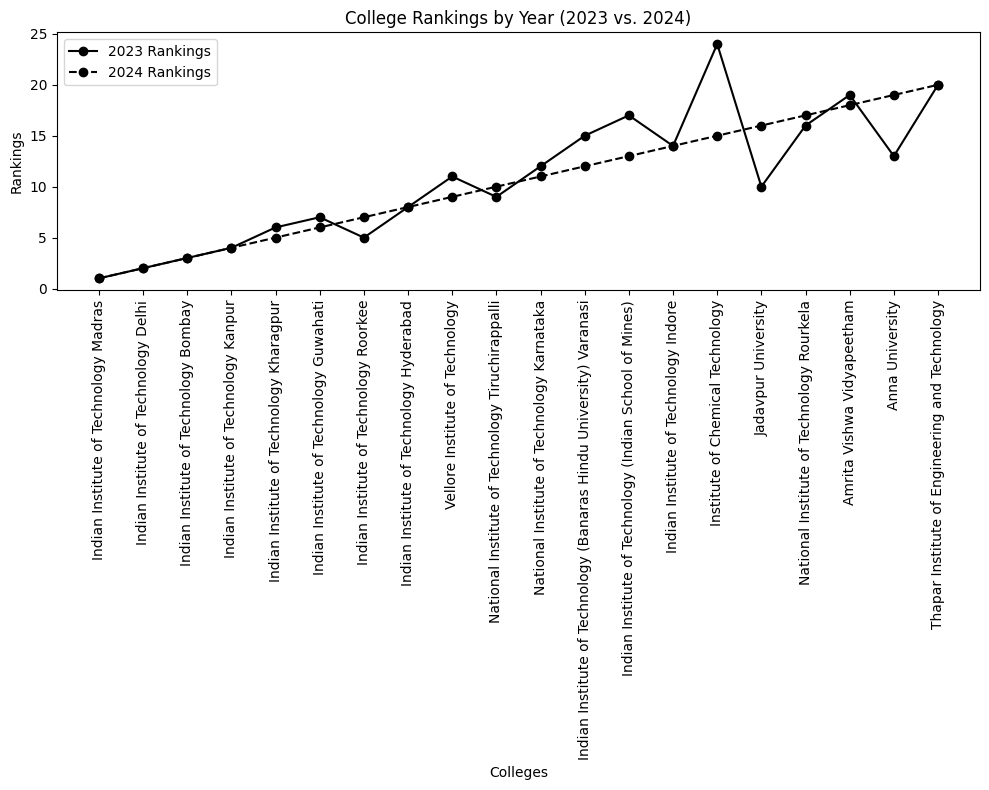

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("rankings_24.csv")
df2 = pd.read_csv("nirf_factors_1.csv")

_2023 = df1[['Institute', 'Rank_2024']]
_2024 = df2 [['Institute', 'Rank_2023']]

final = pd.merge(_2023, _2024, how = 'inner', on = 'Institute')

# Select the top 15 colleges
colleges = final["Institute"][:20]
rankings_2023 = final["Rank_2023"][:20]
rankings_2024 = final["Rank_2024"][:20]

# Create a line plot for 2023 Rankings
plt.figure(figsize=(10, 8))
plt.plot(colleges, rankings_2023, marker='o', label='2023 Rankings', linestyle='-',color='black')

# Create a line plot for 2024 Rankings
plt.plot(colleges, rankings_2024, marker='o', label='2024 Rankings', linestyle='--',color='black')

plt.xlabel('Colleges')
plt.ylabel('Rankings')
plt.title('College Rankings by Year (2023 vs. 2024)')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

### **User Query**

Rank - Category : Admittable Colleges

In [ ]:
import pandas as pd
cutoff = pd.read_csv("2024_cutoffs.csv")
cutoff

Institute   Seat Type   CR_24
0                             Assam University, Silchar         EWS   37719
1                             Assam University, Silchar     OBC-NCL  112780
2                             Assam University, Silchar        OPEN  226733
3                             Assam University, Silchar  OPEN (PwD)    2218
4                             Assam University, Silchar          SC   27475
...                                                 ...         ...     ...
1202  Sant Longowal Institute of Engineering and Tec...        OPEN      77
1203  Sant Longowal Institute of Engineering and Tec...  OPEN (PwD)      77
1204  Sant Longowal Institute of Engineering and Tec...          SC      77
1205  Sant Longowal Institute of Engineering and Tec...          ST      77
1206  Sant Longowal Institute of Engineering and Tec...   EWS (PwD)      77

[1207 rows x 3 columns]

In [ ]:
rank = 16314
category = "OPEN"

In [ ]:
rank_condition = cutoff['CR_24'] > rank
category_condition = cutoff['Seat Type'] == category

possible_colleges = cutoff[rank_condition & category_condition]

In [ ]:
possible_colleges

Institute Seat Type   CR_24
2                            Assam University, Silchar      OPEN  226733
10   Atal Bihari Vajpayee Indian Institute of Infor...      OPEN   24506
18        Birla Institute of Technology, Mesra, Ranchi      OPEN   87820
26          Central University of Rajasthan, Rajasthan      OPEN   70299
32     Central institute of Technology Kokrajar, Assam      OPEN   82080
..                                                 ...       ...     ...
943     Indian Institute of Handloom Technology, Salem      OPEN  101501
949  Indian Institute of Information Technology  Ma...      OPEN   60617
955  Institute of Engineering and Technology, Dr. H...      OPEN  103940
961  National Institute of Food Technology Entrepre...      OPEN  105780
968  National Institute of Food Technology Entrepre...      OPEN  100379

[113 rows x 3 columns]